# Analysis of the scrapped content

Importing packages

In [ ]:
import nltk
import json
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
from ibm_watson import ToneAnalyzerV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
  !pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
  !pip install --upgrade "ibm-watson>=5.1.0"

     |████████████████████████████████| 12.0MB 315kB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-cp37-none-any.whl size=12019125 sha256=6dfbbe4c262565f1731f0078f0558d7ee249c248576ffeab8229e5252fdbbc6a
  Stored in directory: /root/.cache/pip/wheels/48/5c/1c/15f9d02afc8221a668d2172446dd8467b20cdb9aef80a172a4
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5


In [ ]:
nlp = spacy.load('en_core_web_sm')

Reading Scrapped Data from the file

In [ ]:
df=pd.read_csv('outputs/Fitbit Sense_2021-01-01_2021-04-18.csv')

In [ ]:
df

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,Sandra Lafuente,@sandritalaf,2021-01-01T22:19:32.000Z,2021 \nSin excusas\n#FitbitSENSE,NaN,👟,3,NaN,6,['https://pbs.twimg.com/media/Eqre86CXIAACdYI?...,https://twitter.com/sandritalaf/status/1345132...
1,SheddingMoreThanPounds,@ThanPounds,2021-01-01T18:38:48.000Z,Upped my steps today with a lovely walk by the...,NaN,NaN,NaN,NaN,1,['https://pbs.twimg.com/media/EqqsbPeXcAAcbq5?...,https://twitter.com/ThanPounds/status/13450770...
2,fel,@alif_mrn,2021-01-01T05:27:43.000Z,"galaxy watch 3, garmin forerunner 245, fitbit ...",NaN,🌙,1,NaN,1,[],https://twitter.com/alif_mrn/status/1344877945...
3,Cynthia Weirr,@Ngochiana,2021-01-01T14:34:59.000Z,Fitbit Sense drops to lowest price yet in the ...,NaN,NaN,NaN,NaN,NaN,[],https://twitter.com/Ngochiana/status/134501567...
4,Michael,@abrownmike,2021-01-01T14:31:36.000Z,Oof! I'd say the sleep tracking on Fitbit is p...,NaN,NaN,NaN,NaN,2,['https://pbs.twimg.com/media/Eqpz2PcWMAIxfYA?...,https://twitter.com/abrownmike/status/13450148...
...,...,...,...,...,...,...,...,...,...,...,...
1162,DANFRAE,@DANdFRA,2021-04-17T07:41:32.000Z,Update! All time favourite “PRIME” #watchface ...,NaN,NaN,2,4,4,['https://pbs.twimg.com/media/EzKOgTCVkAETjBw?...,https://twitter.com/DANdFRA/status/13833247336...
1163,JMC,@jayehmsee,2021-04-17T20:26:45.000Z,So I'm feeding Fitbit data through MyFitnessPa...,NaN,NaN,1,NaN,2,[],https://twitter.com/jayehmsee/status/138351731...
1164,Health.inc,@HealthDotInc,2021-04-17T23:07:09.000Z,"grab a Fitbit Sense, Charge 4 & Inspire 2 on t...","Price alert: grab a Fitbit Sense, Charge 4 & I...",NaN,NaN,NaN,NaN,['https://pbs.twimg.com/card_img/1382230639571...,https://twitter.com/HealthDotInc/status/138355...
1165,DANFRAE,@DANdFRA,2021-04-17T20:32:24.000Z,Awesome new “SS. OVLap II” #watchface #clockfa...,NaN,NaN,1,1,5,['https://pbs.twimg.com/media/EzM-8skVgAcbXsy?...,https://twitter.com/DANdFRA/status/13835187315...


In [ ]:
df_text=df['Text']
df_text

0                        2021 \nSin excusas\n#FitbitSENSE
1       Upped my steps today with a lovely walk by the...
2       galaxy watch 3, garmin forerunner 245, fitbit ...
3       Fitbit Sense drops to lowest price yet in the ...
4       Oof! I'd say the sleep tracking on Fitbit is p...
                              ...                        
1162    Update! All time favourite “PRIME” #watchface ...
1163    So I'm feeding Fitbit data through MyFitnessPa...
1164    grab a Fitbit Sense, Charge 4 & Inspire 2 on t...
1165    Awesome new “SS. OVLap II” #watchface #clockfa...
1166    Stunning new “Digital Energy” #watchface #cloc...
Name: Text, Length: 1167, dtype: object

Sentiment Analysis on the text

In [ ]:

authenticator = IAMAuthenticator('jRPjC58jsnApfEa4CX0UbnHT18FoL7PfWjKdYemPSw8c')
tone_analyzer = ToneAnalyzerV3(
    version="2017-09-21",
    authenticator=authenticator
)

tone_analyzer.set_service_url('https://api.eu-gb.tone-analyzer.watson.cloud.ibm.com/instances/7373c8d2-41fc-41ae-89a0-7c9531df0666')
tone_analyzer.set_disable_ssl_verification(True)


In [ ]:
list_Emotion=[]
for text in df_text:
  tone_analysis = tone_analyzer.tone(
      {'text': text},
      content_type='application/json'
  ).get_result()
  test=json.dumps(tone_analysis, indent=2)

  dic=json.loads(test) 
  # print(dic)
  tones=[]
  if ('sentences_tone' in dic.keys()):
    for sid in dic['sentences_tone']:
      print(sid)
      for tones in sid['tones']:
        print(tones['tone_name'])
        list_Emotion.append(tones['tone_name'])


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '2021 ', 'tones': []}
{'sentence_id': 1, 'text': 'Sin excusas', 'tones': []}
{'sentence_id': 2, 'text': '#FitbitSENSE', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Upped my steps today with a lovely walk by the coast then a slippy dog walk just now.', 'tones': [{'score': 0.764255, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.5538, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 1, 'text': 'Feeling positive until I let the little voice remind me it’s back to work in 2 days.', 'tones': [{'score': 0.518438, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.6821, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Joy
Confident
{'sentence_id': 2, 'text': '#FitbitSENSE #WalkEveryDay2021', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'galaxy watch 3, garmin forerunner 245, fitbit sense?', 'tones': []}
{'sentence_id': 1, 'text': 'hard to choose', 'tones': [{'score': 0.768123, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.955445, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Sadness
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "Oof! I'd say the sleep tracking on Fitbit is pretty accurate.", 'tones': [{'score': 0.58962, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.579436, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Joy
Confident
{'sentence_id': 1, 'text': 'I felt this, this morning.', 'tones': [{'score': 0.822231, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 2, 'text': 'Time to get the day started!', 'tones': []}
{'sentence_id': 3, 'text': 'Have a great day! ', 'tones': [{'score': 0.724513, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 4, 'text': '', 'tones': []}
{'sentence_id': 5, 'text': '#fitbit #fitbitsense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'アナログとデジタルをサクッと切り替える文字盤ってあんまり見かけないので試作。', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': '#fitbit', 'tones': []}
{'sentence_id': 3, 'text': '#clockface ', 'tones': []}
{'sentence_id': 4, 'text': '#fitface', 'tones': []}
{'sentence_id': 5, 'text': '#fitbitsense ', 'tones': []}
{'sentence_id': 6, 'text': '#analog', 'tones': [{'score': 0.997482, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 7, 'text': '#digital https://instagram.com/p/CJfcCDSg1Kh/?igshid=10p1wo2t80mxj…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'やっぱりfitbit senseが無難かなー。夫が隣でもうオーダーしようとしてるから慌てて止めたけど', 'tones': []}
{'sentence_id': 1, 'text': 'surface  proもオーダーしたばっかだけど', 'tones': [{'score': 0.702, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 2, 'text': '普段ケチケチしてるくせに1度使い出すと止まらなくなるやっかいな性格', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'Awesome “Sector” #watchface #clockface with stunning AOD mode by ', 'tones': [{'score': 0.705484, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@supeerbcom', 'tones': []}
{'sentence_id': 2, 'text': ' for #Fitbit #fitbitversa3 #fitbitsense #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Check out this Amazon deal: Fitbit Sense Advanced Smartwatch with Tools for Heart Health, Stress Management & Skin Temperature Trends, Carbon/Graphite, One Size (S & L Bands Included) by Fitbit https://amzn.to/385Ciga', 'tones': [{'score': 0.506763, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': 'via ', 'tones': []}
{'sentence_id': 2, 'text': '@amazon', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Anyone out there have the Fitbit Sense?', 'tones': [{'score': 0.91961, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 1, 'text': 'I received it as a gift for Christmas and I’m struggling with all of the set up.', 'tones': [{'score': 0.502369, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.704642, 'tone_id': 'confident', 'tone_name': 'Confident'}, {'score': 0.664451, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Confident
Analytical
{'sentence_id': 2, 'text': 'The instructions that came with it are crap, so I was wondering if there are some specific YouTube videos or websites that you have used to help you.￼', 'tones': [{'score': 0.831313, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'FITBIT SENSE Fitness Smartwatch Detailed Overview and Close Look at Inst... https://youtu.be/NPHnamIudRk via ', 'tones': [{'score': 0.932977, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': '@YouTube', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'If ', 'tones': [{'score': 0.997482, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' would enable audible alerts on their new sense and versa lines for apps, maybe allowed on or off for specific apps and utilized the speaker for alarms as well, pumped up the volume, it’d be a real contender in the smart watch market.', 'tones': []}
{'sentence_id': 3, 'text': 'Make the battery bigger and it’s #1', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Heute kam mein Weihnachtsgeschenk von ', 'tones': []}
{'sentence_id': 1, 'text': '@inovexgmbh', 'tones': []}
{'sentence_id': 2, 'text': ' an ', 'tones': []}
{'sentence_id': 3, 'text': 'Beste Firma ever, auch in 2021!', 'tones': [{'score': 0.97759, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 4, 'text': "Und, ich fühl' mich gleich viel sportlicher ", 'tones': []}
{'sentence_id': 5, 'text': '#Fitbit #Sense #fitness', 'tones': [{'score': 0.500524, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'これ、なにげにいいッスよ！', 'tones': []}
{'sentence_id': 1, 'text': '#Fitbit ', 'tones': []}
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': 'スマートウォッチ(Gray/Silver Aluminium）S・Lサイズ兼用 | Joshin webショップ 通販| フィットビット | FB505SRGY-CJK', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Todos con sus apple watch, pero yo prefiero mil veces fitbit!.', 'tones': []}
{'sentence_id': 1, 'text': 'Quiero un fitbit  sense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit SenseとVersa3とCharge4とInspire2の違いを33の観点で徹底比較！ https://arare-blog.com/fitbitsenseversa3charge4inspire2…', 'tones': [{'score': 0.755679, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'これ見るとSenseほしいなと思ってしまうけど、たぶんこの次に出る新作がすげえ重要な気がするよな...。今はInspire2あたりで使用感見ていくのが良いのかなあ～～', 'tones': [{'score': 0.915494, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense, smartwatch para quienes buscan remedio para el estrés', 'tones': []}
{'sentence_id': 1, 'text': 'Fitbit Sense, el más reciente gadget de la marca que Google adquirió a finales de 2019.', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I’ve had two glasses of wine and apparently drinking is being picked up as “active minutes” on my Fitbit.', 'tones': []}
{'sentence_id': 1, 'text': 'Now my active minutes from last week makes sense.', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Very sweet “Corgi”', 'tones': [{'score': 0.948578, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.989586, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Joy
Confident
{'sentence_id': 1, 'text': ' #watchface #clockface by ', 'tones': []}
{'sentence_id': 2, 'text': '@DianasAnimals', 'tones': []}
{'sentence_id': 3, 'text': ' for #Fitbit #fitbitversa2 #fitbitversa3 #fitbitsense #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Conoce Fitbit Sense, el smartwatch de Fitbit que te ofrece sesiones guiadas de mindfulness ', 'tones': []}
{'sentence_id': 1, 'text': ' #ConectaConTuSalud #Ad', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Looks great on the new hardware!', 'tones': [{'score': 0.828817, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'Colourful “PaintSplash” #watchface #clockface with great AOD mode by Rhonda Hill ', 'tones': []}
{'sentence_id': 2, 'text': '@RhondaCodes', 'tones': []}
{'sentence_id': 3, 'text': ' for #Fitbit #fitbitversa2 #fitbitversa3 #fitbitsense #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'So called back... no apology for the hanging up but apparently the ', 'tones': [{'score': 0.574112, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 1, 'text': '@Fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' Charge 4 is compatible with Android 11 but not the Google Pixel 4a 5G.', 'tones': []}
{'sentence_id': 3, 'text': 'How does that even make sense ', 'tones': [{'score': 0.946222, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 4, 'text': '@FitbitSupport', 'tones': []}
{'sentence_id': 5, 'text': '?', 'tones': []}
{'sentence_id': 6, 'text': '#Fitbit #Android #FitbitCharge4', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '今日からFitbit Senseが私のパーソナルトレーナーに就任しました！', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': '#Fitbit #スマートウォッチ', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Apple Watchにsenseのバッテリー足りないって教えられてた。', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'AppleWatch6とsenseを両方つけてる人に、あるある？な現象。', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': '#AppleWatch #fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#Fitbit Payの解説とセットアップ方法について記事にしました。', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Fitbit PayはVisa支払い対応のお店なら基本的に使用することができます。', 'tones': []}
{'sentence_id': 3, 'text': 'Sense や Versa3 だけでは無く、Versa2 や Ionic にも対応しています。', 'tones': []}
{'sentence_id': 4, 'text': 'もう支払いの度にバックの中へ手を入れるのはやめましょう！', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Why is my Sense or other Fitbit not connecting to Bluetooth?', 'tones': [{'score': 0.786991, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 1, 'text': 'http://dlvr.it/RpsMyW', 'tones': []}
{'sentence_id': 2, 'text': '#digitalhealth #socialmedia #digitalmarketing #AI #industry40 #IoT #healthtech #mhealth', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Why is my Sense or other Fitbit not connecting to Bluetooth?', 'tones': [{'score': 0.786991, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 1, 'text': '#wearables #wearabletech #smartwatch https://gadgetsandwearables.com/2021/01/04/why-is-my-fitbit-sense-not-connecting-to-bluetooth/…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Updated my Glitter watch face so it supports the new #fitbit watchfaces now.', 'tones': []}
{'sentence_id': 1, 'text': 'Avaliable for #fitbitversa3 #fitbitsense #fitbitversa #fitbitionic #fitbitversalite #fitbitversa2 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'All Full Home Inspections performed in JANUARY will be entered in our Individual Prize Giveaway Program #getfitwithFivestar to win a FITBIT SENSE $280 value.', 'tones': [{'score': 0.702456, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.543112, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Joy
Confident
{'sentence_id': 1, 'text': 'Congrats to the qualifying agents on their chance to win! Go online to schedule today!', 'tones': [{'score': 0.846057, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.647986, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 2, 'text': 'http://fivestarhomeinspections.us', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Augmented- simple, clean look ', 'tones': [{'score': 0.788656, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.762356, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 1, 'text': ' with #NextGen #Animation', 'tones': []}
{'sentence_id': 2, 'text': ' exclusively on', 'tones': [{'score': 0.916667, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.931034, 'tone_id': 'fear', 'tone_name': 'Fear'}]}
Sadness
Fear
{'sentence_id': 3, 'text': ' #FitbitVersa3 #FitbitSense- #made4fitbit #fitbitDev #fitbitSense #developer ', 'tones': []}
{'sentence_id': 4, 'text': '@NiVZ', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'One Day ', 'tones': []}
{'sentence_id': 1, 'text': '@Fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' sale on ', 'tones': []}
{'sentence_id': 3, 'text': '@amazon', 'tones': []}
{'sentence_id': 4, 'text': ' (01/04/21) Fitbit Sense $278.95 (reg $329.95) https://amzn.to/358kUW6', 'tones': []}
{'sentence_id': 5, 'text': 'and Fitbit Versa 2 $149.95', 'tones': []}
{'sentence_id': 6, 'text': '(reg $179.95)', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': "The Versa 3 is a cheaper alternative to the Fitbit Sense and it's a happy medium of health features and fitness tracking.", 'tones': [{'score': 0.637799, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '#health https://cnet.com/news/fitbit-versa-3-review-everything-you-need-in-a-smartwatch-plus-a-few-surprises/…', 'tones': [{'score': 0.880435, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "It's here ", 'tones': []}
{'sentence_id': 1, 'text': '#FitbitSENSE', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Is my #clockface smiling at me? ', 'tones': [{'score': 0.99515, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': ' Brand new “Cords” #watchface by Grégoire ', 'tones': []}
{'sentence_id': 2, 'text': '@GregoireSage', 'tones': []}
{'sentence_id': 3, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Amazing NextGen animations with “Augmented” #watchface #clockface by \u2066', 'tones': [{'score': 0.946761, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@GroenMarc', 'tones': []}
{'sentence_id': 2, 'text': '\u2069 code magic by \u2066', 'tones': [{'score': 0.661534, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 3, 'text': '@NiVZ', 'tones': []}
{'sentence_id': 4, 'text': '\u2069 for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit Exclusive Preview - available soon!', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit、Senseが最新と思っていたら、Versa 3も出ているのですね。でもSenseの方が値段が高い。ということは、Senseの方が上位機種かな？', 'tones': []}
{'sentence_id': 1, 'text': 'https://fitbit.com/jp/versa3', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#Fitbit #Sense vs Fitbit Versa 3 http://itsyurl.org/bSewRzg', 'tones': []}
{'sentence_id': 1, 'text': '#Versa3 #Tracker #Smartwatch #Wearable #Tech #TechNews #Technology #TechnologyNews #ITRTG #SNRTG', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'ほしいもの', 'tones': []}
{'sentence_id': 1, 'text': 'Pixel4a', 'tones': []}
{'sentence_id': 2, 'text': 'fitbit sense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'http://Amazon.com: Fitbit Sense Advanced Smartwatch with Tools for Heart Health, Stress Management & Skin Temperature Trends, White/Gold, One Size (S & L Bands Included): Health & Personal Care https://amazon.com/Fitbit-Advanced-Smartwatch-Management-Temperature/dp/B08DFLG5SP…', 'tones': []}
{'sentence_id': 1, 'text': '日本で買うよりやすい', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'Das Armband von meiner Fitbit Versa Lite geht kaputt :( Idealer Zeitpunkt um die Sense zu kaufen :D Aber.. Ich wollte sparen... und die nächste große Anschaffung sollte eigentlich der ', 'tones': [{'score': 0.77543, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 1, 'text': '@trackle_de', 'tones': []}
{'sentence_id': 2, 'text': ' sein', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense vs Fitbit Versa 3 http://ow.ly/8COq30rrjvR', 'tones': []}
{'sentence_id': 1, 'text': '[', 'tones': []}
{'sentence_id': 2, 'text': '@TechRadar', 'tones': []}
{'sentence_id': 3, 'text': ']', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '10k today.', 'tones': []}
{'sentence_id': 1, 'text': 'Well yesterday actually but that did not rhyme.', 'tones': [{'score': 0.661456, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.506763, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.898327, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Joy
Analytical
Confident
{'sentence_id': 2, 'text': '#fitbit #fitbitcharge2 #charge2 #fitbitsense #walkrunjog #slowways #diabetesreversal #DiabetesUK #walkfordiabetes #runfordiabetes #walkforhealth #runforhealth #walkjogrun...', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Great analog “ntprSvf” #watchface #clockface with beautiful AOD mode by ntpr ', 'tones': [{'score': 0.950392, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.653099, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 1, 'text': '@marcelsasik', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "Hi all, I don't have real Versa 3 or Sense to test.", 'tones': []}
{'sentence_id': 1, 'text': 'I am looking fort feedback about the accessibility of this clock : sizes, location of the heart rate when hands moved, visual reminder, and bugs #Fitbit #FitbitSENSE #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '楽天スマホ関連ランキング 第4位', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'フィットビット fitbit センス sense FB512BKBK/GLWT スマートウォッチ ストレス管理 皮膚温センサー 音声操作 GPS【あす楽】', 'tones': []}
{'sentence_id': 3, 'text': '36380円', 'tones': []}
{'sentence_id': 4, 'text': '', 'tones': []}
{'sentence_id': 5, 'text': '01/07 06:40:37時点', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'いま、Fitbit senseをポチっちゃいそうな衝動を抑えきれず...', 'tones': []}
{'sentence_id': 1, 'text': '激しく格闘中！！', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Avec la Sense, Fitbit étend son offre de santé connectée.', 'tones': []}
{'sentence_id': 1, 'text': "Électrocardiogramme, scan de l'activité électrodermale, analyse de l'état de stress de l'utilisateur... cette montre connectée pousse l'exploration un peu plus loin que la concurrence.", 'tones': [{'score': 0.832004, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'I moved more yesterday than I have on any day in the past few years.', 'tones': [{'score': 0.514409, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.647986, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Sadness
Tentative
{'sentence_id': 1, 'text': "I didn't think I had it in me but I proved myself wrong and will continue to until I am where I wanna be.", 'tones': [{'score': 0.586648, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 2, 'text': '#StrongerThanIThought #GettingFit2021 #fitbitsense #Fitbit #LetsGooo #TheLoveSquad #TheLovespellPalace', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Awesome analog “ntprFfs” #watchface #clockface with great AOD mode by ntpr ', 'tones': [{'score': 0.84413, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.653099, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 1, 'text': '@marcelsasik', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'My 80 year old grandpa got a Fitbit for Christmas and he calls it his Tik Tok.', 'tones': [{'score': 0.585827, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 1, 'text': 'He is so pure.', 'tones': [{'score': 0.898327, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 2, 'text': 'And it honestly makes sense.', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "Sleep could've been better but time for the bike work.", 'tones': [{'score': 0.59015, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 1, 'text': '#fitbit #fitbitworkout #fitbitsense https://instagr.am/p/CJvpBKlFhLk/', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'うっしっしー', 'tones': []}
{'sentence_id': 1, 'text': 'AmazonでポチったFitbit Senseが届きましたよ', 'tones': []}
{'sentence_id': 2, 'text': '早く散歩に行きたい！早く睡眠取りたい！緊張してストレスチェックしたい', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'This is the most I’ve made my plants grow since I got this awesome clock face for my Fitbit Sense!', 'tones': [{'score': 0.766903, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'I love it!', 'tones': [{'score': 0.880435, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 2, 'text': 'The more steps you take, the more the plants grow!', 'tones': []}
{'sentence_id': 3, 'text': 'Awesome job, ', 'tones': [{'score': 0.899208, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 4, 'text': '@renowatch', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#Fitbit #Sense vs. #Apple Watch SE: Which should you buy? | Android Central http://itsyurl.org/0ulmM3F', 'tones': []}
{'sentence_id': 1, 'text': '#WatchSE #Tracker #Smartwatch #Wearable #Tech #TechNews #Technology #TechnologyNews #ITRTG #SNRTG', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Awesome new “wthr F” #watchface #clockface with great AOD mode by ', 'tones': [{'score': 0.934477, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@dp_faces', 'tones': []}
{'sentence_id': 2, 'text': ' for #Fitbit #fitbitversa3 #fitbitsense #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'What are your current top five #clockfaces ?', 'tones': []}
{'sentence_id': 1, 'text': '#watchface #clockface for #fitbit #fitbitversa #fitbitversa2 #fitbitsense #fitbitversa3 #made4fitbit I’m looking forward to your comments!', 'tones': [{'score': 0.646679, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'No resulta tan difícil ¿verdad?', 'tones': [{'score': 0.882284, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': '(especialmente el paso 3).', 'tones': []}
{'sentence_id': 2, 'text': 'Registra fácilmente tu estado de ánimo en #FitbitSense después de una sesión con el Escáner EDA, o en la aplicación de Fitbit, para ayudarte a reflexionar sobre lo que te hace sentir mejor', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Very beautiful “ntprNtf” #watchface #clockface with great AOD mode by ntpr ', 'tones': [{'score': 0.950392, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.825035, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Joy
Confident
{'sentence_id': 1, 'text': '@marcelsasik', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Price alert: grab a Fitbit Sense & Charge 4 on the cheap http://dlvr.it/RqDdJM', 'tones': []}
{'sentence_id': 1, 'text': '>>> http://socialpharma.net #digitalhealth #industry40 #healthcare #IoT #AI #wearables #healthtech #mhealth', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Why Fitbit Sense ECG is your essential health tool for 2021 ', 'tones': [{'score': 0.649235, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.579436, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Joy
Confident
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'https://wareable.com/fitbit/why-fitbit-ecg-is-your-essential-health-tool-for-2021-8246…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "By far one one of the best purchases that I've made in a very long time.", 'tones': [{'score': 0.780871, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.704642, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Joy
Confident
{'sentence_id': 1, 'text': "I'm very late to owning a fitness/ smartwatch but I'm glad that I ended up getting a Fitbit Sense.", 'tones': [{'score': 0.667254, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.638987, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Joy
Confident
{'sentence_id': 2, 'text': 'Will start to take better advantage of its features over time.', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Hi ', 'tones': []}
{'sentence_id': 1, 'text': '@FitbitSupport', 'tones': []}
{'sentence_id': 2, 'text': ' @fitbit', 'tones': []}
{'sentence_id': 3, 'text': ' @FitbitIN', 'tones': []}
{'sentence_id': 4, 'text': ' pls let me know whether ecg will work with your Sense device in India', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Dear ', 'tones': []}
{'sentence_id': 1, 'text': '@Fitbit', 'tones': []}
{'sentence_id': 2, 'text': ',', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': "I'm looking at a Sense.", 'tones': []}
{'sentence_id': 5, 'text': "Please list all the features that would not be available on new devices if I don't also subscribe to your app subscription service.", 'tones': [{'score': 0.560944, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 6, 'text': 'Thank you.', 'tones': [{'score': 0.880435, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'From ', 'tones': []}
{'sentence_id': 1, 'text': '@Apple', 'tones': []}
{'sentence_id': 2, 'text': ' #Watch Series6 To #GalaxyWatch, ', 'tones': []}
{'sentence_id': 3, 'text': '@Fitbit', 'tones': []}
{'sentence_id': 4, 'text': ' #Sense To @Withings #ScanWatch: Here Is The Standout #Smartwatch Of 2020 ', 'tones': []}
{'sentence_id': 5, 'text': '', 'tones': []}
{'sentence_id': 6, 'text': 'http://ow.ly/lbNH30rs1v7', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "The Versa 3 does almost everything the Sense does for $100 less Update One month later The Fitbit Versa 3 launched earlier this year alongside Fitbit's flagship tracker, the Sense.", 'tones': []}
{'sentence_id': 1, 'text': 'That device is packed with features, including heart rate monitoring, sleep', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbits are better than ever with the release of the Versa 3 and Sense.', 'tones': []}
{'sentence_id': 1, 'text': 'If you have one, you need to know the tricks to make it even better.', 'tones': [{'score': 0.647986, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.781949, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Tentative
Analytical
{'sentence_id': 2, 'text': 'These watches do so much more than count your steps.', 'tones': []}
{'sentence_id': 3, 'text': '#Fitbit ', 'tones': []}
{'sentence_id': 4, 'text': '@Fitbitsupport', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'fitbit sense 使い始めて２週間。バッテリーに関してのメモ。SpO2（血中酸素ウェルネスTracker）アプリの有無で、減り具合が全然違う。アプリ有りの場合は１日で50%減少するが、無しの場合は30%。', 'tones': []}
{'sentence_id': 1, 'text': 'SpO2 app drains battery.', 'tones': [{'score': 0.768712, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 2, 'text': '#fitbit #fitbitsense #battery #バッテリー\u3000 #電池 #SpO2  #血中酸素', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'New clock face wthr F!', 'tones': [{'score': 0.55985, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Available for Fitbit Sense, Versa 3, Versa 2, Versa Lite, Versa, and Ionic.', 'tones': []}
{'sentence_id': 3, 'text': 'https://gallery.fitbit.com/details/17e17b9b-1860-42e8-a122-4c7c577758c7…', 'tones': []}
{'sentence_id': 4, 'text': '#made4fitbit #Fitbit #versa3 #Sense8', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'From #Apple Watch Series 6 To Galaxy Watch, #Fitbit Sense To #Withings ScanWatch: Here Is The Standout #Smartwatch Of 2020 http://itsyurl.org/L5IoKnT', 'tones': []}
{'sentence_id': 1, 'text': '#Samsung #Wearable #Tech #TechNews #Technology #TechnologyNews #ITRTG #SNRTG', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Price alert: grab a Fitbit Sense & Charge 4 on the cheap #DigitalHealth #digital #health #Fitness #innovation #CES2021 ', 'tones': []}
{'sentence_id': 1, 'text': '@rwang0', 'tones': []}
{'sentence_id': 2, 'text': ' @PawlowskiMario', 'tones': []}
{'sentence_id': 3, 'text': ' @MargaretSiegien', 'tones': []}
{'sentence_id': 4, 'text': ' @jblefevre60', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "The Versa 3 is a cheaper alternative to the Fitbit Sense and it's a happy medium of health features and fitness tracking.", 'tones': [{'score': 0.637799, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '#health https://cnet.com/news/fitbit-versa-3-review-everything-you-need-in-a-smartwatch-plus-a-few-surprises/…', 'tones': [{'score': 0.880435, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'that being said.', 'tones': []}
{'sentence_id': 1, 'text': 'i’ve got like... a ton of cool shit.', 'tones': [{'score': 0.671794, 'tone_id': 'anger', 'tone_name': 'Anger'}, {'score': 0.615352, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Anger
Tentative
{'sentence_id': 2, 'text': 'Galaxy Projector, Fitbit Sense, LED face mask.', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 3, 'text': 'i’m like temporarily not depressed about absolutely everything.', 'tones': [{'score': 0.55769, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.615352, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.506763, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Tentative
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Hey ', 'tones': []}
{'sentence_id': 1, 'text': '@FitbitIN', 'tones': []}
{'sentence_id': 2, 'text': ' @fitbit', 'tones': []}
{'sentence_id': 3, 'text': ' when you are launching Fitbit Sense officially in India ?', 'tones': [{'score': 0.724236, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "Everyone's buzzing about the Fitbit Sense and Versa 3, which are the company's newest smartwatches.", 'tones': [{'score': 0.540698, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': "Whether you're considering buying one of these soon or you already have one, you'll want to keep this beauty protected.", 'tones': [{'score': 0.626101, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 2, 'text': "We've rounded up the best Fitbit Sen", 'tones': [{'score': 0.665294, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'SwipeTime, a super simple timer for ', 'tones': [{'score': 0.846601, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.620279, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 1, 'text': '@Fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' smartwatches has been released for #Sense and #Versa3 as well—setting up a timer takes literally one swipe with it: http://bit.ly/2NM6Vvx', 'tones': [{'score': 0.705784, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 3, 'text': '#made4fitbit #fitbitversa2 #fitbitversa #fitbitversalite #fitbitionic', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#FitbitSENSE #Fitbit ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' looks like Fitbit dot com is down, absolutely zero response from here in the UK at 9 am GMT', 'tones': [{'score': 0.599421, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.638987, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Analytical
Confident


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I’m updating BOLD for #FitbitVersa3 / #FitbitSENSE Pick one design ', 'tones': [{'score': 0.901894, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': ' you don’t like!', 'tones': [{'score': 0.880435, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.946222, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 2, 'text': 'It goes! #made4fitbit #free #clockface #onegoes #pickone #developer #steps #fitbit ', 'tones': []}
{'sentence_id': 3, 'text': '@NiVZ', 'tones': []}
{'sentence_id': 4, 'text': ' @FitbitDev', 'tones': []}
{'sentence_id': 5, 'text': ' @fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'WTH is EDA Scan?', 'tones': []}
{'sentence_id': 1, 'text': 'This innovative app on #FitbitSense measures your EDA responses to help you understand your body’s response to stressors, so you can learn to manage #stress better', 'tones': [{'score': 0.522862, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.73677, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "Looking to upgrade my Fitbit Versa, I'm thinking about a straight upgrade to the Fitbit Sense but not sure if the Samsung watches are ready yet.", 'tones': [{'score': 0.589295, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': 'This is for a Samsung phone.', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I just got a new ', 'tones': [{'score': 0.734944, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.968123, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' sense and the box is a masterpiece by itself!! Props to whoever designed the package!!', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'สมาร์ทวอทช์ Fitbit Sense Advanced Health Wastch สี Carbon/Graphite Stainless Steel', 'tones': []}
{'sentence_id': 1, 'text': 'นาฬิกาสุขภาพขั้นสูง  ช่วยปรับสมดุลของร่างกายด้วยอุปการณ์ทีดูและสุขภาพหัวใจ, การจัดการกับความเคลียด,อุณหภูมิหนัง และอื่นอีกมากมาย ช้อป ได้ที', 'tones': []}
{'sentence_id': 2, 'text': '#kingpoweronline', 'tones': []}
{'sentence_id': 3, 'text': '#kingpowergoodprice', 'tones': []}
{'sentence_id': 4, 'text': 'ช้อปใช้กดSV23373', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '[#Review] Tras probarlo por un par de semanas, acá te contamos todo lo que debes saber sobre este nuevo reloj inteligente.', 'tones': []}
{'sentence_id': 1, 'text': 'http://ow.ly/kDqB50D6AdW', 'tones': []}
{'sentence_id': 2, 'text': '#Fitbit #FitbitSense #Tecnovitos', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Me: "I don\'t like wearing my fitbit.', 'tones': [{'score': 0.681699, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 1, 'text': 'It hurts my arm"', 'tones': [{'score': 0.715563, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 2, 'text': 'Bf: "it hurts your wrist?', 'tones': [{'score': 0.792142, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 3, 'text': 'Are you wearing it too tight?"', 'tones': [{'score': 0.842108, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 4, 'text': 'Me: "?? No? I keep it loose, but it hurts my arm.', 'tones': [{'score': 0.663175, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 5, 'text': 'Like my wrist up into my shoulders.', 'tones': [{'score': 0.681699, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 6, 'text': 'Like bracelets"', 'tones': [{'score': 0.785369, 'tone_id'

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Apple Watch 6 vs Fitbit sense...', 'tones': []}
{'sentence_id': 1, 'text': 'I think I’ma go with the sense', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'After seeing that 18 hour battery life on the Apple Watch6, I decided to give the Fitbit sense a try.', 'tones': [{'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': "I've come to realize I don't really do anything with my apple watch beyond check the time and track exercise.", 'tones': [{'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 2, 'text': 'So, I figure I may be better off with the Fitbit...', 'tones': [{'score': 0.786991, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "I just discovered Fitbit Studio and it's AMAZING!", 'tones': [{'score': 0.893361, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.88939, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.920855, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Tentative
Analytical
{'sentence_id': 1, 'text': 'I went from signup to an app deployed and running on my sense in 5 minutes flat.', 'tones': []}
{'sentence_id': 2, 'text': 'The code is concise and clear with easy to find docs for adding more.', 'tones': [{'score': 0.711887, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.751512, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Analytical
Confident


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '昨晩Fitbit senseが届いたので付け替えてみる', 'tones': []}
{'sentence_id': 1, 'text': '今まで使ってたFitbit versaはどうしようかねぇ', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'The new Fitbit Sense Advanced Smartwatch with Tools for Heart Health, Stress Management & Skin Temperature Trends is out ad >>>> https://amzn.to/38JLtTI', 'tones': []}
{'sentence_id': 1, 'text': '#stayhome', 'tones': []}
{'sentence_id': 2, 'text': ' #workout', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "Yesterday's Fitbit scores:", 'tones': [{'score': 0.573605, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'Steps 20K.', 'tones': []}
{'sentence_id': 2, 'text': '8.45 miles.', 'tones': []}
{'sentence_id': 3, 'text': 'Floors 18.', 'tones': []}
{'sentence_id': 4, 'text': 'Cal burn 3509.', 'tones': []}
{'sentence_id': 5, 'text': '27 mins fat burn, 70 mins cardio & peak ', 'tones': [{'score': 0.608898, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 6, 'text': '#walking #Fitbit #FitbitSense #stepgoal #walkinginnature #LockdownBlues', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'My Fitbit sense is passive aggressive.', 'tones': []}
{'sentence_id': 1, 'text': 'Sometimes it’ll just start the “treadmill” or “Hiit” timer randomly.', 'tones': [{'score': 0.542999, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.997314, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Sadness
Tentative
{'sentence_id': 2, 'text': 'Like okay jerk face, no need to nag me!', 'tones': [{'score': 0.5538, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'After the kind of year 2020 was, people hope that the new year brings better things.', 'tones': [{'score': 0.806158, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.88939, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 1, 'text': 'As people enter 2021 with a renewed sense of purpose, the wearable tracker and app Fitbit has come up with five ways they can stay inspired.', 'tones': [{'score': 0.798955, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.506763, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 2, 'text': 'READ: https://zcu.io/M2iA', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '【15日は全品5倍に+4倍でポイント最大32倍】 fitbit フィットビット Sense スマートウォッチ 消費カロリー 心拍数 メンズ レディース 腕時計 選べるモデル [楽天] https://a.r10.to/hDTGdk', 'tones': []}
{'sentence_id': 1, 'text': '#rakuafl', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'FitBitがGoogleの一部になるってメール来てたからもっと改良されると信じたい', 'tones': []}
{'sentence_id': 1, 'text': 'FitBit senseほしい', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Just got a FitBit sense and finally fulfilled my childhood dream of being Penny from Inspector Gadget.', 'tones': [{'score': 0.75967, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.58393, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 1, 'text': '#fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Stunning new “Charts” #watchface #clockface with AOD mode by Grégoire ', 'tones': [{'score': 0.506712, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@GregoireSage', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Finally, it’s official via email from #fitbit that FitBit joins #Google !', 'tones': [{'score': 0.773789, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'What will it bring to its existing users.', 'tones': []}
{'sentence_id': 2, 'text': 'Already with Versa 3 and Sense, we see Fitbit entering the premium segment.', 'tones': []}
{'sentence_id': 3, 'text': 'Would it even become pricier ?', 'tones': [{'score': 0.968123, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "It's our #FitbitVersa3 case, also compatible with #FitbitSense!", 'tones': [{'score': 0.506763, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': 'https://supcase.com/products/fitbit-versa-3-unicorn-beetle-pro-rugged-case-black…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'My sleep keeps getting worse.', 'tones': [{'score': 0.676526, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 1, 'text': 'Glad I have a Fitbit to track it.', 'tones': [{'score': 0.559807, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 2, 'text': 'Also glad they were bought by Google, so I can have better info integration.', 'tones': [{'score': 0.640426, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 3, 'text': '(Google has been mining my data for years.', 'tones': []}
{'sentence_id': 4, 'text': "Doesn't make sense to stop now)", 'tones': [{'score': 0.542072, 'tone_id': 'anger', 'tone_name': 'Anger'}]}
Anger


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense Alexa搭載/GPS搭載 スマートウォッチ Carbon/Graphite カーボン/グラファイト L/S サイズ [日本正規品]', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': '#Fitbit', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': 'Amazon↓', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#スマートウォッチ #garmin #スマートウォッチの変遷', 'tones': []}
{'sentence_id': 1, 'text': 'Galaxy watch←使いやすさ一番', 'tones': []}
{'sentence_id': 2, 'text': 'ガーミン Phoenix6x←20日保つ、酸素飽和度測れる', 'tones': []}
{'sentence_id': 3, 'text': 'Fitbit sense←酸素飽和度測れる', 'tones': []}
{'sentence_id': 4, 'text': '色々使って思うことは', 'tones': []}
{'sentence_id': 5, 'text': '', 'tones': []}
{'sentence_id': 6, 'text': '通知＞健康管理（睡眠と酸素飽和度（Spo2））＞使いやすさ＞バッテリーライフ', 'tones': []}
{'sentence_id': 7, 'text': '', 'tones': []}
{'sentence_id': 8, 'text': 'とはいえ最低2日は持続して', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '自分はGoogle買収に期待してFitbit Senseを買ったので本日1/15(金)深夜02:09にメールを受信し「どんなアプリ作ってくれるんだろ', 'tones': []}
{'sentence_id': 1, 'text': '」とわくわくさん状態なのですが、個人情報流出の心配されてる方も多いんですね。確かに... #NewsPicks', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit は \u200cGoogle の\u200c一部と\u200cなりました - Fitbit Blog', 'tones': [{'score': 0.515376, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'https://blog.fitbit.com/jp-2021-update/', 'tones': []}
{'sentence_id': 2, 'text': 'https://b.hatena.ne.jp/entry/s/blog.fitbit.com/jp-2021-update/…', 'tones': []}
{'sentence_id': 3, 'text': 'Products SMARTWATCHES Sense Versa 3 Versa 2 FITNESS TRACKERS Inspire 2 Charge 4 Inspire Family Ace 2 MORE PRODUCTS Aria Family Smart Scales Accessories Fitbit Premium Not sur…', 'tones': [{'score': 0.885055, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.606284, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense – smart zegarek z EKG.', 'tones': []}
{'sentence_id': 1, 'text': 'Zadbasz z nim o zdrowie i aktywność sportową.', 'tones': []}
{'sentence_id': 2, 'text': 'Jak wypadł w naszym teście?', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Package #1 - 1100 Fitbit Clockfaces $20 - for Versa3 &amp; Sense', 'tones': []}
{'sentence_id': 1, 'text': 'https://rb.gy/bdvzsm or https://rb.gy/wlernq', 'tones': [{'score': 0.99997, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': 'or $1 https://fouryoursucess.com', 'tones': [{'score': 0.998976, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 4, 'text': '', 'tones': []}
{'sentence_id': 5, 'text': 'Package #2 - 1200 Fitbit clockfaces $20 - for Versa, Versa2, Versa Lite, Iconic', 'tones': []}
{'sentence_id': 6, 'text': 'https://rb.gy/vmisj3', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'This ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' sense iOS integration ', 'tones': []}
{'sentence_id': 3, 'text': ' next on the bucket list, purchase a Sport band and Victor Glemaud band', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit is replacing some Sense smartwatches over ECG reading issue: #AI #IoT #BigData HT: ', 'tones': [{'score': 0.681699, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 1, 'text': '@Mikequindazzi', 'tones': []}
{'sentence_id': 2, 'text': ' https://theverge.com/2020/12/4/22152346/fitbit-sense-electrocardiogram-ecg-reading-hardware-issue-replacement…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Looking through my logged weights on my Fitbit and you can literally see a pattern of my weight dropping dramatically during/after a break up and then creeping up when I’m in relationships.', 'tones': [{'score': 0.786562, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.718921, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Sadness
Analytical
{'sentence_id': 1, 'text': 'This doesn’t make sense considering I binge eat more when I’m unhappy.', 'tones': [{'score': 0.620279, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit couldn’t sync!!!', 'tones': []}
{'sentence_id': 1, 'text': 'I have turned the sense on and off, I have reset my phone, I have disconnected the Bluetooth, deleted and redos load the app, what is going on?', 'tones': []}
{'sentence_id': 2, 'text': '@FitbitUK', 'tones': []}
{'sentence_id': 3, 'text': ' @fitbit', 'tones': []}
{'sentence_id': 4, 'text': ' @FitbitSupport', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Looove this Fitbit Sense clockface from ', 'tones': []}
{'sentence_id': 1, 'text': '@renowatch', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'walking the golf course yesterday, a 19,012 step day.', 'tones': [{'score': 0.547914, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '#Fitbit #Sense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Lots of Wet Ass Tech up for grabs on the show over the next 2 weeks', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': '- Macbook Pro', 'tones': []}
{'sentence_id': 3, 'text': '- iPhone 12', 'tones': []}
{'sentence_id': 4, 'text': '- 58" TV', 'tones': []}
{'sentence_id': 5, 'text': '- Samsung Galaxy SE', 'tones': []}
{'sentence_id': 6, 'text': '- 32GB iPad', 'tones': []}
{'sentence_id': 7, 'text': '- Nintendo Switch + 2 Games ', 'tones': []}
{'sentence_id': 8, 'text': '- FitBit Sense', 'tones': []}
{'sentence_id': 9, 'text': '- Apple Watch', 'tones': []}
{'sentence_id': 10, 'text': '- Bose Wireless Headphones', 'tones': []}
{'sentence_id': 11, 'text': '- Amazon Smart Speaker Bundle ', 'tones': []}
{'sentence_id': 12, 'text': '', 'tones': []}
{'sentence_id': 13, 'text': 'Tune in from 9am to win', 'tones': [{'score': 0.75421, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Senseが欲しい今日この頃。', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Fitbitが正式にGoogleの一部になったってよ | ギズモード・ジャパン', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "Nouveau produit que je teste dès aujourd'hui !", 'tones': []}
{'sentence_id': 1, 'text': "La montre Fitbit Sense, vous l'avez ?", 'tones': []}
{'sentence_id': 2, 'text': 'Des avis ?', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'Beautiful “Pocket” #watchface #clockface by AMY ', 'tones': [{'score': 0.861312, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@gratefulmamaof3', 'tones': []}
{'sentence_id': 2, 'text': ' for #Fitbit #fitbitversa3 #fitbitsense #made4fitbit #fitbitversa2 #fitbitversa', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Blue Monday but make it PINK!', 'tones': [{'score': 0.692245, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'We’re giving away everything you need to #StayHomeWithPLT ', 'tones': []}
{'sentence_id': 2, 'text': ' Including an iPad Pro, Fitbit Sense, Netflix subscription for the YEAR, a bundle of PLT goodies AND a £250 PLT voucher ', 'tones': []}
{'sentence_id': 3, 'text': ' To enter head over to our IG here ', 'tones': []}
{'sentence_id': 4, 'text': 'https://bit.ly/2VNG2va', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Upgraded to FitBit Sense.', 'tones': []}
{'sentence_id': 1, 'text': 'Found elegant leather band on AMZN.', 'tones': [{'score': 0.842108, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 2, 'text': 'FitBit says I walked over 2,000 miles last year.', 'tones': [{'score': 0.547815, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 3, 'text': '#HealthyLiving  #Walking', 'tones': [{'score': 0.621823, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Adding names to our Individual Prize Giveaway this month!!', 'tones': [{'score': 0.671381, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'All agents who have a full home inspection performed this month have a chance to win a FITBIT SENSE!', 'tones': [{'score': 0.647906, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 2, 'text': 'Schedule today, get Five Star service for your clients, and entered for a chance to win! http://fivestarhomeinspections.us', 'tones': [{'score': 0.697746, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.615352, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I wonder if I should try again, to buy a metal mesh band for fitbit sense.', 'tones': [{'score': 0.798791, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.506763, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Tentative
Analytical
{'sentence_id': 1, 'text': 'I had one for my Versa 2 but it would pull on my arm hair and the hair on my head if my wrist got to close to my head.', 'tones': []}
{'sentence_id': 2, 'text': "I'm sensitive to losing hair.", 'tones': [{'score': 0.749897, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '¿Sabes cuáles son los mejores pulsómetros de Fitbit que existen en el mercado en este 2021?', 'tones': []}
{'sentence_id': 1, 'text': '¡Echa un vistazo y elige el tuyo!', 'tones': []}
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': 'https://pulsometrosinbanda.com/mejor-reloj-fitbit-smartwatch/…', 'tones': []}
{'sentence_id': 4, 'text': '#fitbit #relojfitbit #pulsometrofitbit #megustafitbit #fitbitsense #fitbitversa3', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'fitbitsenseの心拍数アラートアプリをアップデートしたら、バッテリーの持ちが良くなったような。', 'tones': []}
{'sentence_id': 1, 'text': '#fitbit #fitbitsense #highlowheartrate #心拍数アラート', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbitのレビュー書きました！', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'スマートウォッチってどうよ！？って方、ご参考にどーぞ！', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': 'スマートウォッチ、fitbit senseを買ったので、ざっくりレビュー！', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'アンチAppleなのでapple watchの素晴らしさを知りつつ使えないでいたのだが､いつの間にあkfitbit senseがそれを上回っていることを知った｡', 'tones': []}
{'sentence_id': 1, 'text': '後はGoogleが買収したんだからFitbit-fucking-payを駆逐して､felica決済なGooglePayを入れてくれれば腕時計ずっとつけてこなかった私でも即買いなのだけど', 'tones': [{'score': 0.781671, 'tone_id': 'anger', 'tone_name': 'Anger'}]}
Anger


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'New images of Fitbit Versa 3 and Fitbit Sense leak: #ArtificialIntelligence #IoT #IoE Cc: ', 'tones': []}
{'sentence_id': 1, 'text': '@mikequindazzi', 'tones': []}
{'sentence_id': 2, 'text': ' https://theverge.com/2020/8/18/21374022/fitbit-versa-3-sense-inspire-2-leak-render-smartwatch…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Haven’t been out all day but my smart watch calculates my 1409 steps is equivalent to walking 0.6 miles.', 'tones': [{'score': 0.540612, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.618451, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Joy
Confident
{'sentence_id': 1, 'text': 'I burnt 1243 calories waking around at home.', 'tones': [{'score': 0.88939, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 2, 'text': 'My goal is to walk 5 miles per day and I have done 12% so far.', 'tones': [{'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 3, 'text': 'Love my Fitbit Sense smart watch.', 'tones': [{'score': 0.83635, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 4, 'text': 'It also shows my sleep statistics', 'tones': [{'score': 0.620279, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "'Super Bold' now available for #fitbitsense #fitbitversa , Versa 2 and 3 & Ionic.", 'tones': []}
{'sentence_id': 1, 'text': '3hr trial right here https://bit.ly/superbold.', 'tones': []}
{'sentence_id': 2, 'text': 'View all my watch faces here http://bit.ly/watchfacesmobile…', 'tones': [{'score': 0.540022, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.942582, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Joy
Confident
{'sentence_id': 3, 'text': 'Coming soon, back catalogue updates for compatibility with Versa 3 and Sense.', 'tones': []}
{'sentence_id': 4, 'text': '#made4fitbit #fitness', 'tones': [{'score': 0.711685, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#BonPlan  Montre Connectée - Fitbit Sense', 'tones': []}
{'sentence_id': 1, 'text': '265€ au lieu de 299,95€', 'tones': []}
{'sentence_id': 2, 'text': "Cette montre connectée surveille votre santé via des outils pour le suivi cardiaque, la gestion du stress et l'évolution de la température cutanée", 'tones': []}
{'sentence_id': 3, 'text': ' Pour en savoir plus ', 'tones': []}
{'sentence_id': 4, 'text': ' https://amzn.to/35URafT', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Schaut euch Fitbit Sense - fortschrittliche Gesundheits-Smartwatch mit Tools für Herzgesundheit, Stressmanagement & zur Anzeige von Hauttemperatur-Trends von Fitbit mal an! https://amzn.to/2M7e8Jp', 'tones': []}
{'sentence_id': 1, 'text': 'via ', 'tones': []}
{'sentence_id': 2, 'text': '@amazon', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'Having a fitbit sense during an insurrection attempt really shines a light on what stress does to your body.', 'tones': [{'score': 0.751508, 'tone_id': 'fear', 'tone_name': 'Fear'}, {'score': 0.525007, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Fear
Tentative
{'sentence_id': 1, 'text': "Let's hope my heartrate goes back down to that peaceful post-RTR level soon.", 'tones': [{'score': 0.716301, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Time for a new smartwatch!', 'tones': [{'score': 0.680139, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'Save $70 off the top-rated Fitbit Sense Advanced—but only for today', 'tones': [{'score': 0.762356, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Waiting three weeks to get a reply from ', 'tones': []}
{'sentence_id': 1, 'text': '@FitbitSupport', 'tones': []}
{'sentence_id': 2, 'text': " when you can't  check your wrist for time.... #fitbit #fitbitsupport #fitbitsense", 'tones': [{'score': 0.653099, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense Advanced Smartwatch packs ECG tracking at $262 (Save $68) https://9to5toys.com/2021/01/20/fitbit-sense-advanced-sale/…', 'tones': [{'score': 0.653099, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': 'by ', 'tones': []}
{'sentence_id': 2, 'text': '@blairaltland', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Zach tries to fit 3 months of thoughts and introspection using the Fitbit Sense and its fancy new Electrodermal Activity stress sensor into one video.', 'tones': [{'score': 0.738513, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': "So, strap in to find out if it's any good.", 'tones': [{'score': 0.507596, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.822231, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Tentative
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "We certainly saw some excellent Fitibit deals over the holidays, but you haven't missed your chance to save if those deals passed you by.", 'tones': [{'score': 0.766117, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.620279, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 1, 'text': 'Right now, Amazon is offering the Fitbit Sense at a $68 discount, dropping it down to within a couple of dollars of it', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Comenzando el año a tope!', 'tones': []}
{'sentence_id': 1, 'text': '@ferran_rossello a comernos el 2021', 'tones': []}
{'sentence_id': 2, 'text': ' gracias a @fitbitespana menudo regalazo!', 'tones': []}
{'sentence_id': 3, 'text': '#elcarbonmola #fitbitsense #fitbitsensesmartwatch #regalodereyes en Mallorca https://instagram.com/p/CKR2XLRDx5c/?igshid=1l9fcjr33uwic…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'Dus.... ik wil mij graag een activity tracker/smartwatch aanschaffen..', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Garmin/fitbit sense/Apple - zijn online precies de favorieten.', 'tones': []}
{'sentence_id': 3, 'text': 'Iemand ervaring met 1 van deze?', 'tones': []}
{'sentence_id': 4, 'text': 'Ik ga vooral lopen (normaal ook zwemmen en fitnessen) en wil kijken of ik voldoende slaap/rust ', 'tones': []}
{'sentence_id': 5, 'text': '#dtv', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'En otras noticias, ayer anduve ocupado y se me olvidó compartirles mi análisis de los ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' Sense y Versa 3. Sencillamente son los mejores en diseño y seguimiento de actividad física, pero tienen mucho de donde mejorar su software.', 'tones': []}
{'sentence_id': 3, 'text': 'https://xataka.com.mx/p/180965', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'If you live outside USA and wants Fitbit Sense, you can buy it on sale now, and send it to us.', 'tones': []}
{'sentence_id': 1, 'text': 'We will ensure it reaches you safe n sound!', 'tones': [{'score': 0.864115, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 2, 'text': '#internationalshipping', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'The Google-endorsed Fitbit Sense smartwatch is on sale at a great discount - PhoneArena https://phonearena.com/news/fitbit-sense-google-smartwatch-amazon-deal_id129635…', 'tones': []}
{'sentence_id': 1, 'text': 'via ', 'tones': []}
{'sentence_id': 2, 'text': '@GoogleNews', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Anyone used #Fitbit sense ?', 'tones': [{'score': 0.984352, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 1, 'text': 'Esp in India?', 'tones': []}
{'sentence_id': 2, 'text': 'Is their ecg and other app feature rolled out in India?', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'おはようございます。起きたらsenseの電池切れてたぁー', 'tones': []}
{'sentence_id': 1, 'text': '今朝は6:30まで寝たのに。', 'tones': []}
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': '熟睡して快適に起きたのに、睡眠スコアが６８点とかだとなえる', 'tones': []}
{'sentence_id': 4, 'text': 'ましてや、朝ランはApple Watchだけだし。', 'tones': []}
{'sentence_id': 5, 'text': 'ランニングしたのにsenseつけてないの悲しい', 'tones': []}
{'sentence_id': 6, 'text': '今日はウェアラブルEXPOいってきます', 'tones': [{'score': 0.874919, 'tone_id': 'anger', 'tone_name': 'Anger'}]}
Anger
{'sentence_id': 7, 'text': '#fitbit #睡眠', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Google Assistant en las nuevas Fitbit funciona mejor que en Wear OS', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Con la llegada de las nuevas Fitbit Sense y Versa 3, estas tendrían soporte para Google Assistant.', 'tones': []}
{'sentence_id': 3, 'text': 'Este está llegando y funciona mejor que en Wear OS', 'tones': []}
{'sentence_id': 4, 'text': '', 'tones': []}
{'sentence_id': 5, 'text': 'https://elandroidelibre.elespanol.com/2020/11/google-assistant-en-las-nuevas-fitbit-funciona-genial.html…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'fitbitのサーバが止まっているかも', 'tones': []}
{'sentence_id': 1, 'text': 'データは上がっているが、睡眠時間とかのデータが降りてこない様子', 'tones': []}
{'sentence_id': 2, 'text': 'サーバが止まっているなら、言ってほしいな', 'tones': []}
{'sentence_id': 3, 'text': 'おかげでsenseを繋ぎ変えて、設定し直して大変だよ', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'El dispositivo wearable ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' Sense recién lanzó una funcionalidad llamada “puntaje del manejo de estrés”, capaz de brindar de manera clara indicadores sobre la manera en que el organismo de los usuarios reacciona ante la tensión.', 'tones': []}
{'sentence_id': 3, 'text': 'https://vinculotic.com/salud/estres', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Buy a Fitbit Versa 3 or Fitbit Sense and get a Free Fitbit Aria Air Scale (worth £49.99) https://tidd.ly/3960Cz0', 'tones': [{'score': 0.525007, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 1, 'text': '#fitbitversa3 #fitbitsense #Currys', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Iconic new “Masked” #watchface #clockface with funny AOD mode by ', 'tones': [{'score': 0.834329, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@nevraw', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Just got my Fitbit Sense.', 'tones': [{'score': 0.968123, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 1, 'text': 'Realize how unhealthy i am when my resting heartbeat is at 80bpm...', 'tones': [{'score': 0.64386, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "I'm weeping because my son, Seiji, is the poster boy of the Digi FitBit.", 'tones': [{'score': 0.560098, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': "But no, joke's aside, I'm just glad that my Digimon sense seems to be on point, as usual.", 'tones': [{'score': 0.913819, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'So I ordered ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': " Sense back on Dec 4 and it still hasn't shipped.", 'tones': []}
{'sentence_id': 3, 'text': 'Not only that, their customer support refuses to cancel & refund.', 'tones': [{'score': 0.955445, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 4, 'text': 'Very frustrating experience, feels like being held hostage.', 'tones': [{'score': 0.539326, 'tone_id': 'anger', 'tone_name': 'Anger'}]}
Anger
{'sentence_id': 5, 'text': '0/10 would not recommend... #fitbit #badexperience', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Want to become a style icon ', 'tones': [{'score': 0.503892, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.762356, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 1, 'text': '?', 'tones': []}
{'sentence_id': 2, 'text': 'Look no further, the Fitbit Sense is the advanced (and stylish) health smartwatch that helps you tune into your body with tools for stress management, heart health, skin temperature and more', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "Best answer: The Fitbit Sense & Versa 3 are the company's newest smartwatches and they both offer six days of battery life.", 'tones': [{'score': 0.679496, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.670204, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 1, 'text': "If you've lost track of your charging cable or need a backup to have on hand, you can buy a Fitbit Sense & Versa 3 replacement charg", 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Bought a brand new ', 'tones': [{'score': 0.560152, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' sense that hasn’t worked correctly since day 1.', 'tones': []}
{'sentence_id': 3, 'text': 'Their service team said they would “get back to me with a solution.”', 'tones': [{'score': 0.589295, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 4, 'text': 'No solution.', 'tones': [{'score': 0.982476, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 5, 'text': 'So I asked to have a refund processed.', 'tones': []}
{'sentence_id': 6, 'text': 'It’s been TWO WEEKS and I’m still waiting to be able to return this piece', 'tones': [{'score': 0.532616, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '心電図機能がついたFITBIT senseのバッテリーは４・5日は持つらしい。', 'tones': []}
{'sentence_id': 1, 'text': 'もしFITBIT senseがchargeシリーズのサイズだったら買ってたかなと思うけど（心電図機能は日本未認可）、こちらもApple Watchと同じくらいのサイズだし、どうせそのサイズならiPhoneとの連携を考えるとAppleの方かなぁ。。。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'i’ve spent the afternoon getting rid of old clothes and clearing out my bedroom and my Fitbit has registered it as me going for an hour long swim.', 'tones': []}
{'sentence_id': 1, 'text': 'make this make sense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Health question for android users ', 'tones': [{'score': 0.970179, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': ' Not for fitness but health tracking.', 'tones': []}
{'sentence_id': 2, 'text': 'Given Apple Watch 6 is not an option, best alternative right now seems Fitbit Sense.', 'tones': [{'score': 0.605411, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.822231, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 3, 'text': 'Taking into account Google acquired ', 'tones': []}
{'sentence_id': 4, 'text': '@fitbit', 'tones': []}
{'sentence_id': 5, 'text': ' and might launch a watch with health features and wear OS vs fitbit OS.', 'tones': [{'score': 0.583307, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.681699, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'fitbit sense装着、３日目。', 'tones': []}
{'sentence_id': 1, 'text': 'やはりもともと金属アレルギーなせいか、少し肌が怪しいことに…。', 'tones': []}
{'sentence_id': 2, 'text': '医療用リストバンドの上につけてるけど、これじゃあ正しく計測できないのかな？', 'tones': []}
{'sentence_id': 3, 'text': '冬は長袖だから、隠せていいよね？', 'tones': []}
{'sentence_id': 4, 'text': '', 'tones': []}
{'sentence_id': 5, 'text': '#FitbitSENSE ', 'tones': []}
{'sentence_id': 6, 'text': '#fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Apple Watchが日本でも心電図が利用出来る様になります。', 'tones': []}
{'sentence_id': 1, 'text': 'スマートウォッチはこれから医療系にもどんどん対応していくますね。', 'tones': []}
{'sentence_id': 2, 'text': 'Fitbit Senseの対応はいつ頃になるのだろうか・・・・', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Cuida tu Salud con Tecnología - Fitbit Sense https://youtu.be/_j2o57D3PYY', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' #FitbitSense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'BOLD updated for #FitbitVersa3 & #FitbitSENSE.', 'tones': []}
{'sentence_id': 1, 'text': 'New design, for “squircle” shape, still #free.', 'tones': [{'score': 0.614442, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 2, 'text': 'Link in comments.', 'tones': [{'score': 0.955445, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 3, 'text': '#made4fitbit #fitbit #fitbitversa #versa #steps #health #fitness #watchface', 'tones': [{'score': 0.680169, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fantastic new “mnml I” #watchface #clockface with great AOD mode by ', 'tones': [{'score': 0.91666, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@dp_faces', 'tones': []}
{'sentence_id': 2, 'text': ' for #Fitbit #fitbitversa3 #fitbitsense #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'New and free!', 'tones': [{'score': 0.816197, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'Fantastic “BOLD” #watchface #clockface by ', 'tones': [{'score': 0.778036, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 2, 'text': '@GroenMarc', 'tones': []}
{'sentence_id': 3, 'text': ' code magic by ', 'tones': [{'score': 0.661534, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 4, 'text': '@NiVZ', 'tones': []}
{'sentence_id': 5, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Before #Fitbit people still used to walk right?', 'tones': []}
{'sentence_id': 1, 'text': "pretty sure the 'no of steps' >=  whtevr device shows.. ", 'tones': []}
{'sentence_id': 2, 'text': "'today I did 10k steps must have burnt lot of calories' -gives false sense of satisfaction.", 'tones': []}
{'sentence_id': 3, 'text': 'Another dumb device that no on needed but is a thing now...', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Got myself a ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' Sense #smartwatch.', 'tones': []}
{'sentence_id': 3, 'text': "It's the next step in helping me get more active and continue to lose weight.", 'tones': []}
{'sentence_id': 4, 'text': 'I lost 30lbs in 2020, time to lose another 30 or more!', 'tones': [{'score': 0.718104, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.75152, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Sadness
Tentative
{'sentence_id': 5, 'text': 'https://instagram.com/p/CKceseogyam/?igshid=17mkujhuewmf…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Thank you.. x ', 'tones': [{'score': 0.791101, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@FitbitUK', 'tones': []}
{'sentence_id': 2, 'text': ' #FitbitSENSE #Wellbeing', 'tones': [{'score': 0.89626, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '私同様にfitbit senseとApple Watch series6を両方持つ、レアな方がYouTubeとnote見てくださり、ネット駆使してお問い合わせしてくれる、感激な事象発生', 'tones': []}
{'sentence_id': 1, 'text': 'パーソナルコーチングの問い合わせをもらって、翌日にzoom面談できちゃうんだからオンラインすごいし、行動力が神', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': "Bon j'hésite.", 'tones': []}
{'sentence_id': 1, 'text': 'Fitbit sense ou Whithings scanwatch ?', 'tones': []}
{'sentence_id': 2, 'text': '#smartwatch', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Created a MIota Price checker on Fitbit (sense + versa) https://ift.tt/3qMxx1t', 'tones': []}
{'sentence_id': 1, 'text': '#IOTA #DLT #m2m', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Nab a free Lenovo Smart Clock when you buy a Fitbit Sense.', 'tones': []}
{'sentence_id': 1, 'text': 'https://chromeunboxed.com/free-lenovo-smart-clock-google-assistant-fitbit-sense…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Busy Monday ends with the most positive thing that I picked up in lockdown, running!', 'tones': [{'score': 0.690658, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'Such an impact not only physically, but mentally.', 'tones': [{'score': 0.982476, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 2, 'text': 'Stats powered by #fitbit Sense.', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Apple Watch Series 6 vs. Fitbit Sense https://youtu.be/yg3pw9SBb0M via ', 'tones': []}
{'sentence_id': 1, 'text': '@YouTube', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'fitbit senseでの睡眠計測の結果を上げてる人見たことがないので上げてみるテスト', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': '今朝はあまりスッキリしてないけどスコアは高め', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': 'もっとしっかり寝れるようにできんかなぁ', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Hace poco más de una año me regalaron un #FitbitSense.', 'tones': []}
{'sentence_id': 1, 'text': 'Algo más de 300 pavazos, que no esta mal.', 'tones': []}
{'sentence_id': 2, 'text': 'Y de un día para otro ha dejado de conectarse con mi #Samsung #GalaxyA10.', 'tones': [{'score': 0.582409, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 3, 'text': 'Como es normal, me he puesto en contacto con el servicio técnico de ', 'tones': [{'score': 0.589295, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 4, 'text': '@FitbitES', 'tones': []}
{'sentence_id': 5, 'text': '  @FitbitSupport', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'what are some of the weird lil ed related quirks you have?', 'tones': [{'score': 0.75152, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.620279, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Tentative
Analytical
{'sentence_id': 1, 'text': 'i always take my hair down before weighing.', 'tones': [{'score': 0.898327, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 2, 'text': 'it’s like my brain worries the hair tie will make me weigh more? the oddest part is, i don’t fear the same with my fitbit or the 5 wristbands i wear?', 'tones': [{'score': 0.934677, 'tone_id': 'fear', 'tone_name': 'Fear'}]}
Fear
{'sentence_id': 3, 'text': 'how does that make sense?', 'tones': [{'score': 0.996505, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Time to burn ', 'tones': [{'score': 0.547365, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 1, 'text': ' Testing out the #FitbitSense via an online workout class ', 'tones': [{'score': 0.597635, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 2, 'text': " (I mean who would've thought I'd be doing exercise events via computers in my pajamas lol I'm not complaining)", 'tones': []}
{'sentence_id': 3, 'text': ' #OPPOReno5Pro', 'tones': [{'score': 0.502962, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#ZenFone で #Fitbit への通知が、こねーじゃんよ！！！', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'なんか、メチャクチャいじってるけど大丈夫か？', 'tones': []}
{'sentence_id': 3, 'text': 'これ？？？', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbitベルーサ2からハイエンドモデルのSENSEに乗り換え。', 'tones': []}
{'sentence_id': 1, 'text': 'フィットネス中心の腕時計なので水泳で使えたり、つけたままシャワーや温泉にも入れる。', 'tones': []}
{'sentence_id': 2, 'text': 'バッテリーのもちはアップルウォッチの10倍くらい。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'fitbit senseを買ってしまった。', 'tones': []}
{'sentence_id': 1, 'text': "さっそく睡眠時につけてみたが、8割浅い睡眠だった('A'", 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit sense 買おっかな〜〜！って思ってたけど、', 'tones': []}
{'sentence_id': 1, 'text': 'Apple Watch 7 は血糖値測れるという噂だし、スマートウォッチは待てば待つほど進化するのね。', 'tones': []}
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': '心電図が承認されたりとかもあるし。', 'tones': []}
{'sentence_id': 4, 'text': 'スマホはもうカメラしか進化しないけど、スマートウォッチにはまだまだ先に展開が待ってるんだなぁ。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '. Welcome to the moment ', 'tones': [{'score': 0.884343, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '.', 'tones': []}
{'sentence_id': 2, 'text': '“En Verde” ', 'tones': []}
{'sentence_id': 3, 'text': ' is available on Fitbit Versa and Sense devices with Always-On Display.', 'tones': []}
{'sentence_id': 4, 'text': '#made4fitbit #thinkgreen', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Took me long enough to get around to it, but thanks to some help from a user (yay open-source!),', 'tones': [{'score': 0.709761, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.839577, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 1, 'text': 'Roni is now available on Fitbit OS5.0 devices!', 'tones': []}
{'sentence_id': 2, 'text': '(Sense and Versa 3)', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Keep track of time with a silent vibration on your Fitbit.', 'tones': [{'score': 0.8152, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': 'The hourly chime can vibrate on the hour, half-hour and quarter-hour.', 'tones': []}
{'sentence_id': 2, 'text': 'https://gallery.fitbit.com/details/9636651d-b48f-4cc9-9447-a6c7e3bbd9bd…', 'tones': []}
{'sentence_id': 3, 'text': '#Fitbit #FitbitSENSE #Versa #Training #Fitness #health', 'tones': [{'score': 0.625739, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Does anyone with #cf have a Fitbit sense or a Fitbit versa 3??', 'tones': [{'score': 0.933436, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 1, 'text': 'Do you find it helps you stay motivated to exercise?', 'tones': [{'score': 0.882284, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 2, 'text': 'Is it worth it?', 'tones': []}
{'sentence_id': 3, 'text': '@CFAware', 'tones': []}
{'sentence_id': 4, 'text': ' @CfAdventurers', 'tones': []}
{'sentence_id': 5, 'text': ' #cysticfibrosis #Fitbit #fitbitsense #fitbitversa3', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '1月もそろそろ終わり。', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': '#FitbitSense での健康管理の進捗はいかがでしょうか？#リラックス アプリを使うとガイド付き呼吸セッションができるので、深呼吸が必要な時な是非活用してくださいね', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Teilweise sehr spannend, aber an anderer Stelle so viele Daten, dass ich mit ihnen nichts anfangen kann.', 'tones': []}
{'sentence_id': 1, 'text': '@Fitbit_DE', 'tones': []}
{'sentence_id': 2, 'text': ' #FitbitSense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'おかーさんsガジェットは', 'tones': []}
{'sentence_id': 1, 'text': 'Surface go2 ＆ Lets note', 'tones': []}
{'sentence_id': 2, 'text': 'Galaxy note 10+', 'tones': []}
{'sentence_id': 3, 'text': 'Huawei buds', 'tones': []}
{'sentence_id': 4, 'text': 'fitbit sense', 'tones': []}
{'sentence_id': 5, 'text': '', 'tones': []}
{'sentence_id': 6, 'text': 'です。', 'tones': []}
{'sentence_id': 7, 'text': '決してアンチ', 'tones': []}
{'sentence_id': 8, 'text': 'なわけではないよ', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': '#FitbitSENSE twitter Fitbit community.', 'tones': []}
{'sentence_id': 1, 'text': 'Does anyone else have an issue with Fitbit telling you you’ve done 42 active minutes after a 20 minute jog', 'tones': [{'score': 0.579367, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'きたよ！', 'tones': []}
{'sentence_id': 1, 'text': 'fitbitのSuica対応！！！', 'tones': []}
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': 'しかーし、私が好きなのはSense....。', 'tones': []}
{'sentence_id': 4, 'text': '', 'tones': []}
{'sentence_id': 5, 'text': 'charge4も持ってる！', 'tones': []}
{'sentence_id': 6, 'text': '', 'tones': []}
{'sentence_id': 7, 'text': 'あるけど、個人的には、かなり「くぅー」って、なってる', 'tones': []}
{'sentence_id': 8, 'text': 'https://jreast.co.jp/press/2020/20210128_ho02.pdf?fbclid=IwAR0HkeDOxMc0LT0rIn2qcOJJ92ZdcsoLpjQ-CRGLeM0rwRbNUDfXj3AjCJ0…', 'tones': []}
{'sentence_id': 9, 'text': '', 'tones': []}
{'sentence_id': 10, 'text': '#fitbit #Suica', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#fitbit sense.', 'tones': []}
{'sentence_id': 1, 'text': 'Mijn fiybit sense loopt na opladen tot 100% spontaan leeg naar 4% in een paar uur.', 'tones': []}
{'sentence_id': 2, 'text': 'Hoe kan dat?', 'tones': [{'score': 0.585739, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 3, 'text': 'Oplossing?', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit senseもApple Watchも心電図もSpO2もとれるけど…日本じゃ使えないっ', 'tones': []}
{'sentence_id': 1, 'text': 'でもFitbit、就寝時のSpO2の変化グラフは出る。絶対値を出さないあたりが賢いね。体温変化も同じ。', 'tones': []}
{'sentence_id': 2, 'text': 'でもそこを理解できない', 'tones': []}
{'sentence_id': 3, 'text': 'ちゃんは文句たらたら。絶対値しか見れない人って残念な感じだわ。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '初期からのFitbit使いとしてはsenseを買おうか悩み中。', 'tones': []}
{'sentence_id': 1, 'text': 'Apple Watchもいいんだけど、いかんせんあのバッテリーの持ちが…。', 'tones': []}
{'sentence_id': 2, 'text': '別にトラッカーとしてしか使わないからFitbitで十分なんだけど。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'おー', 'tones': []}
{'sentence_id': 1, 'text': 'Suica対応', 'tones': []}
{'sentence_id': 2, 'text': '4年前の誕生日に夫に買ってもらったcharge2がもう寿命らしく電池の持ちが悪くてそろそろ新しいのが欲しくて毎日senseにしようかcharge4にしようかそれともそろそろcharge5出るのかな？と悩んでた所。', 'tones': []}
{'sentence_id': 3, 'text': '…て事は5はないんだな？', 'tones': []}
{'sentence_id': 4, 'text': 'senseの機能も良いんだよな〜', 'tones': []}
{'sentence_id': 5, 'text': '#fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'Ada sesiapa pakai Fitbit Sense?', 'tones': []}
{'sentence_id': 1, 'text': 'Nak tahu review', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit senseポチッとしてやったぜぇ', 'tones': []}
{'sentence_id': 1, 'text': 'ワイルドだろぉ〜', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': '心筋梗塞後のスマートウォッチ', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Apple Watch6\u3000心拍数◯\u3000心電図◯\u3000SpO2◯\u3000NFC◯', 'tones': []}
{'sentence_id': 3, 'text': 'Withings Scanwatch\u3000心拍数◯\u3000心電図△\u3000SpO2△\u3000NFC✕', 'tones': []}
{'sentence_id': 4, 'text': 'fitbit sense\u3000心拍数◯\u3000心電図△\u3000SpO2△\u3000NFC✕', 'tones': []}
{'sentence_id': 5, 'text': '(△は輸入vpn偽装で可)', 'tones': []}
{'sentence_id': 6, 'text': '', 'tones': []}
{'sentence_id': 7, 'text': '今だったらAppleWatch一択なんやろけど、iPhone持ってないからコストがエグい', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Volslagen zinloze feature, maar ik voelde me wel even David Hasselhoff met de Fitbit Sense ', 'tones': [{'score': 0.579545, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 1, 'text': '@bnr', 'tones': []}
{'sentence_id': 2, 'text': ' #SchaalvanHebben', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'Stunning new “ntprOrf” #watchface #clockface with great AOD mode by ntpr ', 'tones': [{'score': 0.821158, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@marcelsasik', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '自分の使い方だとfitbitのほうが良いんだよなぁ。', 'tones': []}
{'sentence_id': 1, 'text': 'なおデザインはガーミン。', 'tones': []}
{'sentence_id': 2, 'text': 'charge4がsuica対応ってことは、今後versaやsenseも対応するってことでしょ。とりあえず待つか。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'New clock face mnml I!', 'tones': [{'score': 0.55985, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Available for Fitbit Sense, Versa 3, Versa 2, Versa Lite, and Versa.', 'tones': []}
{'sentence_id': 3, 'text': 'https://gallery.fitbit.com/details/8ce9df2d-fd67-4973-82a3-91b9f3af5c3e…', 'tones': []}
{'sentence_id': 4, 'text': '#made4fitbit #Fitbit #versa3 #sense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Awesome new “En Verde” #watchface #clockface with AOD mode by Rhonda Hill ', 'tones': [{'score': 0.709637, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@RhondaCodes', 'tones': []}
{'sentence_id': 2, 'text': ' for #Fitbit #fitbitversa2 #fitbitversa3 #fitbitsense #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fantastic “ChronoEdges” #watchface #clockface with great AOD mode by ', 'tones': [{'score': 0.808231, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@nevraw', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I need a Fitbit.', 'tones': []}
{'sentence_id': 1, 'text': 'She\'s got to be between 5\' 3" and 5\' 10"', 'tones': []}
{'sentence_id': 2, 'text': 'Brunette or blonde and a good sense of humour.', 'tones': [{'score': 0.755053, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.868982, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.88939, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Analytical
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Interesting review of the Fitbit Sense by ', 'tones': [{'score': 0.597797, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@stablesjames', 'tones': []}
{'sentence_id': 2, 'text': 'TL;DR: Many sensors and related innovations, but you need a Premium subscription to get access to the more interesting data.', 'tones': []}
{'sentence_id': 3, 'text': 'Great battery life, but buggy and feature-low smartwatch functionality.', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '今週の\u3000#スマートウォッチ\u3000生活(月間推移はフリートにて)', 'tones': []}
{'sentence_id': 1, 'text': 'コタツで寝ると皮膚温の低下が著しい', 'tones': []}
{'sentence_id': 2, 'text': '#FitbitSENSE #Fitbit #Sense ', 'tones': []}
{'sentence_id': 3, 'text': '#ストレス\u3000#睡眠\u3000#推定睡眠時皮膚温\u3000#心拍数', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'おはようございます。', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': '本日も寒い朝になりました。', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': '今日はfitbitを「charge3」から新機種の「sense」に移行してたので朝活は腹筋のみ。', 'tones': []}
{'sentence_id': 5, 'text': '', 'tones': []}
{'sentence_id': 6, 'text': '新しいものを身に着けて気分新たに張り切っていきます！', 'tones': []}
{'sentence_id': 7, 'text': '', 'tones': []}
{'sentence_id': 8, 'text': '今日も良い1日を過ごしましょう〜。', 'tones': []}
{'sentence_id': 9, 'text': '', 'tones': []}
{'sentence_id': 10, 'text': '#朝活', 'tones': []}
{'sentence_id': 11, 'text': '#スマートウォッチ', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'fitbit senseを買ってみた。', 'tones': []}
{'sentence_id': 1, 'text': 'まずはウォーキングで使ってみて、時間、距離、心拍数が取れているのはいい感じ。GPSは距離を出すためだけに使われてるのかな。地図とかは出ないのかしら。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense Advanced Smartwatch with Tools for Heart Health, Stress Management & Skin Temperature Trends, Carbon/Graphite, One Size (S & L Bands Included)', 'tones': []}
{'sentence_id': 1, 'text': '$279.95', 'tones': []}
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': 'https://amazon.com/dp/B08DFCWVZ4/ref=as_sl_pc_as_ss_li_til?tag=sabri0ba-20&linkCode=w00&linkId=70be98b959eab02c0b722bab7df6c4ef&creativeASIN=B08DFCWVZ4…', 'tones': []}
{'sentence_id': 4, 'text': '#SmartNews #smartwatch #branding #BestBuy ', 'tones': []}
{'sentence_id': 5, 'text': '@amazon', 'tones': []}
{'sentence_id': 6, 'text': ' @SmartWatchesNow', 'tones': []}
{'sentence_id': 7, 'text': ' @4everBrandy', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I’m really proud of this one.', 'tones': [{'score': 0.902237, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.842108, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 1, 'text': 'Clean design, sharp animations.', 'tones': [{'score': 0.920855, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 2, 'text': 'Carousel out now for #FitbitVersa3 and #FitbitSense.', 'tones': []}
{'sentence_id': 3, 'text': 'Add your own #photo.', 'tones': [{'score': 0.611141, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 4, 'text': '#Fitbit #Google #design #made4fitbit #clockface ', 'tones': [{'score': 0.907747, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 5, 'text': '@wareable', 'tones': []}
{'sentence_id': 6, 'text': ' @NiVZ', 'tones': []}
{'sentence_id': 7, 'text': ' #Versa', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Do not buy those ', 'tones': []}
{'sentence_id': 1, 'text': 'they gave me severe pain in my wrist.', 'tones': [{'score': 0.806109, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 2, 'text': 'No doubt Fitbit will 2 .', 'tones': [{'score': 0.992572, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 3, 'text': 'I am.', 'tones': []}
{'sentence_id': 4, 'text': 'Angered by this.', 'tones': [{'score': 1.0, 'tone_id': 'anger', 'tone_name': 'Anger'}]}
Anger
{'sentence_id': 5, 'text': 'No one will do ', 'tones': []}
{'sentence_id': 6, 'text': 'Any thing.', 'tones': [{'score': 0.998976, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 7, 'text': 'Is the snow coming .', 'tones': [{'score': 0.762356, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 8, 'text': 'Those sense dots on the watch', 'tones': []}
{'sentence_id': 9, 'text': 'Press on the nerves ,', 'ton

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '2 minute MINDFULNESS SESSION| #2 | Fitbit Sense ', 'tones': []}
{'sentence_id': 1, 'text': '#Mindfulness #DeepBreaths #FitbitSENSE', 'tones': [{'score': 0.548882, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': 'How often do you remember to take deep breaths?', 'tones': [{'score': 0.724236, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.5538, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Analytical
Tentative
{'sentence_id': 4, 'text': 'Enjoy a solid two minutes and feel the difference!', 'tones': [{'score': 0.789815, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.5538, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 5, 'text': 'https://youtu.be/QN-cVrBJsX0', 'tones': []}
{'sentence_id': 6, 'text': 'via ', 'tones': []}
{'sentence_id': 7, 'text': '@YouTube', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit senseに最初から6か月間のpremiumパスが付いているのだけど、これがなかなか新しい発見がある。', 'tones': []}
{'sentence_id': 1, 'text': '睡眠中の心拍数の変化グラフが興味深くて、これを見るとお腹がいっぱいの状態で寝ることがよくない理由が考察できる。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Senseは私を「朝型の人間ですね」とかいうんですけど、', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': '本来私は夜型人間でして、朝が早くなるから早く寝るようにしていますが、', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': '昨日は寝付きも悪かったです。でも目が覚めるのは早かったです。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Análisis de ', 'tones': []}
{'sentence_id': 1, 'text': '@Nicolassymmes', 'tones': []}
{'sentence_id': 2, 'text': ': Fitbit Sense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit結局、脈拍と睡眠スコアしか見てないからversa3でよかったわ', 'tones': []}
{'sentence_id': 1, 'text': '無駄にsenseつこてる', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'fitbit senseいいかも。', 'tones': []}
{'sentence_id': 1, 'text': '単なるウォーキングでも運動強度がバッチリ出るから、いままでいかにちんたら歩いていたかが分かる。今日はガシガシ歩いたらいい汗かいた。', 'tones': []}
{'sentence_id': 2, 'text': 'リングフィットもゲーム重視でしてたせいか、運動強度がいまいちかも。', 'tones': []}
{'sentence_id': 3, 'text': 'いままでなんとなくしていた運動を見直すのに役立つ。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#LauraGeddesShow: Wanna give a huge shout out to Fat Bastard Burrito in #Waterloo.', 'tones': [{'score': 0.570534, 'tone_id': 'anger', 'tone_name': 'Anger'}]}
Anger
{'sentence_id': 1, 'text': "They returned my fitbit sense after I had lost it & wouldn't even take reward money", 'tones': [{'score': 0.630311, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.532616, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.647986, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Sadness
Analytical
Tentative
{'sentence_id': 2, 'text': ' good people in #WaterlooRegion.', 'tones': [{'score': 0.759443, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Making those January Blues... PINK! ', 'tones': [{'score': 0.568742, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.882284, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 1, 'text': ' We’re giving away everything you need to #StayHomeWithPLT ', 'tones': []}
{'sentence_id': 2, 'text': ' Including an iPad Pro, Fitbit Sense, Netflix subscription for the YEAR, a bundle of PLT goodies AND a £250 PLT voucher ', 'tones': []}
{'sentence_id': 3, 'text': ' To enter:', 'tones': []}
{'sentence_id': 4, 'text': ' Double Tap this post', 'tones': []}
{'sentence_id': 5, 'text': ' Tag your BFF', 'tones': [{'score': 0.632298, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Phone: Your crush is typing…  ', 'tones': [{'score': 0.508397, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Fitbit Sense: Your heart rate is above your usual threshold ', 'tones': []}
{'sentence_id': 3, 'text': 'Me: Well this may just be a healthy form of tension', 'tones': [{'score': 0.759133, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.957828, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Ya está el review del Fitbit Sense, el monitor de salud tope de línea de Fitbit.', 'tones': []}
{'sentence_id': 1, 'text': 'Lo bueno y lo malo de este aparato en http://the-update.com', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '楽天モバイルのユーザーでFitbit sense使っている方いますか？', 'tones': []}
{'sentence_id': 1, 'text': '楽天LinkアプリだとFitbitで受信対応していなくて、楽天Linkをログアウトしなければならなかったのですが、改善されていました', 'tones': []}
{'sentence_id': 2, 'text': '仕事中も手首のバイブだけで気づけて便利', 'tones': []}
{'sentence_id': 3, 'text': 'Apple Watchのユーザーみたい', 'tones': []}
{'sentence_id': 4, 'text': '#Fitbit', 'tones': []}
{'sentence_id': 5, 'text': '#楽天モバイル', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Price alert: grab a Fitbit Sense, Versa 3 & Charge 4 on the cheap http://dlvr.it/Rrm553', 'tones': []}
{'sentence_id': 1, 'text': '#digitalhealth #socialmedia #digitalmarketing #industry40 #mhealth #IoT #AI #healthtech', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'Fitbit Sense | Precio, características y especificaciones.', 'tones': []}
{'sentence_id': 1, 'text': 'https://youtu.be/h_40A9hqJa0 a través de ', 'tones': []}
{'sentence_id': 2, 'text': '@YouTube', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "J'ai lu #digital, ça devrait intéresser ", 'tones': []}
{'sentence_id': 1, 'text': '@PaulMauguillet', 'tones': []}
{'sentence_id': 2, 'text': ' RT ', 'tones': []}
{'sentence_id': 3, 'text': '@DigiTogether', 'tones': []}
{'sentence_id': 4, 'text': ': grab a Fitbit Sense, Versa 3 & Charge 4 on the cheap #DigitalHealth #digital #health', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I asked Santa for the new ', 'tones': [{'score': 0.59875, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': " Sense for Christmas and I'm so glad I did.", 'tones': [{'score': 0.878376, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 3, 'text': "While my Ionic was still functional, there's so much more that the Sense can do.", 'tones': []}
{'sentence_id': 4, 'text': 'Shop the post: http://liketk.it/37rGJ ', 'tones': []}
{'sentence_id': 5, 'text': 'or Shop the Screenshot in the http://LIKEtoKNOW.it', 'tones': [{'score': 0.946222, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 6, 'text': 'app!', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I bought Sense as I saw it support Spotify, only to learn that it cannot store music offline as it is possible with Deezer/Pandora.', 'tones': []}
{'sentence_id': 1, 'text': 'Can anyone from ', 'tones': [{'score': 0.994446, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 2, 'text': '@fitbit', 'tones': []}
{'sentence_id': 3, 'text': ' explain this?', 'tones': [{'score': 0.982476, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 4, 'text': "I hope this will be fixed soon, as I'm used to listen to music and podcasts on Spotify on my run.", 'tones': [{'score': 0.548794, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Last when I got to work I did have my ', 'tones': [{'score': 0.581814, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' sense on and I thought I lost it.', 'tones': [{'score': 0.639995, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.615352, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.762356, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Sadness
Tentative
Analytical
{'sentence_id': 3, 'text': 'But when I got home it was on charger.', 'tones': []}
{'sentence_id': 4, 'text': "I'm mad I lost out on all my steps.", 'tones': [{'score': 0.657117, 'tone_id': 'anger', 'tone_name': 'Anger'}, {'score': 0.874372, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Anger
Confident


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': '今朝電源切れてて目覚ましバイブ鳴らなかった5年目突入のfitbit charge2', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': '何気に起きたら6時過ぎ', 'tones': []}
{'sentence_id': 3, 'text': '慌てて電源押したら電池残量65％もあるのに日付は昨日の午前11時', 'tones': []}
{'sentence_id': 4, 'text': '同期して正常に。', 'tones': []}
{'sentence_id': 5, 'text': '', 'tones': []}
{'sentence_id': 6, 'text': 'もしかしたらSuica対応のsense発売もあるか？と待ってるけどそれまで持たないかも', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Today was a good day.', 'tones': [{'score': 0.881709, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'I ordered my new fitbit sense for first time.', 'tones': []}
{'sentence_id': 2, 'text': 'They are coming on this Friday.', 'tones': [{'score': 0.681995, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 3, 'text': "I'm so excited!!", 'tones': [{'score': 0.880435, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I wanna get a Fitbit sense so bad.', 'tones': [{'score': 0.572868, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 1, 'text': 'They even have a super cute gold version.', 'tones': [{'score': 0.797852, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.88939, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 2, 'text': 'But fuck it’s so expensive.', 'tones': [{'score': 0.685766, 'tone_id': 'anger', 'tone_name': 'Anger'}]}
Anger


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#Fitbitプレミアム 無料トライアルをまだ試していない方は、是非試してみてください', 'tones': []}
{'sentence_id': 1, 'text': ' #FitbitSense は6ヶ月、#Inspire2 はなんと1年間無料！', 'tones': [{'score': 0.972914, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': 'いつもの健康管理にさらなる気づきを', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#Fitbit Sense, control de la salud y deporte a otro nivel.¿Qué', 'tones': []}
{'sentence_id': 1, 'text': 'podrá hacer por ti?', 'tones': []}
{'sentence_id': 2, 'text': ' Aquí tienes el vídeo ', 'tones': []}
{'sentence_id': 3, 'text': 'https://youtu.be/w7wxLLzBZSM', 'tones': []}
{'sentence_id': 4, 'text': '#Tecnologia #salud #smartwatch ', 'tones': []}
{'sentence_id': 5, 'text': '@FitbitES', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Win $10,000 & FitBit Sense smartwatches, $500 Amazon gift cards', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'https://bit.ly/3aw5YmH', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': '.', 'tones': []}
{'sentence_id': 5, 'text': '.', 'tones': []}
{'sentence_id': 6, 'text': '.', 'tones': []}
{'sentence_id': 7, 'text': '#Canadacontest #Canadiangiveaway #Giveaway #Contestscoop', 'tones': []}
{'sentence_id': 8, 'text': '', 'tones': []}
{'sentence_id': 9, 'text': '#Shreddies', 'tones': []}
{'sentence_id': 10, 'text': '', 'tones': []}
{'sentence_id': 11, 'text': 'SHreddies DoubleShreddies Double Luck Contest', 'tones': [{'score': 0.634739, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.968123, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense Watch Review | WHAT YOU NEED TO KNOW!!! https://youtu.be/FIxqJVxnqWw via ', 'tones': [{'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': '@YouTube', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I want the Fitbit Sense.', 'tones': []}
{'sentence_id': 1, 'text': "I'm so over my Apple Watch.", 'tones': []}
{'sentence_id': 2, 'text': ':,(', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Get Your Exclusive Deals At Dealors!', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'NICKSTON Capricorn Zodiac Set Embossed Leather Band Compatible with Fitbit Versa 3 and Sense Smartwatches Tooled Strap with 25" Inch Pendant Necklace (1.', 'tones': []}
{'sentence_id': 3, 'text': 'Engraved Silver Color Buckle, for ...', 'tones': []}
{'sentence_id': 4, 'text': '', 'tones': []}
{'sentence_id': 5, 'text': 'https://bit.ly/36H4RPM', 'tones': []}
{'sentence_id': 6, 'text': '#deals #retweet', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "Why is it that every fitbit I buy never syncs properly ffs just got new sense and it's not syncing ", 'tones': [{'score': 0.660843, 'tone_id': 'anger', 'tone_name': 'Anger'}]}
Anger
{'sentence_id': 1, 'text': ' @FitbitSupport', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit【Fitbit Sense】皮膚電気活動(EDA)センサーを搭載し、ストレス管理ができるスマートウォッチ', 'tones': []}
{'sentence_id': 1, 'text': 'https://monoqlo.tokyo/gadget/4380/', 'tones': []}
{'sentence_id': 2, 'text': '#スマートウォッチ', 'tones': []}
{'sentence_id': 3, 'text': '#ランニング', 'tones': []}
{'sentence_id': 4, 'text': '#ウォーキング', 'tones': []}
{'sentence_id': 5, 'text': '#ジョギング', 'tones': []}
{'sentence_id': 6, 'text': '#トレーニング', 'tones': []}
{'sentence_id': 7, 'text': '#ダイエット', 'tones': []}
{'sentence_id': 8, 'text': '#フィットネス', 'tones': []}
{'sentence_id': 9, 'text': '#エクササイズ ', 'tones': []}
{'sentence_id': 10, 'text': '#ワークアウト ', 'tones': []}
{'sentence_id': 11, 'text': '#サイクリング', 'tones': []}
{'sentence_id': 12, 'text': '#健康管理', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'El pulsómetro Fitbit Sense es ahora mismo el reloj más avanzado en el cuidado de la salud.', 'tones': []}
{'sentence_id': 1, 'text': '¿Quieres saber todo lo que es capaz de controlar?', 'tones': []}
{'sentence_id': 2, 'text': 'Echa un vistazo a esta review a fondo: https://pulsometrosinbanda.com/fitbit-sense-reloj-analisis-review/…', 'tones': []}
{'sentence_id': 3, 'text': '#fitbitsense #fitbitespaña #mecuido #megustacuidarme #saludybienestar', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'on ', 'tones': []}
{'sentence_id': 1, 'text': '@YouTube', 'tones': []}
{'sentence_id': 2, 'text': ': استعراض ساعة Fitbit Sense الذكية', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Test: Fitbit Sense face à Withings ScanWatch - ni gagnant ni perdant https://levif.be/s/r/c/1368451', 'tones': []}
{'sentence_id': 1, 'text': 'via ', 'tones': []}
{'sentence_id': 2, 'text': '@datanews_fr', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Get Your Exclusive Deals At Dealors!', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'NICKSTON Aries Zodiac Set Embossed Leather Band Compatible with Fitbit Versa 3 and Sense Smartwatches Tooled Strap with 25" Inch Pendant Necklace (3.', 'tones': []}
{'sentence_id': 3, 'text': 'Black Color Smooth Buckle, for Versa 3)', 'tones': []}
{'sentence_id': 4, 'text': '', 'tones': []}
{'sentence_id': 5, 'text': 'https://bit.ly/39K49De', 'tones': []}
{'sentence_id': 6, 'text': '#deals #retweet', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fantastic new “ntprSvh” #watchface #clockface with super AOD mode by ntpr ', 'tones': [{'score': 0.832442, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@marcelsasik', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Awesome next-generation animation with  “Carousel” #watchface #clockface by ', 'tones': [{'score': 0.818234, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@GroenMarc', 'tones': []}
{'sentence_id': 2, 'text': ' code magic by ', 'tones': [{'score': 0.661534, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 3, 'text': '@NiVZ', 'tones': []}
{'sentence_id': 4, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Get Your Exclusive Deals At Dealors!', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Unnite Braided Elastic Solo Loop Band Compatible with Fitbit Versa 3/Fitbit Sense Sport Loop Straps Nylon Woven Stretchy Replacement Wristbands for Women Men (Olive, 4 (5.86"-6.14"', 'tones': []}
{'sentence_id': 3, 'text': 'Wrist))', 'tones': []}
{'sentence_id': 4, 'text': '', 'tones': []}
{'sentence_id': 5, 'text': 'https://bit.ly/3cJyEv5', 'tones': []}
{'sentence_id': 6, 'text': '#deals #retweet', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '¿Sabes cuáles son los mejores pulsómetros de Fitbit que existen en el mercado en este 2021?', 'tones': []}
{'sentence_id': 1, 'text': '¡Echa un vistazo y elige el tuyo!', 'tones': []}
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': 'https://pulsometrosinbanda.com/mejor-reloj-fitbit-smartwatch/…', 'tones': []}
{'sentence_id': 4, 'text': '#fitbit #relojfitbit #pulsometrofitbit #megustafitbit #fitbitsense #fitbitversa3', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Ma nouvelle creation.', 'tones': []}
{'sentence_id': 1, 'text': "La personne qui parle derrière c'est  Marie!  #made4fitbit  #fitbitversa3 #fitbitsense.", 'tones': []}
{'sentence_id': 2, 'text': 'Test my next clockface.', 'tones': []}
{'sentence_id': 3, 'text': 'https://gallery.fitbit.com/details/b859c9cc-abcd-4a5f-add2-027f7055cc41…', 'tones': []}
{'sentence_id': 4, 'text': 'https://instagram.com/p/CK7R7cso3BV/?igshid=19rs88l4ohzlz…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Quién quiere ofertas', 'tones': []}
{'sentence_id': 1, 'text': 'Fitbit Sense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'なるほどFitbitはおれの端末だと酸素飽和度も計測出来るらしい。', 'tones': []}
{'sentence_id': 1, 'text': '上位機種のSenseだと心電図やストレス計測までしてくれるそうだ。', 'tones': []}
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': 'でもこれ日本対応してるんかな？', 'tones': []}
{'sentence_id': 4, 'text': '', 'tones': []}
{'sentence_id': 5, 'text': 'ちなみにGoogleアシスタントはまだ日本では対応してないっぽくてフーン(´_ゝ｀)ってなりました。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Get Your Exclusive Deals At Dealors!', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'NICKSTON Pisces Zodiac Set Embossed Leather Band Compatible with Fitbit Versa 3 and Sense Smartwatches Tooled Strap with 25" Inch Pendant Necklace (1.', 'tones': []}
{'sentence_id': 3, 'text': 'Engraved Silver Color Buckle, for Sense)', 'tones': []}
{'sentence_id': 4, 'text': '', 'tones': []}
{'sentence_id': 5, 'text': 'https://bit.ly/39RovKP', 'tones': []}
{'sentence_id': 6, 'text': '#deals #retweet', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Remember, your emotional fitness matters as much as the physical kind, making it so important to check-in with yourself.', 'tones': [{'score': 0.859608, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.527318, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.525007, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Analytical
Tentative
{'sentence_id': 1, 'text': 'The #FitbitSense also features an EDA Scan app that gauges your body’s stress response and gives you tools to manage it', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '¡PRECIO MÍNIMO HISTÓRICO!', 'tones': []}
{'sentence_id': 1, 'text': 'Fitbit Sense - Smartwatch avanzado de salud con herramientas avanzadas de la salud del corazón, gestión del estrés y tendencias de temperatura cutánea, Acero inoxidable dorado con Alexa integrada de Fitbit https://amzn.to/36PTmpr', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'fitbit sense 心電図有効にできないとapple watchに乗り換えるぞ。早く有効化できるようにしてほしい。せっかくgoogleの傘下に入ったんだから。', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit_jp', 'tones': []}
{'sentence_id': 2, 'text': '、', 'tones': []}
{'sentence_id': 3, 'text': '@applewatch', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Google、スマホカメラで呼吸数や心拍数を測定。Pixelから - Impress Watch https://watch.impress.co.jp/docs/news/1304726.html…', 'tones': []}
{'sentence_id': 1, 'text': '@impress_watch', 'tones': []}
{'sentence_id': 2, 'text': 'から', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': 'そんなことより早くfitbit senseのGooglizedバージョン出しておくれよ(´・ω・｀)', 'tones': []}
{'sentence_id': 5, 'text': 'versaが買ってそろそろ2年で電池持たなくなってきた', 'tones': []}
{'sentence_id': 6, 'text': '', 'tones': []}
{'sentence_id': 7, 'text': 'fitbit sense ', 'tones': []}
{'sentence_id': 8, 'text': 'https://amzn.to/3jomXv7', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense, Versa 3 e Inspire 2 sono il modo migliore per festeggiare San Valentino, misurando la frequenza del cuore nel giorno in cui dovrebbe battere di più.', 'tones': [{'score': 0.512848, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'In offerta per S.Valentino https://notebookitalia.it/fitbit-sense-versa-3-inspire-2-offerta-san-valentino-30801… #fitbit #sanvalentino #fitbitversa3 #fitbitinspire2 #fitbitsense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Get Your Exclusive Deals At Dealors!', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'NICKSTON Scorpio Zodiac Set Embossed Leather Band Compatible with Fitbit Versa 3 and Sense Smartwatches Tooled Strap with 25" Inch Pendant Necklace (2.', 'tones': []}
{'sentence_id': 3, 'text': 'Silver Color Smooth Buckle, for Sense)', 'tones': []}
{'sentence_id': 4, 'text': '', 'tones': []}
{'sentence_id': 5, 'text': 'https://bit.ly/3rsG9L6', 'tones': []}
{'sentence_id': 6, 'text': '#deals #retweet', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'hi, ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' when do you plan to launch fitbit sense in India?', 'tones': [{'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 3, 'text': "It's on the coming soon page from a really long time .", 'tones': [{'score': 0.541591, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "Fitbit's Sense Advanced Smartwatch falls to new all-time low at $250 (Save $80) https://9to5toys.com/2021/02/07/fitbit-sense-advanced-smartwatch/…", 'tones': [{'score': 0.589295, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': 'by ', 'tones': []}
{'sentence_id': 2, 'text': '@blairaltland', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'My ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': " is not even 2 months past the year warranty and it's not working properly.", 'tones': [{'score': 0.775217, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.681699, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Sadness
Tentative
{'sentence_id': 3, 'text': 'What was I offered?', 'tones': []}
{'sentence_id': 4, 'text': 'A discount on a new one.', 'tones': []}
{'sentence_id': 5, 'text': "I don't think so.", 'tones': []}
{'sentence_id': 6, 'text': 'Just bought my wife a Sense and will probably be returning it.', 'tones': [{'score': 0.946222, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '¡PRECIO MÍNIMO HISTÓRICO!', 'tones': []}
{'sentence_id': 1, 'text': 'Fitbit Sense - Smartwatch avanzado de salud con herramientas avanzadas de la salud del corazón, gestión del estrés y tendencias de temperatura cutánea, Acero inoxidable dorado con Alexa integrada de Fitbit https://amzn.to/36PTmpr', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'He estado probando el último smartwatch de ', 'tones': []}
{'sentence_id': 1, 'text': '@FitbitES', 'tones': []}
{'sentence_id': 2, 'text': '.', 'tones': []}
{'sentence_id': 3, 'text': 'Está muy orientado a las funciones de salud, con sensores ECG y EDA, pero también monitoriza hasta 20 actividades deportivas.', 'tones': []}
{'sentence_id': 4, 'text': 'Fitbit Sense, análisis y opinión https://computerhoy.com/analisis/tecnologia/fitbit-sense-analisis-opinion-805445… vía ', 'tones': []}
{'sentence_id': 5, 'text': '@computerhoy', 'tones': []}
{'sentence_id': 6, 'text': ' #fitbit #fitness', 'tones': [{'score': 0.598079, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense, análisis y opinión.', 'tones': []}
{'sentence_id': 1, 'text': 'https://buff.ly/2N5WIgJ', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Elegante y completo smartwatch deportivo, Fitbit Sense: casi perfecto.', 'tones': []}
{'sentence_id': 1, 'text': 'https://buff.ly/3joxbf7', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '"Fitbit Sense, análisis y opinión" https://ift.tt/36M7CiQ', 'tones': []}
{'sentence_id': 1, 'text': '@infofuengirola', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense, análisis y opinión.', 'tones': []}
{'sentence_id': 1, 'text': 'https://ift.tt/36M7CiQ', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense, análisis y opinión https://computerhoy.com/analisis/tecnologia/fitbit-sense-analisis-opinion-805445… vía ', 'tones': []}
{'sentence_id': 1, 'text': '@computerhoy', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'FreeStyle Libre Glucose Readings on FitBit Watches-Versa3, Sense, Ionic, Versa2, Versa Lite.', 'tones': [{'score': 0.504002, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': "You need to install the Ambrosia's LinkBluCon app & use the BluCon to transmit readings from Libre sensor to Fitbit watch #fitbitversa3 #FitbitSense #fitbitlite #NightRiderBluCon", 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Made a new watch band for my #fitbitsense #fitbit ', 'tones': [{'score': 0.677469, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Thanks ', 'tones': [{'score': 0.880435, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 3, 'text': '@larruleathers', 'tones': []}
{'sentence_id': 4, 'text': ' & Marci for the beautiful leather.', 'tones': [{'score': 0.878184, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 5, 'text': 'Thanks @buckleguycom for the hardware.', 'tones': []}
{'sentence_id': 6, 'text': '#madeintexas #leatherwork #makersgonnamake @ Frisco, Texas https://instagram.com/p/CLA4XdRnb39/?igshid=1ix6vn5st2hhw…', 'tones': [{'score': 0.882284, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "I ordered the Fitbit Sense + bands and screen protectors for it and they're all getting delivered tomorrow.", 'tones': [{'score': 0.6821, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 1, 'text': "I'm so excited.", 'tones': [{'score': 0.880435, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Any smart watch buffs on here?', 'tones': [{'score': 0.608044, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.946222, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 1, 'text': 'Trying to decide between Fitbit sense and Apple Watch 6', 'tones': [{'score': 0.882284, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.618451, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Analytical
Confident


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Unexpectedly picked up a Fitbit Sense today.', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': '@cstross', 'tones': []}
{'sentence_id': 2, 'text': ' put it best: "Bob loses saving throw vs. _shiny_ with a penalty of −5. Bob takes 2d8 damage to the credit card."', 'tones': [{'score': 0.630065, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit app now tracks your blood sugar levels', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': "More countries now have access to the Sense's ECG feature, too.", 'tones': []}
{'sentence_id': 3, 'text': 'https://lvco.us/307y', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': '#RT ', 'tones': []}
{'sentence_id': 1, 'text': '@tecnodiarioblog', 'tones': []}
{'sentence_id': 2, 'text': ': El reloj inteligente Sense Advanced de Fitbit llega a un nuevo ', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': '...síguenos para más Noticias como esta https://tecnodiario.blog/?p=11454&utm_source=ReviveOldPost&utm_medium=social&utm_campaign=ReviveOldPost… #gadgets', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'What you need to know Fitbit is expanding its health-tracking features, including blood glucose monitoring.', 'tones': [{'score': 0.532616, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': 'Fitbit Sense users outside the U.S. and Europe will now have access to the ECG app.', 'tones': []}
{'sentence_id': 2, 'text': 'SpO2 readings will soon be available for free on the Fitbit Char', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit adds in-app blood glucose tracking, on-wrist Charge 4 SpO2, & Sense ECG in more countries http://dlvr.it/RsH8Gm', 'tones': []}
{'sentence_id': 1, 'text': '#Google #Technology', 'tones': [{'score': 0.579367, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit adds in-app blood glucose tracking, on-wrist Charge 4 SpO2, & Sense ECG in more countries | ', 'tones': []}
{'sentence_id': 1, 'text': '@9to5google', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'Early #birthday #fitbit #fitbitsense ', 'tones': [{'score': 0.757843, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': ' #rebounding https://instagram.com/p/CLDWiLpDcyn/?igshid=1o9l5p0bppsvs…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'OH YES!!! ', 'tones': [{'score': 0.765168, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': ' #Fitbit adds in-app #blood #glucose #tracking, on-wrist Charge 4 #SpO2, &amp; Sense #ECG in more countries #sportfuturism via \u2066', 'tones': []}
{'sentence_id': 2, 'text': '@9to5Google', 'tones': []}
{'sentence_id': 3, 'text': '\u2069', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'It’s the week of love and your body deserves some of it too.', 'tones': [{'score': 0.821644, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.716301, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 1, 'text': 'Keep yourself motivated with the Fitbit Sense in this sophisticated leather strap.', 'tones': [{'score': 0.531949, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.620279, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 2, 'text': 'Get it at the Amazon and Best Buy stores on the app.', 'tones': [{'score': 0.788547, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 3, 'text': '#mallforafrica #fitbit #smartwatch #fitbitsense #healthy', 'tones': [{'score': 0.814912, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Upgraded to the new Sense mid-week and forgot to sync the old ', 'tones': [{'score': 0.620279, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' first, so lost a couple days.', 'tones': [{'score': 0.669066, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 3, 'text': '2021 weekly average down to  63,685 steps/day.', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '【読まれています】', 'tones': []}
{'sentence_id': 1, 'text': '「Fitbit sense」の先進的なストレス計測の仕組みを動画で紹介！', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "Da' un'occhiata a 'Fitbit Sense - Smartwatch Evoluto con Strumenti per la Salute del Cuore, Gestione dello Stress, Monitoraggio della Temperatura Cutanea, Nero (Carbon/Graphite)'da Fitbit https://amzn.to/36RImYD", 'tones': []}
{'sentence_id': 1, 'text': 'via ', 'tones': []}
{'sentence_id': 2, 'text': '@amazon', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'El smartwatch de salud Fitbit Sense con métricas avanzadas y ECG está rebajado en Amazon.', 'tones': []}
{'sentence_id': 1, 'text': 'Cuenta con una pantalla AMOLED de 1,58" con una resolución de 336 x 336 píxeles con la que se puede ver claramente la información.', 'tones': []}
{'sentence_id': 2, 'text': 'Es táctil, y dispone de la función "siempre activa".', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#RT ', 'tones': []}
{'sentence_id': 1, 'text': '@tecnodiarioblog', 'tones': []}
{'sentence_id': 2, 'text': ': El reloj inteligente Sense Advanced de Fitbit llega a un nuevo ', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': '...síguenos para más Noticias como esta https://tecnodiario.blog/?p=11454&utm_source=ReviveOldPost&utm_medium=social&utm_campaign=ReviveOldPost… #gadgets', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Vuelven los #podcast de ', 'tones': [{'score': 0.577403, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@computerhoy', 'tones': []}
{'sentence_id': 2, 'text': ' ahora en versión 2.0.', 'tones': []}
{'sentence_id': 3, 'text': 'Disponible en las principales plataformas.', 'tones': []}
{'sentence_id': 4, 'text': 'Episodio 1- Reno 4 5G, Fitbit Sense y lo que está por venir de Xiaomi', 'tones': []}
{'sentence_id': 5, 'text': 'YouTube: https://youtu.be/WUKkXs2KJEM', 'tones': []}
{'sentence_id': 6, 'text': 'Spotify: https://spoti.fi/2MLRGpW', 'tones': []}
{'sentence_id': 7, 'text': 'Spreaker:', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbitで血糖値測定出来るようになったんだ、すげえな、Senseでも使えるんかな？', 'tones': []}
{'sentence_id': 1, 'text': '出来ることが増えることは良いけど、SpO2測定も見づらいとこに置かれててどうにかならんかなって感じる', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "VDay: slightly cryptic clock face for Valentine's Day on #fitbitversa, #fitbitversalite, #fitbitversa3 & #fitbitsense #made4fitbit.", 'tones': []}
{'sentence_id': 1, 'text': 'Rose is the hour & arrow point to the minute.', 'tones': []}
{'sentence_id': 2, 'text': 'https://gallery.fitbit.com/details/00ee5842-055f-4cd6-a7b5-8a901b752ec6…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I went by Blake J Simmons ', 'tones': []}
{'sentence_id': 1, 'text': '@LiftedSnake', 'tones': []}
{'sentence_id': 2, 'text': " house this afternoon to pickup my 3 orders I bought from  Blake's Amazon Prime account.", 'tones': []}
{'sentence_id': 3, 'text': 'An Otterbox Clear  Symmetry case for my Samsung Galaxy A11 Verizon prepaid phone and screen bumpers for my new Fitbit Sense', 'tones': [{'score': 0.645985, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '. ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' I love my Sense but would kill for a proper SDK', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Este 14 de febrero invierte tus latidos en Fitbit https://zoomtecnologico.com/2021/02/10/regalos-14-de-febrero-fitbit/… #FitbitSense #FitbitVersa3 #FitbitCharge4 #FitbitInspire2 ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'fitbit senseの左スワイプで出てくるメニュー編集できないかな、、、', 'tones': []}
{'sentence_id': 1, 'text': '間違ってサイレントモードにしてしまって通知に気づかない事が稀によくある', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'New clock face coming soon... ', 'tones': []}
{'sentence_id': 1, 'text': '#fitbit #fitbitsense #fitbitversa3 #fitbitversa #fitbitionic', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'Get Your Exclusive Deals At Dealors!', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'EDIMENS Leather Bands Compatible for Fitbit Versa 3 / Fitbit Sense for Women Men, Genuine Leather Bands Replacement Wristbands Straps Compatible with Versa 3 / Sense, Maroon with Black Buckle', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': 'https://bit.ly/3a9XgLM', 'tones': []}
{'sentence_id': 5, 'text': '#deals #retweet', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Senseにしてから、手首が痒くなることが頻発してたんだけど、woven bandに換えてからは発生してない', 'tones': []}
{'sentence_id': 1, 'text': 'なんでデフォルトが蒸れるタイプなんだろ', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'ごろうさんへ', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'fitbit取り敢えず一番高かったのでsenseを買っておきました\u3000', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': 'わたしより', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'How do I turn off & on again my Fitbit Versa, Charge, Inspire or Sense?', 'tones': [{'score': 0.623684, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.681699, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 1, 'text': 'http://dlvr.it/RsYVx6', 'tones': []}
{'sentence_id': 2, 'text': '#digitalhealth #socialmedia #digitalmarketing #industry40 #mhealth #healthtech #AI #IoT', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense Kshs 44,999', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Key Features', 'tones': [{'score': 0.579367, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 3, 'text': 'Color: Black, Pink, Brown', 'tones': [{'score': 0.546192, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 4, 'text': 'Suitable for: For Fitbit Versa', 'tones': []}
{'sentence_id': 5, 'text': 'Material: Leather', 'tones': [{'score': 0.537017, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 6, 'text': 'Wrist: Fit for 5.5"-8.1"', 'tones': []}
{'sentence_id': 7, 'text': 'Width: Approx.', 'tones': []}
{'sentence_id': 8, 'text': '14mm/ 0.55"', 'tones': []}
{'sentence_id': 9, 'text': 'Quick-release interlock clasp, do not need tool.', 'tones': []}
{'sentence_id': 10, 'text': 'https://instagram.com/p/CLLy4TsFK4K/?igshid=ip4i3lkuvkig…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I bought a fitbit sense ', 'tones': []}
{'sentence_id': 1, 'text': 'Best.', 'tones': []}
{'sentence_id': 2, 'text': 'Decision.', 'tones': [{'score': 0.997482, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 3, 'text': 'Ever.', 'tones': [{'score': 0.996934, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 4, 'text': 'The fitbit smartscale will arrive tomorrow, whoohooo~', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Exclusive preview!', 'tones': []}
{'sentence_id': 1, 'text': 'Stunning new “Sapling” #watchface #clockface with beautiful AOD mode by ', 'tones': [{'score': 0.919151, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 2, 'text': '@renowatch', 'tones': []}
{'sentence_id': 3, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit Sky and tree changes during day and towards step goal!', 'tones': [{'score': 0.761751, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Hi ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': '  My Sense counts way too many floors!', 'tones': []}
{'sentence_id': 3, 'text': 'Is there an issue?', 'tones': [{'score': 0.920855, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'お、今使ってる #Fitbit charge2が壊れたら買い替えはこれでもいいかも。', 'tones': []}
{'sentence_id': 1, 'text': 'Versa3かSenseも迷ったけど寝てるときはコンパクトなほうがいいよね。出来たら血糖値機能もついて欲しいなぁ。', 'tones': []}
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': 'https://japanese.engadget.com/fitbit-charge4-093016917.html…', 'tones': []}
{'sentence_id': 4, 'text': '@engadgetjp', 'tones': []}
{'sentence_id': 5, 'text': 'より', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'fitbit sense/versa3は現状個人の音楽データを入れられません。versa2では出来ていました。Deezer HiFi月額1,470円払えば入れられるようですが、さすがに高すぎて手が出ません。下記のfitbit communityにvoteしましょう。', 'tones': []}
{'sentence_id': 1, 'text': 'https://community.fitbit.com/t5/Feature-Suggestions/Music-storage-on-Sense-Versa-3/idi-p/4452403…', 'tones': []}
{'sentence_id': 2, 'text': '#Fitbit #FitbitSense #Versa3', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Votre #FitbitSense est au rdv en tant que « la meilleure montre sport polyvalente » ?', 'tones': []}
{'sentence_id': 1, 'text': 'On ne pourrait pas dire mieux', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'fitbit senseは、ｵｲﾗにストレスが掛かっていることを教えてくれた。', 'tones': []}
{'sentence_id': 1, 'text': 'そうだとも、今週のやりとりはストレスかかることが多かったのだ。', 'tones': []}
{'sentence_id': 2, 'text': 'しかしそれも今日で開放されるはずだ。', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': '見積もり来るまでのーんびり待つとしようじゃないか。', 'tones': []}
{'sentence_id': 5, 'text': '', 'tones': []}
{'sentence_id': 6, 'text': 'しかし、電話も折り返せない状態なのか。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'How do I turn off & on again my Fitbit Versa, Charge, Inspire or Sense?', 'tones': [{'score': 0.623684, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.681699, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 1, 'text': '#wearables #smartwatch #fitbit https://gadgetsandwearables.com/2021/02/12/how-do-i-turn-off-my-fitbit/…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'How do I turn off & on again my Fitbit Versa, Charge, Inspire or Sense?', 'tones': [{'score': 0.623684, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.681699, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 1, 'text': '#DigitalHealth #digital #health', 'tones': [{'score': 0.603402, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Finally upgraded from the ', 'tones': [{'score': 0.838427, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.762356, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' 2 to Sense.', 'tones': []}
{'sentence_id': 3, 'text': 'Breaking it in today', 'tones': [{'score': 0.664522, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Hey ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' - given that your watches are attached with Bluetooth, it would be simple to include a digital button to trigger your camera shutter to take pictures from your phone with your wrist.', 'tones': [{'score': 0.829347, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 3, 'text': 'Is this on the road map?', 'tones': []}
{'sentence_id': 4, 'text': 'If Apple Watch can do it, the charge/versa/sense could too.', 'tones': [{'score': 0.786991, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '今週の\u3000#スマートウォッチ\u3000生活', 'tones': []}
{'sentence_id': 1, 'text': '#FitbitSENSE #Fitbit #Sense ', 'tones': []}
{'sentence_id': 2, 'text': '#ストレス\u3000#睡眠\u3000#推定睡眠時皮膚温\u3000#心拍数 (右下)', 'tones': []}
{'sentence_id': 3, 'text': '既報通り水曜のストレススコアは何故か欠測。ストレススコア80以上、睡眠スコア90以上は至難の技。ジム翌日は深い睡眠の割合%が上昇。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': "Kwik Fit Valentine's Day Giveaway- Win a Fitbit Sense ", 'tones': [{'score': 0.79566, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': ' ', 'tones': []}
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': "To enter, simply RT this post, comment how many steps you've done this week and follow us ", 'tones': []}
{'sentence_id': 4, 'text': '@Kwik_Fit', 'tones': []}
{'sentence_id': 5, 'text': 'Ends midnight 28/02/21.', 'tones': []}
{'sentence_id': 6, 'text': '#competition #win #giveaway #valentinesday #prize #fitbit', 'tones': [{'score': 0.801565, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Love my new ', 'tones': [{'score': 0.943901, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' Sense watch', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#HappyValentinesDay2021 ', 'tones': []}
{'sentence_id': 1, 'text': 'with “cute L” #watchface #clockface with beautiful AOD mode by ', 'tones': [{'score': 0.964475, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 2, 'text': '@dp_faces', 'tones': []}
{'sentence_id': 3, 'text': ' for #Fitbit #fitbitversa2 #fitbitversa3 #fitbitsense #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Who (except ', 'tones': [{'score': 0.982476, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ') makes graphs like that?', 'tones': [{'score': 0.88939, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 3, 'text': 'Burned calories in WHAT TIME RANGE?', 'tones': [{'score': 0.842108, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 4, 'text': 'That axis description makes absolutely no sense for a continous process.', 'tones': [{'score': 0.78893, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 5, 'text': '(No, there is no explanation when you hover over anything or any "help" button explaining what this is supposed to show.)', 'tones': [{'score': 0.965112, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.670204, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Te

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Some clients make us extra happy.', 'tones': [{'score': 0.882226, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.946222, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 1, 'text': 'Comparing Allting to Fitbit makes so much sense.', 'tones': [{'score': 0.762356, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 2, 'text': 'Instead of analyzing your 5K running pace, Allting analyzes your meetings and gives you intuitive tools to improve.', 'tones': [{'score': 0.925605, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 3, 'text': 'Sign up for our waitlist at https://hubs.ly/H0GBlcm0', 'tones': []}
{'sentence_id': 4, 'text': '#LoveYourMeetings', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'This could save lives - the Fitbit Sense gets its ECG approved in NZ. http://bit.ly/3jSPDwt', 'tones': [{'score': 0.589295, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.716301, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Analytical
Tentative
{'sentence_id': 1, 'text': '#electrocardiograph  #ECG  #FitbitSense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'RT ', 'tones': []}
{'sentence_id': 1, 'text': '@tintoys05', 'tones': []}
{'sentence_id': 2, 'text': ': RT ', 'tones': []}
{'sentence_id': 3, 'text': '@Kwik_Fit', 'tones': []}
{'sentence_id': 4, 'text': ': ', 'tones': []}
{'sentence_id': 5, 'text': " Kwik Fit Valentine's Day Giveaway- Win a Fitbit Sense ", 'tones': [{'score': 0.79566, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 6, 'text': ' ', 'tones': []}
{'sentence_id': 7, 'text': '', 'tones': []}
{'sentence_id': 8, 'text': "To enter, simply RT this post, comment how many steps you've done this week and follow us ", 'tones': []}
{'sentence_id': 9, 'text': '@Kwik_Fit', 'tones': []}
{'sentence_id': 10, 'text': 'Ends midnight 28/02/21.', 'tones': []}
{'sentence_id': 11, 'text': '#competition #win #giveaway #valentin…', 'tones': [{'score': 0.77722, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '.', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': " just letting you know I just got the FitBit sense and it's awesome.", 'tones': [{'score': 0.933436, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.589295, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Tentative
Analytical
{'sentence_id': 3, 'text': 'Definitely used it already to find my phone in the apartment', 'tones': [{'score': 0.653099, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.825035, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Analytical
Confident


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'デイリー＋フリーを少々', 'tones': []}
{'sentence_id': 1, 'text': '良い運動になりました', 'tones': []}
{'sentence_id': 2, 'text': '#フィットボクシング2 #fitboxing2 #fitbit #fitbitsense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit lanza ahora su smartwatch más potente hasta la fecha, y está 100% orientado a tu SALUD', 'tones': []}
{'sentence_id': 1, 'text': ' Te contamos todos los detalles del Fitbit Sense en esta review ', 'tones': []}
{'sentence_id': 2, 'text': 'https://rfr.bz/t24vhna', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "Just found out about the Fitbit Sense (I'm a little behind ", 'tones': [{'score': 0.909883, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.653099, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Tentative
Analytical
{'sentence_id': 1, 'text': ") and I'm kind of impressed!", 'tones': [{'score': 0.546778, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.968123, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 2, 'text': "Maybe I'll be going back to Fitbit in the future.", 'tones': [{'score': 0.822231, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'These two clocks I downloaded on my new Fitbit Versa the the one I ordered online from Mericari that has all the extra bands included with it.', 'tones': []}
{'sentence_id': 1, 'text': 'I got to set up my Fitbit Sense that new one I got from the Easy Pawn a couple of weeks ago.', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'rev0: Fitbit Sense $398.40', 'tones': []}
{'sentence_id': 1, 'text': 'Delivered @ digiDirect (OW Price Beat $378.48)', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Really cannot recommend the Sense ', 'tones': [{'score': 0.882284, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': '.', 'tones': []}
{'sentence_id': 3, 'text': "Very frustrating conversation with an alleged advocate who could not understand that if my running machine, oximeter & own measurement with finger to pulse tells me my pulse rate is 140 & the sense tells me its 75, the Sense doesn't work", 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'So ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' requires you create a child account under a family account if they’re under 13, but then only lets you select an Ace or Ace 2 as their device?What if they have a Charge?', 'tones': [{'score': 0.594429, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 3, 'text': 'Makes no sense.', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Testé Fitbit Sense | La montre qui joue au docteur https://lapresse.ca/affaires/techno/2020-10-18/teste-fitbit-sense/la-montre-qui-joue-au-docteur.php… via ', 'tones': []}
{'sentence_id': 1, 'text': '@lp_lapresse', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '以前Fitbit Alta HR使ってて、Apple Watchに変えたけど、結局スマホでいいやって使わなくなったんですけど、Fitbit SenseやVersaってどうなんでしょう？', 'tones': []}
{'sentence_id': 1, 'text': 'Charge4やInspire2にしておいた方が良いのかなぁ。', 'tones': [{'score': 0.95278, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'ساعة فتبت سينس الذكية متوفرة بسعر 110 دك!', 'tones': []}
{'sentence_id': 1, 'text': '-', 'tones': []}
{'sentence_id': 2, 'text': 'Fitbit Sense Smart Watch Available for 110KD!', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense Smart Watch @ Ksh 40999', 'tones': []}
{'sentence_id': 1, 'text': '~Contact :0712834056', 'tones': []}
{'sentence_id': 2, 'text': '~FREE DELIVERY ', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': 'Features:', 'tones': []}
{'sentence_id': 5, 'text': '•On-Wrist EDA Scan App, ECG •App & Skin Temperature Sensor', 'tones': []}
{'sentence_id': 6, 'text': '•Built-In GPS, Spo2, 20+ Goal-•Swimproof', 'tones': []}
{'sentence_id': 7, 'text': '•24/7 Heart Rate, Sleep Stages & Sleep Score, 6+ Day Battery', 'tones': [{'score': 0.634549, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 8, 'text': '#gadgetcentral', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit ECG app now available in NZ! Downloaded and tested!', 'tones': []}
{'sentence_id': 1, 'text': ':) ', 'tones': []}
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': '#Fitbit #ECG #FitbitSense #NZ', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'RT ', 'tones': []}
{'sentence_id': 1, 'text': '@miss_flutterbyx', 'tones': []}
{'sentence_id': 2, 'text': ': RT ', 'tones': []}
{'sentence_id': 3, 'text': '@Kwik_Fit', 'tones': []}
{'sentence_id': 4, 'text': ': ', 'tones': []}
{'sentence_id': 5, 'text': " Kwik Fit Valentine's Day Giveaway- Win a Fitbit Sense ", 'tones': [{'score': 0.79566, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 6, 'text': ' ', 'tones': []}
{'sentence_id': 7, 'text': '', 'tones': []}
{'sentence_id': 8, 'text': "To enter, simply RT this post, comment how many steps you've done this week and follow us ", 'tones': []}
{'sentence_id': 9, 'text': '@Kwik_Fit', 'tones': []}
{'sentence_id': 10, 'text': 'Ends midnight 28/02/21.', 'tones': []}
{'sentence_id': 11, 'text': '#competition #win #giveaway #va…', 'tones': [{'score': 0.731767, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Hey ', 'tones': []}
{'sentence_id': 1, 'text': '@FitbitSupport', 'tones': []}
{'sentence_id': 2, 'text': ' @fitbit', 'tones': []}
{'sentence_id': 3, 'text': ' The HR monitoring on my Sense is abysmal.', 'tones': []}
{'sentence_id': 4, 'text': 'Any plans for an update to address it?', 'tones': [{'score': 0.88939, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 5, 'text': 'Or, is that even possible?', 'tones': [{'score': 0.999562, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 6, 'text': '#fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Ermmmmm ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' @FitbitUK', 'tones': []}
{'sentence_id': 3, 'text': ' , the Fitbit Sense I bought the other day has burnt my wrist and left a massive reddish brown patch on my skin... Is that supposed to happen please?', 'tones': [{'score': 0.598749, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "Take Fitbit's popular and affordable Versa smartwatch, give it a premium polish and slap on the most advanced health monitoring sensors known to man.", 'tones': []}
{'sentence_id': 1, 'text': "That's the Fitbit Sense in a nutshell.", 'tones': []}
{'sentence_id': 2, 'text': 'But is it any good?', 'tones': [{'score': 0.880435, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.968123, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbitの健康管理がとても優秀なので母親に最上位機種のsenseをプレゼントする事にした。', 'tones': []}
{'sentence_id': 1, 'text': ' ', 'tones': []}
{'sentence_id': 2, 'text': 'そして深夜に買った。', 'tones': []}
{'sentence_id': 3, 'text': '誕生日は来月だけど、1ヶ月以上早い誕生日プレゼントとして差し上げる。', 'tones': []}
{'sentence_id': 4, 'text': '', 'tones': []}
{'sentence_id': 5, 'text': 'ストレス測定、睡眠トラック、酸素飽和度、心電図、心拍数、体温測定、ここまで出来るのはsenseだけ。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#RT ', 'tones': []}
{'sentence_id': 1, 'text': '@tecnodiarioblog', 'tones': []}
{'sentence_id': 2, 'text': ': El reloj inteligente Sense Advanced de Fitbit llega a un nuevo ', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': '...síguenos para más Noticias como esta https://tecnodiario.blog/?p=11454&utm_source=ReviveOldPost&utm_medium=social&utm_campaign=ReviveOldPost… #gadgets', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'So I finally just clicked buy on a Fitbit Sense listing.', 'tones': [{'score': 0.507852, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.786991, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 1, 'text': 'I guess the EKG feature will come in handy with my cardiac escapades.', 'tones': [{'score': 0.65274, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 2, 'text': 'Also, given I only eat one meal a day I save money lol.', 'tones': [{'score': 0.573418, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "Fitbit Sense 3-month review: Sensors maketh smartwatch?: Take Fitbit's popular and affordable Versa smartwatch, give it a premium polish and slap on the most advanced health monitoring sensors known to man.", 'tones': []}
{'sentence_id': 1, 'text': "That's the Fitbit Sense in a nutshell.", 'tones': []}
{'sentence_id': 2, 'text': 'But is…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense Review: A Worthy Apple Watch Challenger? https://tech360.tv/reviews/fitbit-sense-review-a-worthy-apple-watch-challenger/…', 'tones': []}
{'sentence_id': 1, 'text': 'via ', 'tones': []}
{'sentence_id': 2, 'text': '@Tech360', 'tones': []}
{'sentence_id': 3, 'text': '.tv', 'tones': []}
{'sentence_id': 4, 'text': 'Official', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '¿Sabes cuáles son los mejores pulsómetros de Fitbit que existen en el mercado en este 2021?', 'tones': []}
{'sentence_id': 1, 'text': '¡Echa un vistazo y elige el tuyo!', 'tones': []}
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': 'https://pulsometrosinbanda.com/mejor-reloj-fitbit-smartwatch/…', 'tones': []}
{'sentence_id': 4, 'text': '#fitbit #relojfitbit #pulsometrofitbit #megustafitbit #fitbitsense #fitbitversa', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'fitbit charge 3が死んでしまいました', 'tones': [{'score': 0.620279, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': '仕方がないのでfitbit senseを買うことにします', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'fitbitくんの新しいやつ買おうかなって思ったんだけど、', 'tones': []}
{'sentence_id': 1, 'text': 'このテレワーク期間にストレス測るsenseくんの力は弄ばれるのではと思ってGPSは欲しいと思いつつ', 'tones': []}
{'sentence_id': 2, 'text': 'うーーーん。', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': 'やほーのぺぇぺぇじゃんぼ狙いで買おうかと思ったけど、', 'tones': []}
{'sentence_id': 5, 'text': '当たらなかったら正直あたぞんで買った方が安い。', 'tones': []}
{'sentence_id': 6, 'text': 'うーーーん。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Awesome new “ntprOrv” #watchface #clockface with super AOD mode by ntpr ', 'tones': [{'score': 0.867948, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@marcelsasik', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Win $10,000 & FitBit Sense smartwatches, $500 Amazon gift cards', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'https://contestscoop.com/shreddies-contest/…', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': '.', 'tones': []}
{'sentence_id': 5, 'text': '.', 'tones': []}
{'sentence_id': 6, 'text': '.', 'tones': []}
{'sentence_id': 7, 'text': '#Canadacontest #Canadiangiveaway #Giveaway #Contestscoop', 'tones': []}
{'sentence_id': 8, 'text': '', 'tones': []}
{'sentence_id': 9, 'text': '#Shreddies', 'tones': []}
{'sentence_id': 10, 'text': '', 'tones': []}
{'sentence_id': 11, 'text': 'SHreddies DoubleShreddies Double Luck Contest', 'tones': [{'score': 0.634739, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.968123, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Submitted an app to guide you through the #100pushup challenge on your #fitbit.', 'tones': []}
{'sentence_id': 1, 'text': 'GAM Link until approval: https://gallery.fitbit.com/details/84b685db-710d-4c6f-991b-ead3ea4fb51a…', 'tones': [{'score': 0.920855, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 2, 'text': '#made4fitbit #fitbitsense #fitbitversa3', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Dear ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ', Great job on the #fitbit Sense!', 'tones': [{'score': 0.670584, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 3, 'text': 'But how much longer until I can surgically implant a Fitbit Brain Computer that automatically loses weight for me? #weightloss', 'tones': [{'score': 0.606903, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Anyone have or know someone that has a Fitbit Sense?', 'tones': [{'score': 0.991756, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Tentative
Analytical
{'sentence_id': 1, 'text': 'I don’t want an Apple Watch.', 'tones': []}
{'sentence_id': 2, 'text': 'Just want to know how it is more or less.', 'tones': [{'score': 0.968123, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Tentative
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '現実逃避の結果作ったclock face公開されたので、fitbit senseかversa3持ってる方は使ってどうぞ', 'tones': []}
{'sentence_id': 1, 'text': 'https://gallery.fitbit.com/details/0938ee77-e7c6-4bdd-bafb-04a58ef19641…', 'tones': []}
{'sentence_id': 2, 'text': '#made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Michi war wieder in seiner Funktion als Master of Gadgets tätig.', 'tones': []}
{'sentence_id': 1, 'text': 'Diesmal ging es um #Smartwatches, er lässt die #FitbitSense gegen die Mobvoi #Ticwatch Pro 3 GPS antreten.', 'tones': [{'score': 0.810603, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 2, 'text': 'Das Duell hier:', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit(フィットビット) の Fitbit フィットビット Versa3 / Sense 専用 純正 USB 充電ケーブル [日本正規品] を Amazon で購入！ https://amzn.to/3pxJwz2', 'tones': []}
{'sentence_id': 1, 'text': '@amazon', 'tones': []}
{'sentence_id': 2, 'text': 'より #Fitbit Senseが充電できないのでよく見たら充電器の4本ある端子のうち1本が折れた模様。思わぬ出費! #散財', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Unique new “AnalogBirds” #watchface #clockface with great AOD mode by ', 'tones': [{'score': 0.729294, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 1, 'text': '@nevraw', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'How the Apple Watch Series 6 compares to the Fitbit Sense: 5 main takeaways     - CNET', 'tones': [{'score': 0.781949, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Apple Watch Series 6 versus Fitbit Sense: We compare two flagship smartwatches to help you decide between the two.', 'tones': [{'score': 0.928187, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.638987, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Analytical
Confident


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fantastic new “ntprNtr” #watchface #clockface with super AOD mode by ntpr ', 'tones': [{'score': 0.832442, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@marcelsasik', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Dear ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ", it's seems like your #fitbitSense watch is connecting to WiFi and #DDoS-ing ur severs that eventually it blocked my ip! Please fix your bugs!", 'tones': [{'score': 0.75731, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.615352, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Sadness
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '*feels weird and glances at fitbit*', 'tones': [{'score': 0.75152, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 1, 'text': '100+ bpm ', 'tones': []}
{'sentence_id': 2, 'text': '*gets dizzy* ', 'tones': []}
{'sentence_id': 3, 'text': 'me: ah that makes sense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '今週の\u3000#スマートウォッチ\u3000生活', 'tones': []}
{'sentence_id': 1, 'text': '#FitbitSENSE #Fitbit #Sense ', 'tones': []}
{'sentence_id': 2, 'text': '#ストレス\u3000#睡眠', 'tones': []}
{'sentence_id': 3, 'text': '休暇パワーでストレススコアが68→82に改善しもう何も言えない', 'tones': []}
{'sentence_id': 4, 'text': '睡眠スコアが欠測しても後から睡眠時間の入力自体は可能デス。眠りが浅くなってきたのは査定面談ストレッサーのせい', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'なんだかんだあって', 'tones': []}
{'sentence_id': 1, 'text': 'また、新たなスマートウォッチ買った', 'tones': []}
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': 'Android wearの機能は気に入ってるけど、電池がなぁー', 'tones': []}
{'sentence_id': 4, 'text': 'と言うことで、今度はfitbit sense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'Iconic “More Than Words” #watchface #clockface with AOD mode by ', 'tones': []}
{'sentence_id': 1, 'text': '@morristimmtc', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'RT ', 'tones': []}
{'sentence_id': 1, 'text': '@mabowen51', 'tones': []}
{'sentence_id': 2, 'text': ': RT ', 'tones': []}
{'sentence_id': 3, 'text': '@Kwik_Fit', 'tones': []}
{'sentence_id': 4, 'text': ': ', 'tones': []}
{'sentence_id': 5, 'text': " Kwik Fit Valentine's Day Giveaway- Win a Fitbit Sense ", 'tones': [{'score': 0.79566, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 6, 'text': ' ', 'tones': []}
{'sentence_id': 7, 'text': '', 'tones': []}
{'sentence_id': 8, 'text': "To enter, simply RT this post, comment how many steps you've done this week and follow us ", 'tones': []}
{'sentence_id': 9, 'text': '@Kwik_Fit', 'tones': []}
{'sentence_id': 10, 'text': 'Ends midnight 28/02/21.', 'tones': []}
{'sentence_id': 11, 'text': '#competition #win #giveaway #valentin…', 'tones': [{'score': 0.77722, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '.', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' You are selling a $329 smartwatch with a band so cheap it looks and feels like it came out of a gumball machine.', 'tones': []}
{'sentence_id': 3, 'text': 'Make that make sense.', 'tones': []}
{'sentence_id': 4, 'text': "Explain it to me like I'm five.", 'tones': [{'score': 0.681699, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Tentative
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'ランキング:25位', 'tones': []}
{'sentence_id': 1, 'text': '4494円', 'tones': []}
{'sentence_id': 2, 'text': 'T.M....Fitbit Versa3 / Sense用 交換バンド Fitbit Versa 3 / Sense用 バンド 編みナイロン製 ... 06:52:02 https://is.gd/Z3ckZO', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'ランキング:2位', 'tones': []}
{'sentence_id': 1, 'text': '36355円', 'tones': []}
{'sentence_id': 2, 'text': '腕時...フィットビット fitbit センス sense FB512BKBK/GLWT スマートウォッチ ストレス管理 皮... 06:06:01', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Week 2 Day 2 #100pushups!', 'tones': [{'score': 0.56489, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '#fitbit #fitbitsense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Currys ', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Free Fitbit Aria Scale when you buy a Fitbit Sense', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': 'https://voucheranddiscountcodes.co.uk/vouchers/currys-15/…', 'tones': []}
{'sentence_id': 5, 'text': 'Tune Into Your Body With Our Advanced Health Smartwatch Sense.', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Tech Tips: How to set up a Fitbit Sense.', 'tones': [{'score': 0.868982, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': 'Jan 18, 2021', 'tones': []}
{'sentence_id': 2, 'text': '9:07 minutes', 'tones': []}
{'sentence_id': 3, 'text': 'https://youtu.be/zXKEIoTTOeY', 'tones': []}
{'sentence_id': 4, 'text': 'https://corporate.bestbuy.com/nations-job-readiness-deficit-get-big-boost-best-buy-support/…', 'tones': []}
{'sentence_id': 5, 'text': 'SHARE', 'tones': [{'score': 0.880435, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Oh hey, ', 'tones': []}
{'sentence_id': 1, 'text': '@AIRMILES', 'tones': []}
{'sentence_id': 2, 'text': ', will you ever have a Fitbit Sense available for redemption?', 'tones': [{'score': 0.618451, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 3, 'text': 'I check every day, like a psychopath.', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.751512, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Analytical
Confident
{'sentence_id': 4, 'text': 'This seems easier.', 'tones': [{'score': 0.994446, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Check out our review of the Sense health smart watch from ', 'tones': [{'score': 0.613601, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.8152, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': '.', 'tones': []}
{'sentence_id': 3, 'text': "And subscribe to Get Out There's gear channel!", 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'fitbit senseを購入。', 'tones': []}
{'sentence_id': 1, 'text': '今使ってるcharge3が壊れそうだから完全に死ぬ前に買った。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'El pulsómetro Fitbit Sense es ahora mismo el reloj más avanzado en el cuidado de la salud.', 'tones': []}
{'sentence_id': 1, 'text': '¿Quieres saber todo lo que es capaz de controlar?', 'tones': []}
{'sentence_id': 2, 'text': 'Echa un vistazo a esta review a fondo: https://pulsometrosinbanda.com/fitbit-sense-reloj-analisis-review/…', 'tones': []}
{'sentence_id': 3, 'text': '#fitbitsense #fitbitespaña #mecuido #megustacuidarme #saludybienestar', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'おお、galxy watch3 のECGがハンガリーで使えるようになっとる。', 'tones': [{'score': 0.542317, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'Fitbit sense はまだか。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'My first app published!', 'tones': []}
{'sentence_id': 1, 'text': '#made4fitbit #fitbitsense #fitbitversa3 #100pushups', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I love my ', 'tones': [{'score': 0.880435, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': '!', 'tones': []}
{'sentence_id': 3, 'text': 'I plan on buying the #FitbitSense once the stimulus passes (assuming, of course, I can find a great deal on one).', 'tones': [{'score': 0.767592, 'tone_id': 'confident', 'tone_name': 'Confident'}, {'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Confident
Analytical
{'sentence_id': 4, 'text': "I've never enjoyed exercise (I hit 5K steps - I set a modest goal) as much as I do when I hit my step goal for the day!", 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#Fitbit Sense is the advanced health #smartwatch that helps you tune in to your body with tools for stress management, heart health, SpO2, skin temperature & more.', 'tones': []}
{'sentence_id': 1, 'text': 'Includes a 6-month free Premium trial for new Premium users.', 'tones': []}
{'sentence_id': 2, 'text': 'https://bit.ly/2NO965y', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Nuevo Podcast! "Analisis Fitbit Sense Experiencia Usuario" en ', 'tones': [{'score': 0.513471, 'tone_id': 'anger', 'tone_name': 'Anger'}]}
Anger
{'sentence_id': 1, 'text': '@Spreaker', 'tones': []}
{'sentence_id': 2, 'text': ' #android #fitbit #sense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Lifestyle Review: Fitbit Sense https://buff.ly/3bAD9pJ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' #fitbitsense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "My Fitbit Style is #SmartFit, what's yours?", 'tones': []}
{'sentence_id': 1, 'text': '#FitbitSense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "I'm super excited!", 'tones': [{'score': 0.937516, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'I got the new Fitbit Sense yesterday!', 'tones': [{'score': 0.635363, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 2, 'text': "It's my first one so I haven't a clue what I'm doing with it.", 'tones': []}
{'sentence_id': 3, 'text': 'Any tips?', 'tones': [{'score': 0.998976, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 4, 'text': '#fitbit #fitbitsense #newbie', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Circle text appears to be well received and is fully approved for all #fitbit devices.', 'tones': []}
{'sentence_id': 1, 'text': '#circletext #made4fitbit #madeforfitbit #ionic #versa #versalite #versa2 #versa3 #sense https://gallery.fitbit.com/details/3e8a53f1-de97-4f2e-b7f4-7ca1829e3753…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I just bought a Fitbit Sense!', 'tones': [{'score': 0.946222, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 1, 'text': 'Curious  to monitor my stress level.', 'tones': [{'score': 0.543775, 'tone_id': 'fear', 'tone_name': 'Fear'}, {'score': 0.842108, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Fear
Analytical
{'sentence_id': 2, 'text': 'Fitbit announces Sense watch with stress tracking ahead of Apple Watch https://businessinsider.com/fitbit-sense-smartwatch-announced-stress-tracking-apple-watch-2020-8…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit is no newcomer to the mental well-being industry with the launch of their sense watches last fall.', 'tones': [{'score': 0.633068, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 1, 'text': 'They now are launching 30 new guided meditations to help users destress.', 'tones': [{'score': 0.663608, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.620279, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 2, 'text': '#Fitbit #guidedmeditation #mentalwellbeing #technews #mookomedia', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'New Fitbit Sense looks lovely but i wont be buying it for', 'tones': [{'score': 0.844279, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '1-Fitbit charge was great experience but it died on me within a couple of years', 'tones': []}
{'sentence_id': 2, 'text': '2-All this fitbit premium crap is confusing,you never know what info will be free or behind pay wall.', 'tones': [{'score': 0.537843, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.727988, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Sadness
Tentative
{'sentence_id': 3, 'text': 'Data on my paid hardware should be free.', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "Boring Fitness watch question - My 5 year old (maybe 4 year old?) Fitbit charge 2 is dying and I'm so tempted by the Sense, but not at all tempted by the price of it.", 'tones': [{'score': 0.711178, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 1, 'text': 'Does anyone have it?', 'tones': [{'score': 0.984352, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 2, 'text': 'Is it worth it?', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense è una risposta decisa e chiara, una direzione nuova...', 'tones': [{'score': 0.653099, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': '-', 'tones': []}
{'sentence_id': 2, 'text': '#fitbit #fitbitsense #sense #fitbitversa3 #versa3 #googlewatch #wearos #healthwatch #smartwatch #trending #teknologi #infoteknologi #lifestyle #instagood #instatechnology #innovation #', 'tones': [{'score': 0.761545, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': 'https://ceotech.it/?p=20516', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'このストレスレベルを測る機能が使ってみたかったので楽しみ。結果によってはボスにも見せよう。。', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Fitbitのほぼ完成形。ストレスレベルが測れる「Fitbit Sense」を2週間使ってみた。 | ギズモード・ジャパン', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Zeg ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' ik heb mijn sense vervangen maar kom er niet uit hoe ik een andere achtergrond kan downloaden en installeren.', 'tones': []}
{'sentence_id': 3, 'text': 'Kunnen jullie mij helpen?', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Price alert: grab a Fitbit Sense, Charge 4 & Inspire 2 on the cheap http://dlvr.it/RtSbh3', 'tones': []}
{'sentence_id': 1, 'text': '>>> http://socialpharma.net #digitalhealth #industry40 #healthcare #healthtech #wearables #mhealth #AI #IoT', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Stunning new “SMTZ//OMGosh” #watchface #clockface with super AOD mode by ', 'tones': [{'score': 0.672976, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@smtz_watch', 'tones': []}
{'sentence_id': 2, 'text': ' for #Fitbit #fitbitversa3 #fitbitsense #made4fitbit Change colour on screen with a tap!', 'tones': [{'score': 0.527727, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Iconic “Cubie” #watchface #clockface with beautiful AOD mode by ', 'tones': [{'score': 0.828553, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@nevraw', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Our ', 'tones': []}
{'sentence_id': 1, 'text': '@sdcsp1', 'tones': []}
{'sentence_id': 2, 'text': ' are challenging you to Walk or Run 100km during the month of March and be in with the chance to win an amazing prize of a Fitbit Sense ', 'tones': [{'score': 0.890418, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.681699, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 3, 'text': ' ', 'tones': []}
{'sentence_id': 4, 'text': 'Sign up here https://buff.ly/2Pe8bMF', 'tones': []}
{'sentence_id': 5, 'text': '#100kmchallenge #marchchallenge #walking #running #exercise #healthylifestyle', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Hi ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' I love my fitbit sense watch.', 'tones': [{'score': 0.841331, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 3, 'text': "Can't say enough great things about it.", 'tones': [{'score': 0.871808, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.681699, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 4, 'text': "There's only one thing I want to request and that's a dark theme for the fitbit app please ", 'tones': [{'score': 0.515576, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 5, 'text': ' , thanks', 'tones': [{'score': 0.880435, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Super proud of this win from our Fall 2020 event to launch ', 'tones': [{'score': 0.864965, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.620279, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' Sense, Versa 3, Inspire 2 and new Fitbit Premium features ', 'tones': [{'score': 0.69482, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 3, 'text': ' #humblebrag', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'Nothing quite like a beautiful new piece of tech  joining the family ', 'tones': [{'score': 0.74546, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.620279, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.75152, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Analytical
Tentative
{'sentence_id': 1, 'text': " #fitbitsense has been shunned but I'm personally in love", 'tones': [{'score': 0.894618, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Absolutely stunning new “ntprOrx” #watchface #clockface with super AOD mode by ntpr ', 'tones': [{'score': 0.798656, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.898327, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Joy
Confident
{'sentence_id': 1, 'text': '@marcelsasik', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I got a new Fitbit, which tells me I get more REM sleep than average (makes sense with the effed-up dreams I have) though less sleep than I should overall.', 'tones': []}
{'sentence_id': 1, 'text': 'And apparently I got 1 VERY ACTIVE zone minute while I was eating lunch?', 'tones': [{'score': 0.751512, 'tone_id': 'confident', 'tone_name': 'Confident'}, {'score': 0.560098, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Confident
Analytical
{'sentence_id': 2, 'text': 'But none during kickboxing or kettlebell workouts.', 'tones': [{'score': 0.792817, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.91961, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'If you own q Fitbit dont forget password or change mobile else Fitbit password reset system does not work.', 'tones': [{'score': 0.565799, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.795049, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.525007, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Sadness
Analytical
Tentative
{'sentence_id': 1, 'text': '@fitbitsupport', 'tones': []}
{'sentence_id': 2, 'text': ' is useless they can only raise a case number & cannot reset password.', 'tones': [{'score': 0.742407, 'tone_id': 'anger', 'tone_name': 'Anger'}, {'score': 0.620279, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Anger
Analytical
{'sentence_id': 3, 'text': 'Worst support of any company i have seen.', 'tones': [{'score': 0.88939, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 4, 'text': '2 days now with a useless Sense ', 'tones': [{'score': 0.738957, 'tone_id': 'anger', 'tone_name': 

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit senseついに手にいれました！tictacで医療従事者の割引やってて、半額で購入できました。まじでありがたい', 'tones': []}
{'sentence_id': 1, 'text': "健康に気をつけながらお仕事頑張ります('ε'*)", 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'El Amazfit GST 2 Mini nomás me duró 3 días encendido ', 'tones': []}
{'sentence_id': 1, 'text': 'O sea, no está mal, pero después de probar FitBit Sense o Watch GT2 Pro de Huawei que les duran como 12 días pues si se siente una graaaaan diferencia:', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'とりぶろぐ #100 fitbit sense 開封動画 スマートウォッチの初期設定で少しストレスを感じた話', 'tones': []}
{'sentence_id': 1, 'text': 'https://youtu.be/Mnq9YlB5jko', 'tones': []}
{'sentence_id': 2, 'text': '製品の美しさという点でも、アップルに肉薄するスマートウオッチ。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Haz de tu bienestar tu máxima prioridad ', 'tones': []}
{'sentence_id': 1, 'text': ' Prueba nuestras sesiones de respiración guiada y comprueba su eficacia con el exclusivo sensor EDA para gestionar tu estrés disponible con #FitbitSense y #FitbitPremium', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense Advanced Smartwatch with Tools for Heart Health, Stress Management & Skin Temperature Trends, White/Gold, One Size (S & L Bands Included).', 'tones': []}
{'sentence_id': 1, 'text': 'List Price:$329.95', 'tones': []}
{'sentence_id': 2, 'text': 'Price:$289.99 Bangladesh Details', 'tones': []}
{'sentence_id': 3, 'text': 'You Save:$39.96', 'tones': [{'score': 0.880435, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.920855, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 4, 'text': '(12%)', 'tones': []}
{'sentence_id': 5, 'text': '', 'tones': []}
{'sentence_id': 6, 'text': 'For get it >> https://amzn.to/3pSPDhu', 'tones': [{'score': 0.994057, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 7, 'text': '#fitness', 'tones': [{'score': 0.931034, 'tone_id': 'anger', 'tone_name': 'Anger'}]}
Anger


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Not enough steps - that’s for sure.', 'tones': [{'score': 0.942582, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 1, 'text': 'Probably about 40,000 ', 'tones': [{'score': 0.996505, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 2, 'text': ' need the motivation of the #FitbitSense', 'tones': [{'score': 0.54952, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.842108, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Sadness
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Coming soon...."Overstep" .', 'tones': []}
{'sentence_id': 1, 'text': "Don't just hit your step goal, exceed it.", 'tones': [{'score': 0.88939, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 2, 'text': 'Overstep shows your % above your goal in text and visual form.', 'tones': []}
{'sentence_id': 3, 'text': 'Switch between step mode or watch mode.', 'tones': [{'score': 0.91961, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 4, 'text': 'Fully customisable, view other stats or turn them off.', 'tones': [{'score': 0.856622, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 5, 'text': '#fitbitsense #fitbitversa  #made4fitbit #fitness', 'tones': [{'score': 0.711685, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'El pulsómetro Fitbit Sense es ahora mismo el reloj más avanzado en el cuidado de la salud.', 'tones': []}
{'sentence_id': 1, 'text': '¿Quieres saber todo lo que es capaz de controlar?', 'tones': []}
{'sentence_id': 2, 'text': 'Echa un vistazo a esta review a fondo: https://pulsometrosinbanda.com/fitbit-sense-reloj-analisis-review/…', 'tones': []}
{'sentence_id': 3, 'text': '#fitbitsense #fitbitespaña #mecuido #megustacuidarme #saludybienestar', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Suicaに対応したFitbit Charge4が発売されました！', 'tones': []}
{'sentence_id': 1, 'text': '前期Fitbit Charge4は対応せず、', 'tones': []}
{'sentence_id': 2, 'text': '後期Fitbit Charge4のみSuicaに対応します。', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': '機種名はCharge4のままでした。', 'tones': []}
{'sentence_id': 5, 'text': '', 'tones': []}
{'sentence_id': 6, 'text': 'SenseはOSアプデじゃ対応しないのかなぁ。。。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "Après la Fitbit Sense, c'est la Fitbit Versa 3 qui a trouvé le chemin de la rédaction des Numériques.", 'tones': []}
{'sentence_id': 1, 'text': 'Et ce, peut-être, grâce à son GPS intégré qui constitue la principale nouveauté de cette tocante.', 'tones': []}
{'sentence_id': 2, 'text': 'Voici les résultats de notre test...', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#sleeptwitter ', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'How do you fall asleep and stay asleep at night?', 'tones': [{'score': 0.70954, 'tone_id': 'fear', 'tone_name': 'Fear'}]}
Fear
{'sentence_id': 3, 'text': 'Advice welcome except for melatonin, I have a reaction to it.', 'tones': [{'score': 0.576252, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.653099, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 4, 'text': 'My Fitbit sense shows me I wake up a ton, and I keep waking up around 3am.', 'tones': [{'score': 0.58393, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'ご要望頂きましたのでこの週末NOVY Timerのsence対応を頑張っていたのですが、スワイプの挙動がさっぱりわかりません。', 'tones': []}
{'sentence_id': 1, 'text': 'シミュレーターもエラー出まくるしなんでversa2以前を見捨てたSDKになったのか…。', 'tones': []}
{'sentence_id': 2, 'text': 'でfitbitさん、互換モードの話はどうなりましたか？', 'tones': []}
{'sentence_id': 3, 'text': '#fitbit #versa #sense #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Congratulations to the winner of our Fitbit Sense Giveaway- mrs_lindy_winship!', 'tones': [{'score': 0.779768, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'We hope you enjoy your prize!', 'tones': [{'score': 0.806528, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.946222, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "So, I'm using a piece of my bonus to get a Fitbit Sense and Fitbit Aria Air.", 'tones': []}
{'sentence_id': 1, 'text': "It's time I get super serious about my health!!!!", 'tones': [{'score': 0.65998, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 2, 'text': '@Furious__Furry', 'tones': []}
{'sentence_id': 3, 'text': ' I swear to God, you better hold me accountable lol', 'tones': [{'score': 0.601224, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '¿Sabes cuáles son los mejores pulsómetros de Fitbit que existen en el mercado en este 2021?', 'tones': []}
{'sentence_id': 1, 'text': '¡Echa un vistazo y elige el tuyo!', 'tones': []}
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': 'https://pulsometrosinbanda.com/mejor-reloj-fitbit-smartwatch/…', 'tones': []}
{'sentence_id': 4, 'text': '#fitbit #relojfitbit #pulsometrofitbit #megustafitbit #fitbitsense #fitbitversa', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Me compré el fitbit Sense ese.', 'tones': []}
{'sentence_id': 1, 'text': 'No he podido lograr recibir notificaciones.', 'tones': []}
{'sentence_id': 2, 'text': 'He hecho todo, he reseteado medio mundo y nada.', 'tones': []}
{'sentence_id': 3, 'text': 'Ya me di por vencida.', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Hope you guys and gals are having a great day and crushed your workout.', 'tones': [{'score': 0.714323, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.681699, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 1, 'text': 'Today was back and biceps', 'tones': []}
{'sentence_id': 2, 'text': 'Dumbbell pullover 3x20 ', 'tones': []}
{'sentence_id': 3, 'text': 'Incline dumbbell row 3x20 ', 'tones': []}
{'sentence_id': 4, 'text': 'Lower lat workout 3x20', 'tones': []}
{'sentence_id': 5, 'text': 'Bicep curl 3x20 ', 'tones': []}
{'sentence_id': 6, 'text': 'Dumbbell Hammer curl 3x20 ', 'tones': []}
{'sentence_id': 7, 'text': 'Stretching', 'tones': []}
{'sentence_id': 8, 'text': '#fitover50 #fitnessover50 #fitbit #fitbitsense #…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'フィットビットいいなあ、ストレス測ってみたい', 'tones': []}
{'sentence_id': 1, 'text': 'Fitbit Sense Alexa搭載/GPS搭載 スマートウォッチ Lunar White/Soft Gold ルナホワイト/ソフトゴールド L/... https://amazon.co.jp/dp/B08FS8JTBC/ref=cm_sw_r_tw_awdb_imm_YDR5T4GZS293JE0B94BB?psc=1… ', 'tones': []}
{'sentence_id': 2, 'text': '@amazonJP', 'tones': []}
{'sentence_id': 3, 'text': 'から', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': "We're so excited to launch Frank - our #mental #wellbeing app - but before we do, we're putting it to the test.", 'tones': [{'score': 0.823188, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': "We're looking for people to participate in a research study.", 'tones': []}
{'sentence_id': 2, 'text': 'Go to http://frankapp.ai to learn more and go in the draw to win a Fitbit Sense.', 'tones': [{'score': 0.679784, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.620279, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#fitbit #sense #fitbitsense #google #fitbitapp  Bought the new Sense...', 'tones': []}
{'sentence_id': 1, 'text': "*SpO2 doesn't read in the app/reading on watch is not accurate also..*HR not accurate and wondering what else? ( should say the Charge 4 was accurate and worked well) AND now the whole site and app are down!", 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Still lagging behind the marvellous Apple Watch \u2066\u2066', 'tones': []}
{'sentence_id': 1, 'text': '@FitbitUK', 'tones': []}
{'sentence_id': 2, 'text': '\u2069 - Fitbit Sense review: a good smartwatch that fails on sustainability | Smartwatches | The Guardian #MustDoBetterFitBit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'My ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' service is down.', 'tones': []}
{'sentence_id': 3, 'text': "I can't sync my Sense to my android app, and I can't access the dashboard on my laptop.", 'tones': []}
{'sentence_id': 4, 'text': "I'm assuming this is a server issue and not a hardware issue on my end?", 'tones': [{'score': 0.61675, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.882284, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Sadness
Analytical
{'sentence_id': 5, 'text': 'Please give us some information, ', 'tones': [{'score': 0.968123, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.882284, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Tentative
Analytical
{'sentence_id': 6, 'text': '@FitbitSupport', 'tones': []}
{'sentence_id': 7, 'text': '!', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Senseを購入してそろそろ半年。', 'tones': []}
{'sentence_id': 1, 'text': 'Fitbitプレミアムの無料期間も終了です。', 'tones': []}
{'sentence_id': 2, 'text': 'とても優れたサービスだけどちょっと高い。', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': '一旦、キャンセルしてみます。', 'tones': []}
{'sentence_id': 5, 'text': 'どうやってやるんだろう？？', 'tones': []}
{'sentence_id': 6, 'text': 'また再開したいときは出来るのかな？', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'En venezolano diría que en ', 'tones': []}
{'sentence_id': 1, 'text': '@guardiantech', 'tones': []}
{'sentence_id': 2, 'text': 'le dieron al ', 'tones': []}
{'sentence_id': 3, 'text': '@fitbit', 'tones': []}
{'sentence_id': 4, 'text': ' Sense "hasta con el tobo."', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Bonjour ', 'tones': []}
{'sentence_id': 1, 'text': '@Fitbit_FR', 'tones': []}
{'sentence_id': 2, 'text': " quand l'assistant Google sera-t-il disponible en France sur la Fitbit Sense ?", 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit スマートウォッチ Fitbit 史上最も高性能先進のスマートウォッチ「Fitbit Sense」', 'tones': []}
{'sentence_id': 1, 'text': 'Suica対応モデル「Fitbit Charge4」', 'tones': []}
{'sentence_id': 2, 'text': 'それぞれ1名様に #プレゼント', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense review: a good smartwatch that fails on sustainability', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': '#news #Amazon #Wearabletechnology #Smartwatches', 'tones': []}
{'sentence_id': 3, 'text': 'https://theguardian.com/technology/2021/mar/03/fitbit-sense-review-smartwatch-health-fitness-tracking-screen-battery…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'I Wore the Fitbit Sense 24/7 for Two Months.', 'tones': []}
{'sentence_id': 1, 'text': 'Here’s What I Learned.', 'tones': [{'score': 0.920855, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 2, 'text': 'by ', 'tones': []}
{'sentence_id': 3, 'text': '@tomsmith585', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'First impression of my ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' Sense.', 'tones': []}
{'sentence_id': 3, 'text': 'Nice big screen.', 'tones': [{'score': 0.793809, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 4, 'text': 'Reasonably responsive.', 'tones': [{'score': 0.982476, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 5, 'text': 'Limited free clock faces.', 'tones': []}
{'sentence_id': 6, 'text': 'Not as pretty as my ', 'tones': [{'score': 0.968123, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 7, 'text': '@Apple', 'tones': []}
{'sentence_id': 8, 'text': " watch, and the strap isn't that nice.", 'tones': []}
{'sentence_id': 9, 'text': "But I'm excited to see my step count, to try the other health features, and I'm still digging the app!", 'tones': [{'score': 0.815507, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'やっぱりfitbit senseがほしいな。皮膚温度の測定が強すぎる。', 'tones': []}
{'sentence_id': 1, 'text': 'はよsuica対応機種出して', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'fitbit charge4でSuica対応で後に他の機種も対応か', 'tones': []}
{'sentence_id': 1, 'text': 'sense割と最新だから来る…かな？', 'tones': []}
{'sentence_id': 2, 'text': 'したら強強だと思うけど', 'tones': []}
{'sentence_id': 3, 'text': 'あと早くwear os対応頼む', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'Finally, TTMM-S for Fitbit Versa with weather and air quality features is now available for Android devices.', 'tones': []}
{'sentence_id': 1, 'text': 'The collection has awarded clock faces and is dedicated to Fitbit Versa 3 and Sense and has 3 days trial.', 'tones': []}
{'sentence_id': 2, 'text': 'Have a great TTMM #made4fitbit', 'tones': [{'score': 0.843586, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': 'https://play.google.com/store/apps/details?id=is.ttmm.ttmm_s…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Awesome new “ntprOrs” #watchface #clockface with beautiful AOD mode by ntpr ', 'tones': [{'score': 0.973998, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@marcelsasik', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Very angry with ', 'tones': [{'score': 1.0, 'tone_id': 'anger', 'tone_name': 'Anger'}, {'score': 0.989586, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Anger
Confident
{'sentence_id': 1, 'text': '@FitbitSupport', 'tones': []}
{'sentence_id': 2, 'text': ' for not fulfilling their promotion.', 'tones': []}
{'sentence_id': 3, 'text': 'Husband & I bought Fitbit Sense with promise of 6 months Fitbit Premium Free.', 'tones': []}
{'sentence_id': 4, 'text': 'I have it and he hasn’t.', 'tones': []}
{'sentence_id': 5, 'text': 'Raised the issue & they say no as he had it in the past.', 'tones': [{'score': 0.688567, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.589295, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Sadness
Analytical
{'sentence_id': 6, 'text': 'Not in all the promotions!', 'tones': [{'score': 0.90601, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 7, 'text': 'Next Apple watch I think!', 'tones': 

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '他機種も追随するっつ～話だけど、Senseがスイカ対応になったら、今スマウォ左右装着になってるガーミンは要らなくなるな', 'tones': []}
{'sentence_id': 1, 'text': 'ペイペイフリマで売るか', 'tones': []}
{'sentence_id': 2, 'text': 'Suicaが使えるFitbitにWant!しました #ギズモードレビュー', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Senseというスマートウォッチを買ってみた。', 'tones': []}
{'sentence_id': 1, 'text': '長らく腕時計を着ける習慣がなかったので、最初こそ装着感に戸惑ったものの、すぐに慣れて着けたまま眠れた。', 'tones': []}
{'sentence_id': 2, 'text': 'いろんな機能がついてるんだけど、何より手元で時刻がわかるのはすごく便利だな～という…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'Super fantastic new “ntprOri” #watchface #clockface with beautiful AOD mode by ntpr ', 'tones': [{'score': 0.962927, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@marcelsasik', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Great new “Diamond” #watchface #clockface with beautiful AOD mode by ', 'tones': [{'score': 0.912342, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@nevraw', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Beautiful “FunColor” #watchface #clockface by Andor Czafik ', 'tones': [{'score': 0.960253, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@czandor', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Our #MarshMadness Shoot for Two event is happening all month long!', 'tones': [{'score': 0.64432, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.825035, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Sadness
Confident
{'sentence_id': 1, 'text': 'Be entered to win: Apple AirPods Pro in-ear headphones or a Fitbit Sense smart watch!', 'tones': [{'score': 0.750058, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.647986, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 2, 'text': 'How to win:', 'tones': []}
{'sentence_id': 3, 'text': ' Donate a double unit of red cells', 'tones': []}
{'sentence_id': 4, 'text': ' Bring a friend to donate blood', 'tones': []}
{'sentence_id': 5, 'text': ' Donate platelets two times', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'My ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' sense overstates the number of steps I’m taking, by around three times.', 'tones': [{'score': 0.75152, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 3, 'text': 'Not sure why or if there’s a fix.', 'tones': [{'score': 0.97202, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.803567, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Tentative
Analytical
{'sentence_id': 4, 'text': 'Anyone else face this issue?', 'tones': [{'score': 0.745238, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.968123, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.944551, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Sadness
Tentative
Analytical
{'sentence_id': 5, 'text': 'My Garmin and even my phone is more accurate on general daily activity.', 'tones': []}
{'sentence_id': 6, 'text': 'It’s fine when I

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '¿Sabes cuáles son los mejores pulsómetros de Fitbit que existen en el mercado en este 2021?', 'tones': []}
{'sentence_id': 1, 'text': '¡Echa un vistazo y elige el tuyo!', 'tones': []}
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': 'https://pulsometrosinbanda.com/mejor-reloj-fitbit-smartwatch/…', 'tones': []}
{'sentence_id': 4, 'text': '#fitbit #relojfitbit #pulsometrofitbit #megustafitbit #fitbitsense #fitbitversa', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Leute, kennt jemand eine Alternative zu ', 'tones': [{'score': 0.620279, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': '@Fitbit_DE', 'tones': []}
{'sentence_id': 2, 'text': ' Sense?', 'tones': []}
{'sentence_id': 3, 'text': 'Mir ist gerade schon wieder der Akku während des Laufens gestorben, obwohl die Uhr aufgeladen war vorher.', 'tones': [{'score': 0.717156, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 4, 'text': 'Die Uhr ist ein paar Monate alt.', 'tones': [{'score': 0.704652, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 5, 'text': 'Bitte kein (!) Apple als Empfehlung.', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fantastic  “BITTMM 5.0” #watchface #clockface with great AOD mode by ', 'tones': [{'score': 0.816483, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@ttmmaftertime', 'tones': []}
{'sentence_id': 2, 'text': ' for #Fitbit #fitbitversa3 #fitbitsense #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Lovely colourful “cute W” #watchface #clockface with beautiful AOD mode by ', 'tones': [{'score': 0.965791, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@dp_faces', 'tones': []}
{'sentence_id': 2, 'text': ' for #Fitbit #fitbitversa3 #fitbitsense #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Apple Watch Series 6 vs. Fitbit Sense https://youtu.be/yg3pw9SBb0M via ', 'tones': []}
{'sentence_id': 1, 'text': '@YouTube', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'La montre connectée Fitbit Sense a analysé le stress de ', 'tones': []}
{'sentence_id': 1, 'text': '@Genevieve_BC', 'tones': []}
{'sentence_id': 2, 'text': ' au cours des derniers mois.', 'tones': []}
{'sentence_id': 3, 'text': 'Voici sa critique complète.', 'tones': []}
{'sentence_id': 4, 'text': '#FitbitSense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense Alexa搭載/GPS搭載 スマートウォッチ Carbon/Graphite カーボン/グラファイト L/S サイズ [日本... https://amazon.co.jp/dp/B08FS835KH/ref=cm_sw_r_tw_dp_05MHYWGPTN0GX0V7V9C1…', 'tones': []}
{'sentence_id': 1, 'text': 'FitBit Sense思ったより高えな', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Who has a Fitbit?', 'tones': []}
{'sentence_id': 1, 'text': "Let's be friends.", 'tones': [{'score': 0.586426, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 2, 'text': '#Fitbit #FitBitSense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Buy me a Fitbit Sense pls ', 'tones': []}
{'sentence_id': 1, 'text': ' I am very cute', 'tones': [{'score': 0.97759, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Super beta version of my first watchface on the Fitbit Sense!', 'tones': []}
{'sentence_id': 1, 'text': 'Graph showing historical heart rate over 30 minutes (baseline: resting HR)', 'tones': []}
{'sentence_id': 2, 'text': 'Points is bonus calories burnt (baseline: ~80cals/hr)', 'tones': []}
{'sentence_id': 3, 'text': '@fitbit', 'tones': []}
{'sentence_id': 4, 'text': ' @FitbitDev', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Really disappointed with my ', 'tones': [{'score': 0.849573, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.920855, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Sadness
Analytical
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' Sense.', 'tones': []}
{'sentence_id': 3, 'text': 'Did a regular bike yesterday and it recorded 3 -4 miles less than Strava on my phone or my old Fitbit Charge 3.', 'tones': []}
{'sentence_id': 4, 'text': 'Only bought it for the onboard GPS.', 'tones': [{'score': 0.560098, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 5, 'text': '@FitbitSupport', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'fitbitのデバイス設定にある『通知』が動かななくなった！と思ったら、', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'アプリ削除→再インストール', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': 'で解決したんだけど、驚いたのはそこに『LINE』の通知をはじめ、Apple Watch並みに通知対応アプリが増えていたコト！！！', 'tones': []}
{'sentence_id': 5, 'text': '#fitbit #fitbitSense #LINE', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'La montre connectée Fitbit Sense a analysé le stress de ', 'tones': []}
{'sentence_id': 1, 'text': '@Genevieve_BC', 'tones': []}
{'sentence_id': 2, 'text': ' au cours des derniers mois.', 'tones': []}
{'sentence_id': 3, 'text': 'Voici sa critique complète.', 'tones': []}
{'sentence_id': 4, 'text': '#FitbitSense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'When I got my new #fitbitsense, I thought the EDA scan relaxation feature was silly.', 'tones': [{'score': 0.506577, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.587989, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 1, 'text': 'Now I do it every night and love the little tips and words of encouragement.', 'tones': [{'score': 0.80009, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.751512, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Joy
Confident


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#SAMSUNG', 'tones': []}
{'sentence_id': 1, 'text': 'EU finally permit watch sensor use providing more accurate detection of atrial fibrillation.', 'tones': [{'score': 0.882442, 'tone_id': 'confident', 'tone_name': 'Confident'}, {'score': 0.784773, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Confident
Analytical
{'sentence_id': 2, 'text': 'ECG sensors were inactivated but are now switched on for:', 'tones': [{'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 3, 'text': 'Galaxy Watch 3', 'tones': []}
{'sentence_id': 4, 'text': 'Galaxy Watch Active 2', 'tones': []}
{'sentence_id': 5, 'text': 'Apple Watch Series 6', 'tones': []}
{'sentence_id': 6, 'text': 'Fitbit Sense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Does anyone else have as many issues with their sense as I do mine?? Yet ', 'tones': [{'score': 0.653607, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.647986, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Sadness
Tentative
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' keeps offering links and troubleshooting that never changes anything?? #fitbit', 'tones': [{'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Posted a new video reviewing about the  Fitbit sense wrist watch and how it is able to have so much concern on health.', 'tones': [{'score': 0.690797, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': "Rt's would be highly appreciated ", 'tones': [{'score': 0.696775, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 2, 'text': 'https://youtu.be/ESkN5rNtgSg', 'tones': []}
{'sentence_id': 3, 'text': '@Johannes_sensei', 'tones': []}
{'sentence_id': 4, 'text': ' @AdamReviewsTec1  ', 'tones': []}
{'sentence_id': 5, 'text': '@delppy1_', 'tones': []}
{'sentence_id': 6, 'text': '  @Mali_HD', 'tones': []}
{'sentence_id': 7, 'text': ' @DereTech', 'tones': []}
{'sentence_id': 8, 'text': ' @UdiShoots', 'tones': []}
{'sentence_id': 9, 'text': ' @maxbalzer', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Hi friends can anyone help me figure out how to get ', 'tones': [{'score': 0.786991, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.653099, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Tentative
Analytical
{'sentence_id': 1, 'text': '@FitbitSupport', 'tones': []}
{'sentence_id': 2, 'text': ' & ', 'tones': []}
{'sentence_id': 3, 'text': '@fitbit', 'tones': []}
{'sentence_id': 4, 'text': ' to help me with my brand new Fitbit sense which stopped connecting to my iPhone 12.', 'tones': []}
{'sentence_id': 5, 'text': 'I have been getting the run around and this is tiring!', 'tones': [{'score': 0.786991, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#Fitbit', 'tones': []}
{'sentence_id': 1, 'text': 'どれがいいのか。なかなか、わかりません。 Fitbit\u3000フィットビット Fitbit Sense GPS搭載 スマートウォッチ カーボン/グラファイト L/S サイズ カーボン FB512BKBK-FRCJK【ribi_rb】 [楽天] https://a.r10.to/hV4CIf', 'tones': []}
{'sentence_id': 2, 'text': '#rakuafl', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Für wen ist die #FitbitVersa3?', 'tones': [{'score': 0.763618, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 1, 'text': 'Sollte man nicht gleich zur #FitbitSense greifen?', 'tones': []}
{'sentence_id': 2, 'text': 'David klärt diese und weitere Fragen im Test:', 'tones': []}
{'sentence_id': 3, 'text': 'https://techniknews.net/tests/fitbit-versa-3-im-test-braucht-die-noch-wer/… #Fitbit ', 'tones': []}
{'sentence_id': 4, 'text': '@Fitbit_DE', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Después de hacer mi rutina diaria junto a mi @fitbitlatam , llega el momento de relax, donde mis pulsaciones ', 'tones': [{'score': 0.7467, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': ' vuelven a la normalidad y uno entra en #ModoVacaciones ', 'tones': []}
{'sentence_id': 2, 'text': ' ', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': '#EmbajadorFitbit #FitbitParaTodo #FitbitSense https://instagram.com/p/CMNgA56p2N1/?igshid=sx1vxizbaifv…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '【終了間近】Fitbit スマートウォッチ Fitbit 史上最も高性能先進のスマートウォッチ「Fitbit Sense」', 'tones': []}
{'sentence_id': 1, 'text': 'Suica対応モデル「Fitbit Charge4」', 'tones': []}
{'sentence_id': 2, 'text': 'それぞれ1名様に #プレゼント', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'PONATTENO の Fitbit versa3 バンド Fitbit senseバンド交換 リストバンド スポーツ ベルト 便利 簡単取り付け 防水 軽量 (レインボー色) を Amazon でチェック！ https://amzn.to/3v5iump', 'tones': []}
{'sentence_id': 1, 'text': '@amazon', 'tones': []}
{'sentence_id': 2, 'text': 'より ', 'tones': []}
{'sentence_id': 3, 'text': 'センスどうなんだろとは思うけど可愛いな', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense: A New Era of Innovation', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Follow ', 'tones': []}
{'sentence_id': 3, 'text': '@TheNewsModel', 'tones': []}
{'sentence_id': 4, 'text': 'for #Tech #Robotics #Drones #AI #AR #VR #IoT #technology #ArtificialIntelligence #DataScience #Wearables #futureofwork', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Reliance Digital brings to you the must buy electronics of the month.', 'tones': [{'score': 0.634825, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 1, 'text': 'Shop for the Fitbit Sense smartwatch, the Samsung Galaxy F62, the RealmeX7 & the Fitbit Versa 3 smartwatch from any Reliance Digital store or on http://reliancedigital.in.', 'tones': [{'score': 0.723305, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 2, 'text': 'Enjoy our l… https://instagr.am/p/CMOw_FmhI2f/', 'tones': [{'score': 0.925342, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'My Fitbit sense, which my spouse got me for Christmas - 3 months ago - is no longer charging.', 'tones': []}
{'sentence_id': 1, 'text': 'I tried cleaning it but that didn’t appear to do anything.', 'tones': [{'score': 0.978587, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 2, 'text': 'Ordered another cable...', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'This week ', 'tones': []}
{'sentence_id': 1, 'text': '@LordRavenscraft', 'tones': []}
{'sentence_id': 2, 'text': ' wrote about using his Fitbit Sense to manage his mental health.', 'tones': [{'score': 0.653099, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 3, 'text': "It might have tricked him into meditating, but it's no replacement for therapy.", 'tones': [{'score': 0.623279, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.716301, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'This is a great article about the Fitbit Sense in Debugger ', 'tones': [{'score': 0.626698, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@ozm', 'tones': []}
{'sentence_id': 2, 'text': ' I agree RE the EDA functions especially.', 'tones': []}
{'sentence_id': 3, 'text': 'Also this headline feels like it was written by ', 'tones': [{'score': 0.856622, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 4, 'text': '@meganmorrone', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '発売開始！', 'tones': []}
{'sentence_id': 1, 'text': 'fitbit senseへの対応開始を心から待ってます....❤︎', 'tones': [{'score': 0.828058, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 2, 'text': '#fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'fitbitのSenseとinspire2が同一アカウントに紐付けできないので、都度アカウント切り替えて使ってたが不便。同一アカウントで使えるTrucker、Charge2を追加で購入した。これで通常と寝る時、運動する時で使い分けできる', 'tones': [{'score': 0.773113, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'inspire2もいずれ同一アカウントで使えるようになると思うのだが', 'tones': [{'score': 0.880435, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit versa2を2019年秋に買ったら、今年1月から心拍計が壊れて使えず。失望してHUAWEI Watch Fitに乗り換えたが、最高', 'tones': [{'score': 0.544372, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': ' 1万ちょいなのに3万越えのFitbit senseにあるストレス検知がつかえる。ただAppの最新アップデートはHuawei App Galleryから。google playだと最新版にならず。米中関係……', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Get active with a Fitbit Sense on sale https://mashable.com/shopping/march-11-fitbit-sense-sale/?utm_source=ChristianVentureCapital%40ChristianVC.com&utm_medium=twitter…', 'tones': []}
{'sentence_id': 1, 'text': '#FaithDrivenVentureCapital #FaithDrivenInvestors #FaithDrivenEntrepreneurs', 'tones': [{'score': 0.999744, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense on sale: Save over $50 ', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': '#Technology  ', 'tones': []}
{'sentence_id': 3, 'text': 'https://goalshakers.com/technology/fitbit-sense-on-sale-save-over-50/…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Get active with a Fitbit Sense on sale.', 'tones': []}
{'sentence_id': 1, 'text': 'SAVE $50.95: Get deeper insight into your fitness with the Fitbit Sense, on sale for $279 as of March 11.', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 2, 'text': "After a long winter of sitting on the couch and binge-watching Netflix, it's time to start taking our... http://ow.ly/TLFb102Bc17", 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'NANW Charger Dock Compatible with #Fitbit Sense/Versa 3, Premium Aluminum Charging Cable Stand Base Station with 4.5FT USB Cable #Accessories for Sense Smartwatch, Black', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'More: https://us.shopmatrix.net/l/73k', 'tones': []}
{'sentence_id': 3, 'text': '#AT', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'i hope next fitbit uses google fit integration.', 'tones': [{'score': 0.88939, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 1, 'text': 'unless i missed that?', 'tones': [{'score': 0.792684, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.762356, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Sadness
Analytical
{'sentence_id': 2, 'text': 'fitbit sense is tempting.', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "So I checked My Fitness Pal and my FitBit apps and despite my activity and tracking, I've gained 20lbs since August.", 'tones': [{'score': 0.560098, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': "I'm going to see a doctor next month, appointment has been made because this doesn't make sense.", 'tones': [{'score': 0.641954, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 2, 'text': "I'm tracking everything between now and then.", 'tones': [{'score': 0.920855, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Using the Fitbit Sense really does make sense during these challenging times when we all need to be more mindful of our health.', 'tones': [{'score': 0.548104, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.636458, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.560944, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Joy
Analytical
Confident
{'sentence_id': 1, 'text': 'GadgetsLab: FITBIT SENSE https://issuu.com/gadgetsmagazine/docs/2021_v21n7_-_march/s/11872596… via ', 'tones': []}
{'sentence_id': 2, 'text': '@issuu', 'tones': []}
{'sentence_id': 3, 'text': ' ', 'tones': []}
{'sentence_id': 4, 'text': '', 'tones': []}
{'sentence_id': 5, 'text': '#gadgetsmagazine #issuustories #fitbitsense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Mijn fitbit sense is weliswaar mooi, maar de data zijn onbetrouwbaar.', 'tones': []}
{'sentence_id': 1, 'text': 'De klantenservice reageert niet op mijn berichten.', 'tones': []}
{'sentence_id': 2, 'text': 'Wat een teleurstellende service #fitbit #sense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '深呼吸したり朝ストレッチしたりマインドフルネスっぽいことをし始めたのでApple Watchか fitbitを買おうか迷い中。', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'fitbit senseが1番良さそう？', 'tones': []}
{'sentence_id': 3, 'text': '今度実機見てみよ。', 'tones': []}
{'sentence_id': 4, 'text': '', 'tones': []}
{'sentence_id': 5, 'text': 'オーラリングも気になってます', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#Fitbit #MashableShopping Get active with a Fitbit Sense on sale: SAVE $50.95: Get deeper insight into your fitness with the Fitbit Sense, on sale for $279 as of March 11.', 'tones': [{'score': 0.676008, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': '--- After a long winter of… http://dlvr.it/RvQt8x', 'tones': [{'score': 0.554083, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 2, 'text': '| http://bit.ly/etsydeals', 'tones': []}
{'sentence_id': 3, 'text': '| http://cryptogator.co', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '(Rappel) La montre connectée Fitbit Sense a analysé le stress de ', 'tones': []}
{'sentence_id': 1, 'text': '@Genevieve_BC', 'tones': []}
{'sentence_id': 2, 'text': ' au cours des derniers mois.', 'tones': []}
{'sentence_id': 3, 'text': 'Voici sa critique complète.', 'tones': []}
{'sentence_id': 4, 'text': '#FitbitSense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'Get active with a Fitbit Sense on sale ', 'tones': []}
{'sentence_id': 1, 'text': 'All products featured here are i... https://albahuth.info/?p=100415&feed_id=348894…', 'tones': [{'score': 0.942582, 'tone_id': 'confident', 'tone_name': 'Confident'}, {'score': 0.842108, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Confident
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'New and free!', 'tones': [{'score': 0.816197, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'Awesome “Mountain Sunset” #watchface #clockface by ', 'tones': [{'score': 0.950877, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 2, 'text': '@GroenMarc', 'tones': []}
{'sentence_id': 3, 'text': ' for #Fitbit #fitbitversa3 #fitbitsense #made4fitbit #StayAwesome', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Getting Apple Watch was such a great decision.', 'tones': [{'score': 0.714745, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.762356, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 1, 'text': 'That being said,', 'tones': []}
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': ' IF ANYONE WANTS A FITBIT SENSE.', 'tones': [{'score': 0.946222, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.842108, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Tentative
Analytical
{'sentence_id': 4, 'text': 'hmu.', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Stunning new “ntprOfo” #watchface #clockface with AOD mode by ntpr ', 'tones': [{'score': 0.605885, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@marcelsasik', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Get active with a Fitbit Sense on sale https://ift.tt/3rIh6Eg', 'tones': []}
{'sentence_id': 1, 'text': 'SAVE $50.95: Get deeper insight into your fitness with the Fitbit Sense, on sale for $279 as of March 11.', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 2, 'text': "After a long winter of sitting on the couch and binge-watching Netflix, it's time to start taking our fitn…", 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Win the new Fitbit Sense worth €339 ', 'tones': [{'score': 0.828924, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'Enter here ', 'tones': []}
{'sentence_id': 2, 'text': ' https://competitions.ie/competition/Win-the-new-Fitbit-Sense-worth-euro339…', 'tones': []}
{'sentence_id': 3, 'text': ' ', 'tones': []}
{'sentence_id': 4, 'text': '#competitions #ireland', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Also still deciding if I want the ', 'tones': [{'score': 0.974578, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.92125, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Analytical
Confident
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' sense or new versa.', 'tones': [{'score': 0.984352, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'In den letzten Monaten viel besser geworden.', 'tones': []}
{'sentence_id': 1, 'text': 'Die ', 'tones': [{'score': 0.916667, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.931034, 'tone_id': 'fear', 'tone_name': 'Fear'}]}
Sadness
Fear
{'sentence_id': 2, 'text': '@Fitbit_DE', 'tones': []}
{'sentence_id': 3, 'text': ' Sense.', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'We’re giving iweekend readers the chance to win one of five Fitbit Sense smartwatches, worth £299 each.', 'tones': [{'score': 0.609298, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.58393, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 1, 'text': 'https://ngx.me/467uRUx.h?s=RyJ3IjoiPXPigJlucyBlY2ljZ2UgY2tzc2ZzZ3cgbnNxd3NudSBqZHMgemRxZ3pzIGpiIGtjZyBiZ3MgYnggeGNpcyBYY2phY2ogNHNndXMgdXRxbmprcWp6ZHN1LCBrYm5qZCDCo09ISCBzcXpkLiJU&r=wfe6415bd2e10e28570e7dd0a27db0791…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Stunning “SS.', 'tones': []}
{'sentence_id': 1, 'text': 'DigiRay” #watchface #clockface by SKYSOE for #fitbit #fitbitsense #fitbitversa3 #made4fitbit made with http://fitface.xyz', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I just ordered a plaid fitbit band for my fitbit sense because I saw a Supernatural tiktoker wear one in their tiktok.', 'tones': []}
{'sentence_id': 1, 'text': 'And it made me feel like if I got one, it be a little reminder of the Winchesters.', 'tones': [{'score': 0.809841, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'So Frustrated with my nee #fitbitsense got it for my 40th in December and it’s just not Holding Charge', 'tones': [{'score': 0.840579, 'tone_id': 'anger', 'tone_name': 'Anger'}, {'score': 0.525007, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Anger
Tentative
{'sentence_id': 1, 'text': ' anyone else having these issues??? ', 'tones': [{'score': 0.644981, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.968123, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Sadness
Tentative
Analytical
{'sentence_id': 2, 'text': '@fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Since Brexit, all items on ', 'tones': [{'score': 0.961633, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 1, 'text': '@AmazonUK', 'tones': []}
{'sentence_id': 2, 'text': ' to Ireland are far more expensive with exchange rate guarantee and import tax.', 'tones': [{'score': 0.509368, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 3, 'text': 'Fitbit Sense is €395 on ', 'tones': []}
{'sentence_id': 4, 'text': '@AmazonUK', 'tones': []}
{'sentence_id': 5, 'text': ' all in but €299 in ', 'tones': [{'score': 0.961633, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 6, 'text': '@harveynormanIE', 'tones': []}
{'sentence_id': 7, 'text': ' ', 'tones': []}
{'sentence_id': 8, 'text': '', 'tones': []}
{'sentence_id': 9, 'text': 'If ever there’s a reason to buy local , this is it!', 'tones': [{'score': 0.862286, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.579436

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#睡眠スコア 83 クリア⑤', 'tones': []}
{'sentence_id': 1, 'text': '目標：82', 'tones': []}
{'sentence_id': 2, 'text': '#睡眠時間 #fitbitsense #fitbit #活動量計 ', 'tones': []}
{'sentence_id': 3, 'text': '#チームビルディング #主体性 #創造性 ', 'tones': []}
{'sentence_id': 4, 'text': '#ウェルビーイング #非認知能力 ', 'tones': []}
{'sentence_id': 5, 'text': '#非言語コミュニケーション #オノマトペ 場所: ロボット教室 柏崎東本町校 ヒトとロボとヒト研究所 https://instagram.com/p/CMX-npbH1DI/?igshid=1g3ofch4efcbm…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit愛用者としては、興味深い。', 'tones': []}
{'sentence_id': 1, 'text': '#Fitbit #Apple  #AppleWatch  #Fitbitsense', 'tones': []}
{'sentence_id': 2, 'text': '人気のスマートウォッチのオススメって？！長年にわたりfitbitとApple Watchの両方をつけ続けている女性ヘルスケアコーディネーター的に... https://youtu.be/gCN3hVFRkLU', 'tones': []}
{'sentence_id': 3, 'text': '@YouTube', 'tones': []}
{'sentence_id': 4, 'text': 'より', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'とりぶろぐ #106 Fitbit Sense 約１か月（半月強）使用して選んだ Watch face https://youtu.be/iSv-YA3FPY4', 'tones': []}
{'sentence_id': 1, 'text': '@YouTube', 'tones': []}
{'sentence_id': 2, 'text': 'より', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Senseを買ってスマートウォッチデビューしますた。', 'tones': []}
{'sentence_id': 1, 'text': 'Apple Watchと悩んだけどあたいはまず健康にパラメータ振るんや！', 'tones': []}
{'sentence_id': 2, 'text': 'まあ今Appleの発売時期の谷間なのとたぶん次の機種で新機能盛ってくるので一旦様子見。スマウォの導入としてFitbitを選んだ。', 'tones': []}
{'sentence_id': 3, 'text': 'https://fitbit.com/jp/sense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'We’re giving iweekend readers the chance to win one of five Fitbit Sense smartwatches, worth £299 each.', 'tones': [{'score': 0.609298, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.58393, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 1, 'text': 'https://ngx.me/467uRUx.h?s=RyJ3IjoiPXPigJlucyBlY2ljZ2UgY2tzc2ZzZ3cgbnNxd3NudSBqZHMgemRxZ3pzIGpiIGtjZyBiZ3MgYnggeGNpcyBYY2phY2ogNHNndXMgdXRxbmprcWp6ZHN1LCBrYm5qZCDCo09ISCBzcXpkLiJU&r=w5dfddc4d3867b969c502ee7b56ae540e…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'We’re giving iweekend readers the chance to win one of five Fitbit Sense smartwatches, worth £299 each.', 'tones': [{'score': 0.609298, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.58393, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 1, 'text': 'https://ngx.me/467uRUx.h?s=RyJ3IjoiPXPigJlucyBlY2ljZ2UgY2tzc2ZzZ3cgbnNxd3NudSBqZHMgemRxZ3pzIGpiIGtjZyBiZ3MgYnggeGNpcyBYY2phY2ogNHNndXMgdXRxbmprcWp6ZHN1LCBrYm5qZCDCo09ISCBzcXpkLiJU&r=wf6292dcf0275f5aaee66ef112cbfed15…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'We’re giving iweekend readers the chance to win one of five Fitbit Sense smartwatches, worth £299 each.', 'tones': [{'score': 0.609298, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.58393, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 1, 'text': 'https://ngx.me/467uRUx.h?s=RyJ3IjoiPXPigJlucyBlY2ljZ2UgY2tzc2ZzZ3cgbnNxd3NudSBqZHMgemRxZ3pzIGpiIGtjZyBiZ3MgYnggeGNpcyBYY2phY2ogNHNndXMgdXRxbmprcWp6ZHN1LCBrYm5qZCDCo09ISCBzcXpkLiJU&r=w5775e9a8d398586acef2468de0a12738…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'Have (re)started running and realised my ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' Sense won’t store music.', 'tones': [{'score': 0.572623, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 3, 'text': 'Time to break up with the Fitbit ecosystem after many years, which is sad.', 'tones': [{'score': 0.876166, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 4, 'text': 'What should I get instead?', 'tones': [{'score': 0.659412, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Sadness
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '(Rappel) La montre connectée Fitbit Sense a analysé le stress de ', 'tones': []}
{'sentence_id': 1, 'text': '@Genevieve_BC', 'tones': []}
{'sentence_id': 2, 'text': ' au cours des derniers mois.', 'tones': []}
{'sentence_id': 3, 'text': 'Voici sa critique complète.', 'tones': []}
{'sentence_id': 4, 'text': '#FitbitSense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Can’t get an ECG analysis on my Fitbit Sense because my heart rate is 47bpm.', 'tones': [{'score': 0.891685, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': 'I guess the beta blockers work!', 'tones': [{'score': 0.842108, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.946222, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Analytical
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'hey ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ', when will you be re-introducing something like the Fitbit Zip?', 'tones': [{'score': 0.928936, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 3, 'text': 'Some people do not want to wear a watch thing.', 'tones': [{'score': 0.822231, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 4, 'text': "Some people can't.", 'tones': [{'score': 0.994446, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 5, 'text': 'It makes no sense why you tossed that piece of technology on the trash heap.', 'tones': [{'score': 0.532616, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#15marzo', 'tones': []}
{'sentence_id': 1, 'text': 'OFFERTA AMAZON', 'tones': []}
{'sentence_id': 2, 'text': ' ', 'tones': []}
{'sentence_id': 3, 'text': ' Fitbit Sense - Smartwatch Evoluto con Strumenti per la Salute del Cuore, Gestione dello Stress, Moni', 'tones': []}
{'sentence_id': 4, 'text': ' 279,00 Euro  invece di 302,21 Euro', 'tones': []}
{'sentence_id': 5, 'text': ' https://amzn.to/3bTMSZH', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'ヨドバシカメラ梅田店  ', 'tones': []}
{'sentence_id': 1, 'text': '@yodobashi_umed', 'tones': []}
{'sentence_id': 2, 'text': ' 様より', 'tones': []}
{'sentence_id': 3, 'text': 'Fitbit/Fitbit Sense GPS搭載スマートウォッチの当選DMを頂きました', 'tones': []}
{'sentence_id': 4, 'text': '当たるとは思ってもいなかったので', 'tones': []}
{'sentence_id': 5, 'text': '当選DMをもらってからはずっと幸せ気分が続きっぱなし', 'tones': []}
{'sentence_id': 6, 'text': '本当にありがとうございました', 'tones': []}
{'sentence_id': 7, 'text': '#当選報告 #懸賞 #当選', 'tones': []}
{'sentence_id': 8, 'text': '#たい_メタル当選報告', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'El pulsómetro Fitbit Sense es ahora mismo el reloj más avanzado en el cuidado de la salud.', 'tones': []}
{'sentence_id': 1, 'text': '¿Quieres saber todo lo que es capaz de controlar?', 'tones': []}
{'sentence_id': 2, 'text': 'Echa un vistazo a esta review a fondo: https://pulsometrosinbanda.com/fitbit-sense-reloj-analisis-review/…', 'tones': []}
{'sentence_id': 3, 'text': '#fitbitsense #fitbitespaña #mecuido #megustacuidarme #saludybienestar', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense届きました〜。', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'もっとしっかり眠りたい、なんだか疲れが取れないという方の参考になれば〜。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "C'est MAINTENANT! ", 'tones': [{'score': 0.762356, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': "À moins d'une semaine du printemps, nous avons décidé de vous gâter et d'offrir à un chanceux ou une chanceuse une superbe montre Fitbit Sense!", 'tones': []}
{'sentence_id': 2, 'text': 'Pour connaître tous les détails et pour participer, rendez-vous sur notre compte Instagram ', 'tones': []}
{'sentence_id': 3, 'text': '@ParticipACTIONf', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Enter for a chance to win a new Fitbit Ace 3 and Fitbit Sense smartwatch from Best Buy https://blog.bestbuy.ca/wearable-technology/smartwatch/enter-for-a-chance-to-win-a-new-fitbit-ace-3-and-fitbit-sense-smartwatch-from-best-buy…', 'tones': [{'score': 0.748282, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.5538, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 1, 'text': 'via ', 'tones': []}
{'sentence_id': 2, 'text': '@bestbuycanada', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Win a Fitbit Ace 3 & Fitbit Sense smartwatch from Best Buy', 'tones': [{'score': 0.669786, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'ContestScoop here ', 'tones': []}
{'sentence_id': 3, 'text': '  https://bit.ly/3lxBKUa', 'tones': []}
{'sentence_id': 4, 'text': '', 'tones': []}
{'sentence_id': 5, 'text': '.', 'tones': []}
{'sentence_id': 6, 'text': '.', 'tones': []}
{'sentence_id': 7, 'text': '#win', 'tones': []}
{'sentence_id': 8, 'text': '#Canadacontest #Canadiangiveaway #Contestscoop #giveaway #contest', 'tones': [{'score': 0.64407, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 9, 'text': '#sweepstake #canadiancontest', 'tones': []}
{'sentence_id': 10, 'text': '', 'tones': []}
{'sentence_id': 11, 'text': '#Bestbuy #FitbitAce #Fitbit #FitbitSense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I have a real-life #PipBoy from #Fallout4 now, thanks to the watch face I downloaded for my ', 'tones': [{'score': 0.558833, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' Sense!', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "So I've had the fitbit ionic for 3 years almost now.", 'tones': [{'score': 0.786991, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 1, 'text': 'Was thinking of changing to the new fitbit sense with the ecg app built in..', 'tones': [{'score': 0.781949, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 2, 'text': "Has anyone got it and what's the verdict?", 'tones': [{'score': 0.88939, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'This is the going to be the second Fitbit sense I have to return!', 'tones': [{'score': 0.674728, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 1, 'text': 'I plugged it in to charge it and it won’t even turn on!', 'tones': [{'score': 0.716301, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'versa3/sense用のポモドーロタイマーで振動が長すぎるとの報告を頂きました。', 'tones': []}
{'sentence_id': 1, 'text': '先ほどアプリを見直して該当箇所を修正し、fitbitにアプリレビューをお願いしました。', 'tones': []}
{'sentence_id': 2, 'text': '公開されるまでしばらくお待ちください。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '➦ Exklusiv: Sportliches Handy-Bundle mit Fitbit-Rabatt', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': '» Bei Verivox bekommen Sie aktuell beliebte Smartphones mit Vertrag und eine Fitbit Sense zum Sparpreis.', 'tones': []}
{'sentence_id': 3, 'text': 'Hier kommen die Details zum Bundle!', 'tones': [{'score': 0.537618, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Har en gammal Fitbit Versa som må lades nesten hver eneste dag og jeg er.', 'tones': []}
{'sentence_id': 1, 'text': 'så.', 'tones': []}
{'sentence_id': 2, 'text': 'lei :(', 'tones': [{'score': 0.962145, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': 'Så trenger en ny klokke som:', 'tones': []}
{'sentence_id': 5, 'text': '', 'tones': []}
{'sentence_id': 6, 'text': '- teller skritt', 'tones': []}
{'sentence_id': 7, 'text': '- måler puls kontinuerlig ', 'tones': []}
{'sentence_id': 8, 'text': '- registrerer søvnstadier (VIKTIG)', 'tones': []}
{'sentence_id': 9, 'text': '- har 4+ dager batteri', 'tones': []}
{'sentence_id': 10, 'text': '', 'tones': []}
{'sentence_id': 11, 'text': 'Blir fort Charge 4 eller Sense, men blir veldig glad for tips', 'tones': [{'score': 0.741628, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': "#FitbitSense tracks your body's response to stress, your skin temperature trends and tells you when your heart rate seems above or below your threshold.", 'tones': [{'score': 0.75152, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 1, 'text': 'If only it could give you a back rub, too (next update maybe?).', 'tones': [{'score': 0.73677, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.933436, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Analytical
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'To ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ', any chance I can get a bigger strap?', 'tones': [{'score': 0.984352, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 3, 'text': "I'm a big dude and the larger strap that came with my Sense is still a bit tight.", 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '緊急事態宣言明けするということで、適当にガジェットでも買おうかなとおもい、先日海外の方で結構評価が高かったFitbit senseをポチってみた。ストレスも図れるし、なんといっても、マインドフルネスを試してみたい。楽しみ。ただし、英語なんで、妻とかは無理そうだな。。', 'tones': []}
{'sentence_id': 1, 'text': 'https://fitbit.com/jp/sense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Un plauso a Google per la nuova acquisizione di fitbit...magari nella promo del sense tagliamo la parte dove dice che può usare l’assistente ALEXIA?', 'tones': []}
{'sentence_id': 1, 'text': 'Eddaiiiiii facciamole bene o non facciamole proprio!!', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Awesome new “ntprOfw” #watchface #clockface with great AOD mode by ntpr ', 'tones': [{'score': 0.936319, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@marcelsasik', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Your fitness data tells a story, are you listening?', 'tones': [{'score': 0.789438, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'Our Sidekick companion app is available on Fitbit Versa 3 and Sense devices.', 'tones': []}
{'sentence_id': 2, 'text': 'Book a demo to learn more.', 'tones': [{'score': 0.566638, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.842108, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 3, 'text': '#elevateyourworkout', 'tones': []}
{'sentence_id': 4, 'text': '#Fitness', 'tones': [{'score': 0.931034, 'tone_id': 'anger', 'tone_name': 'Anger'}]}
Anger
{'sentence_id': 5, 'text': '#TrainSmart', 'tones': []}
{'sentence_id': 6, 'text': '#yycfitness', 'tones': []}
{'sentence_id': 7, 'text': '#Sidekick', 'tones': [{'score': 0.851351, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I bought a Fitbit Sense.', 'tones': []}
{'sentence_id': 1, 'text': "I am annoyed that sleep 'insights' are a paid feature.", 'tones': [{'score': 0.880101, 'tone_id': 'anger', 'tone_name': 'Anger'}, {'score': 0.896021, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Anger
Analytical
{'sentence_id': 2, 'text': 'I would need to pay for insights based on data that is already collected... not interested in anything else in the paid plan... so why pay $10 a month for a little bit more sleep info?', 'tones': [{'score': 0.677676, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'ヨドバシカメラ梅田店 ', 'tones': []}
{'sentence_id': 1, 'text': '@yodobashi_umed', 'tones': []}
{'sentence_id': 2, 'text': ' 様より', 'tones': []}
{'sentence_id': 3, 'text': '当選連絡をもらっていました', 'tones': []}
{'sentence_id': 4, 'text': 'Fitbit Sense スマートウォッチを昨日受け取らせて頂きました', 'tones': []}
{'sentence_id': 5, 'text': '週末に使い方など覚え', 'tones': []}
{'sentence_id': 6, 'text': 'これからの健康的な生活に役立てられるよう大切に使わせて頂きます', 'tones': []}
{'sentence_id': 7, 'text': '本当にありがとうございました', 'tones': []}
{'sentence_id': 8, 'text': '#当選報告', 'tones': []}
{'sentence_id': 9, 'text': '#たい_メタル当選報告', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'El pulsómetro Fitbit Sense es ahora mismo el reloj más avanzado en el cuidado de la salud.', 'tones': []}
{'sentence_id': 1, 'text': '¿Quieres saber todo lo que es capaz de controlar?', 'tones': []}
{'sentence_id': 2, 'text': 'Echa un vistazo a esta review a fondo: https://pulsometrosinbanda.com/fitbit-sense-reloj-analisis-review/…', 'tones': []}
{'sentence_id': 3, 'text': '#fitbitsense #fitbitespaña #mecuido #megustacuidarme #saludybienestar', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Galaxy Gear S3 frontierのバッテリーが1.5日連続稼働くらいが限界なくらいにへたってきた。次は', 'tones': []}
{'sentence_id': 1, 'text': '#fitbit に戻ろうかと思ってるけど、Sense か Versa 3 で迷う感じ。迷ったら上位機種の法則でSenseで良いかと思うけど、不具合報告っぽい話が多そうだし...。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'So beautiful!', 'tones': [{'score': 0.880435, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'Stunning “Zen Weather” #watchface #clockface with awesome AOD mode by Reno ', 'tones': [{'score': 0.700275, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 2, 'text': '@renowatch', 'tones': []}
{'sentence_id': 3, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Struggling to get Twitter notifications on my Fitbit Sense.', 'tones': [{'score': 0.596015, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 1, 'text': 'It worked yesterday but not today.', 'tones': []}
{'sentence_id': 2, 'text': 'I’ve double checked everything.', 'tones': [{'score': 0.920855, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 3, 'text': 'Grr.', 'tones': []}
{'sentence_id': 4, 'text': 'Was hoping to get notification of when Vaccines are available.', 'tones': [{'score': 0.822231, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'はてなブログを投稿しました！', 'tones': []}
{'sentence_id': 1, 'text': ' 【レビュー】Googleに買収されたと噂のFitbit Senseを購入してみたので紹介します！ - ポンコツエンジニアのごじゃっぺ開発日記。 ', 'tones': []}
{'sentence_id': 2, 'text': '#はてなブログ #ブログ更新', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'fitbit charge3 が実用に難あるレベルで画面が暗くなってきたので、さすがに買い替えよう。難あり品として駿河屋に売るか。', 'tones': []}
{'sentence_id': 1, 'text': '新しいfitbitは、charge4か、varsa3か、senseが候補だけど、思い切ってsense買っちゃおうかね。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'AUKEY のUSB充電器、小さくていいけど、当面、旅行とかする予定ないし、最近物入りで散財してるから我慢やな。', 'tones': []}
{'sentence_id': 1, 'text': ' 今月はRealforce、MSマウス、AQUOS sense 4、Fitbit Charge4 とお金使いすぎた…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'アレクサ対応Fitbitツイート読んでくれるなら欲しい⊂((・x・))⊃', 'tones': []}
{'sentence_id': 1, 'text': 'Fitbit(フィットビット) の Fitbit Sense Alexa搭載/GPS搭載 スマートウォッチ Carbon/Graphite カーボン/グラファイト L/S サイズ [日本正規品] を Amazon でチェック！ https://amzn.to/2Peb6Ve', 'tones': []}
{'sentence_id': 2, 'text': 'via ', 'tones': []}
{'sentence_id': 3, 'text': '@amazon', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'アプリの通知だけだからツイートは無理だな。でもアプリ半年無料⊂((・x・))⊃', 'tones': []}
{'sentence_id': 1, 'text': 'Fitbit(フィットビット) の Fitbit Sense Alexa搭載/GPS搭載 スマートウォッチ Carbon/Graphite カーボン/グラファイト L/S サイズ [日本正規品] を Amazon でチェック！ https://amzn.to/313LHAg', 'tones': []}
{'sentence_id': 2, 'text': 'via ', 'tones': []}
{'sentence_id': 3, 'text': '@amazon', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Had my jab today, best birthday present ', 'tones': [{'score': 0.916631, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': ' (well I quite liked my Fitbit sense too)', 'tones': [{'score': 0.615352, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Lowest Ever!', 'tones': [{'score': 0.97759, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Fitbit Sense Advanced Smartwatch with Tools for Heart Health, Stress Management & Skin Temperature Trends, Alexa Built-in, Carbon/Graphite, One Size (S & L Bands Included) at ₹27,800', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Some days you fuck around n getcha self a new S21.', 'tones': [{'score': 0.562258, 'tone_id': 'anger', 'tone_name': 'Anger'}, {'score': 0.957828, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Anger
Tentative
{'sentence_id': 1, 'text': 'Might get this fitbit sense too.', 'tones': [{'score': 0.946222, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'There are few worse feelings than spending the entire night tossing and turning.', 'tones': [{'score': 0.819562, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.509368, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Sadness
Confident
{'sentence_id': 1, 'text': 'Read more to find out how #FitbitSense can help you gain a better understanding of your sleep patterns and use it to inform your overall health', 'tones': [{'score': 0.68157, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.821913, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '先進の健康管理スマートウォッチ | Fitbit Sense', 'tones': []}
{'sentence_id': 1, 'text': 'ふろーさんこれにしろ！ https://fitbit.com/jp/sense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '楽天スマホ関連ランキング 第9位', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Fitbit\u3000フィットビット Fitbit Sense GPS搭載 スマートウォッチ カーボン/グラファイト L/S サイズ カーボン FB512BKBK-FRCJK【ribi...', 'tones': []}
{'sentence_id': 3, 'text': '34408円', 'tones': []}
{'sentence_id': 4, 'text': '', 'tones': []}
{'sentence_id': 5, 'text': '03/22 06:09:42時点', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '"Harganya 11-12 sama Apple Watch terbaru, kenapa ga beli Apple watch aja?"', 'tones': []}
{'sentence_id': 1, 'text': 'Asked a friend to me when I decided to buy Fitbit Sense.', 'tones': [{'score': 0.80026, 'tone_id': 'confident', 'tone_name': 'Confident'}, {'score': 0.842108, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Confident
Analytical
{'sentence_id': 2, 'text': 'Simple: "Apple Watches\' battery SUCKS!!"', 'tones': []}
{'sentence_id': 3, 'text': 'Selain kekurangannya itu, menurutku Apple Watch bagus kok.', 'tones': []}
{'sentence_id': 4, 'text': 'Males aja tiap hari banget kudu ngecharge', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Lowest Ever!', 'tones': [{'score': 0.97759, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Fitbit Sense Advanced Smartwatch with Tools for Heart Health, Stress Management & Skin Temperature Trends, Alexa Built-in, Carbon/Graphite, One Size (S & L Bands Included) at ₹27,800', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Deals: Google Pixel 4/XL from $250, Fitbit Sense Smartwatch $260, more https://9to5google.com/2021/03/22/deals-google-pixel-4-xl-more/…', 'tones': []}
{'sentence_id': 1, 'text': 'by ', 'tones': []}
{'sentence_id': 2, 'text': '@blairaltland', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "Can't wait until #Xiaomi have reverse engineered a #Fitbit sense.", 'tones': []}
{'sentence_id': 1, 'text': 'Maybe then we can all access the tech wherever we are in the world', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Let Monday motivate you with the Fitbit Inspire 2 and Sense.', 'tones': [{'score': 0.921133, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.703409, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 1, 'text': 'Save up to $30 on select Fitbit devices.', 'tones': [{'score': 0.803567, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 2, 'text': '#motiviationmonday https://bit.ly/3131u2s', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense Smartwatch is down to its second-best price yet at $260 (Save 22%) https://9to5toys.com/2021/03/22/amazon-fitbit-sense-sale/…', 'tones': [{'score': 0.560098, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': 'by ', 'tones': []}
{'sentence_id': 2, 'text': '@blairaltland', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'A firmware update brings SpO2 and skin temperature measurements Fitbit introduced SpO2 tracking with its latest lineup of smartwatches, comprised of the Versa and the Sense, and the feature already made its way into the Ionic.', 'tones': []}
{'sentence_id': 1, 'text': 'Now blood oxygen saturation t', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '(Rappel) La montre connectée Fitbit Sense a analysé le stress de ', 'tones': []}
{'sentence_id': 1, 'text': '@Genevieve_BC', 'tones': []}
{'sentence_id': 2, 'text': ' au cours des derniers mois.', 'tones': []}
{'sentence_id': 3, 'text': 'Voici sa critique complète.', 'tones': []}
{'sentence_id': 4, 'text': '#FitbitSense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '.', 'tones': []}
{'sentence_id': 1, 'text': '@Fitbit_DE', 'tones': []}
{'sentence_id': 2, 'text': ' Hm, warum syncht meine Fitbit Sense eigentlich nicht von selbst bzw failt auch bei manuellem Synchen?', 'tones': []}
{'sentence_id': 3, 'text': 'Sie ist als bei Bluetooth verbinden angezeigt (Android 10 auf Oneplus 5T).', 'tones': []}
{'sentence_id': 4, 'text': 'Ich bin insgesamt so mittelhappy.', 'tones': []}
{'sentence_id': 5, 'text': 'Kann punktuell weniger als mein 80 eur Garmin Smart.', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Price alert: grab a deal on Fitbit Sense, Charge 4 & Inspire 2 http://dlvr.it/Rw8wWD', 'tones': []}
{'sentence_id': 1, 'text': '>>> http://socialpharma.net #digitalhealth #industry40 #healthcare #wearables #mhealth #AI #healthtech #IoT', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'Get $30 off Fitbit Sense until 4/3 ', 'tones': []}
{'sentence_id': 1, 'text': 'https://brandcycle.shop/j614g', 'tones': []}
{'sentence_id': 2, 'text': '+ Free Shipping ', 'tones': []}
{'sentence_id': 3, 'text': '45-day money back guarantee', 'tones': [{'score': 0.898327, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 4, 'text': 'Sponsored ad', 'tones': []}
{'sentence_id': 5, 'text': '#fitbit #fitbitversa3 #google #smartwatch #MondayMotivation #MondayMorning #Springbreak #StimulusCheck #fitbitversa2', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Digital Picture for Fitbit Sense and Versa 3. Fit your style with your picture.', 'tones': []}
{'sentence_id': 1, 'text': 'Save and load your theme with profiles.', 'tones': [{'score': 0.911762, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 2, 'text': '#fitbit #fitbitversa #fitbitionic #fitbitversalite #fitbitversa2 #made4fitbit #fitbitversa3 #fitbitsense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Whether you work from home or work out & about, keep track on how you’re feeling - from Very Calm to Very Stressed - to gain awareness of your emotional well-being and how it changes ', 'tones': [{'score': 0.666403, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.543112, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Joy
Analytical
Confident
{'sentence_id': 1, 'text': ' Now available on your Fitbit Sense!', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'ever wear a FitBit while you sleep and learn just how many times you wake up at night ', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'It all makes sense', 'tones': [{'score': 0.97759, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbitsenseデビュー。', 'tones': []}
{'sentence_id': 1, 'text': 'ワクワク(・∀・)', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'TRIBLOG  #111 Fitbit Sense でリラックス 1 month later "Relaxing" https://youtu.be/BkBbSiMYqW8', 'tones': [{'score': 0.665624, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@YouTube', 'tones': []}
{'sentence_id': 2, 'text': 'より', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'Just brought this ', 'tones': [{'score': 0.994446, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 1, 'text': ' keep an eye on my heart rate etc #Fitbit #SENSE #fitbitsense also brought my other half one ', 'tones': []}
{'sentence_id': 2, 'text': '@JoJodieJodes', 'tones': []}
{'sentence_id': 3, 'text': '  how nice am I', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Senseさん、Suica無かったのか...', 'tones': []}
{'sentence_id': 1, 'text': 'まあ電車滅多に乗らんからいいけど', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense', 'tones': []}
{'sentence_id': 1, 'text': 'Fitbit Sense Health & Fitness Smart Watch', 'tones': [{'score': 0.742047, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': 'We have a variety of smart watches instore.', 'tones': [{'score': 0.569019, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 4, 'text': '.', 'tones': []}
{'sentence_id': 5, 'text': '#familybusiness #carlow #ireland #electrical #shoplocal #shopirish', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Just bought a FitBit sense.', 'tones': [{'score': 0.968123, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 1, 'text': "I'm excited to meet my health and fitness goals in the next few months", 'tones': [{'score': 0.964764, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I\'m pissed that the FitBit Sense markets itself as having functionality for tracking "women\'s health" (BBT), but the reality is that it never shows you your temp.', 'tones': [{'score': 0.696047, 'tone_id': 'anger', 'tone_name': 'Anger'}]}
Anger
{'sentence_id': 1, 'text': 'Only your deviations from your established "baseline" which is kept secret from you.', 'tones': [{'score': 0.665108, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.874319, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 2, 'text': 'This of course makes the device', 'tones': [{'score': 0.986078, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'The Fitbit Sense is an excellent smartwatch and fitness tracker, but the cheaper Versa 3 is still the best choice for most people https://businessinsider.com/fitbit-sense-review?utmSource=twitter&utmContent=referral&utmTerm=topbar&referrer=twitter… via ', 'tones': [{'score': 0.859347, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@businessinsider', 'tones': []}
{'sentence_id': 2, 'text': ' @Fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit announced the local availability of its latest devices, Fitbit Sense and Fitbit Inspire 2 in the Philippines starting October 12, 2020.', 'tones': [{'score': 0.651111, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'The new Fitbit Versa 3 will be locally available later in the year.', 'tones': []}
{'sentence_id': 2, 'text': 'Fitbit Sense – PHP https://gadgetsmagazine.com.ph/technology/wearables/fitbit-sense-and-fitbit-inspire-2-now-in-ph?utm_source=twitter&utm_medium=social&utm_campaign=ReviveOldPost… #gadgetsmagazine', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Nach etwas Recherche wird es wohl als nächstes die #FitbitSense.', 'tones': [{'score': 0.612331, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 1, 'text': 'Laut http://Chip.de', 'tones': []}
{'sentence_id': 2, 'text': 'auch die beste Fitness Uhr im Test.', 'tones': []}
{'sentence_id': 3, 'text': "Ist halt leider nicht billig, daher mal schauen, wann ich mir die gönne ^^''", 'tones': [{'score': 0.510663, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.589295, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Sadness
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '愛用2機種のスマートウォッチをざっくり紹介したyoutube。気づけば10200再生を超えていました！', 'tones': []}
{'sentence_id': 1, 'text': '練習の1本目が一番見られているオチですが嬉しい限りです。ありがとうございます♡', 'tones': []}
{'sentence_id': 2, 'text': 'なおGoogle傘下の今はfitbit非公認の自称愛用エバンジェリストです。', 'tones': []}
{'sentence_id': 3, 'text': '次回はSenseを半年使った、実体験レポを公開予定。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'Beautifully designed “The 80’s” #watchface #clockface by AMY ', 'tones': []}
{'sentence_id': 1, 'text': '@gratefulmamaof3', 'tones': []}
{'sentence_id': 2, 'text': ' for #Fitbit #fitbitversa3 #fitbitsense #made4fitbit #fitbitversa2 #fitbitversa', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Anyone else have issues with their #Fitbit sense charging?', 'tones': [{'score': 0.536626, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.856622, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Sadness
Tentative
{'sentence_id': 1, 'text': 'Am I missing a trick?', 'tones': [{'score': 0.796252, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 2, 'text': 'Three days now and only hit 58%.', 'tones': [{'score': 0.560098, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 3, 'text': 'I’ve tried cleaning out the little holes where the charger attaches but still slow going.', 'tones': [{'score': 0.742057, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 4, 'text': 'My old versa used to charge in hours!', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'The Fitbit Sense is a new health smartwatch, billed as being the first to have an electrodermal activity sensor.', 'tones': [{'score': 0.629445, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'It replaces the Ionic, which is no longer listed on the Fitbit website.', 'tones': []}
{'sentence_id': 2, 'text': 'With all the new features packed into Fitbit’s most https://gadgetsmagazine.com.ph/technology/gadgetslab/reviewed-fitbit-sense-health-smartwatch?utm_source=twitter&utm_medium=social&utm_campaign=ReviveOldPost… #gadgetsmagazine', 'tones': [{'score': 0.618451, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'なんか、おばあちゃんから', 'tones': []}
{'sentence_id': 1, 'text': '就職祝いを頂いてしまって…', 'tones': []}
{'sentence_id': 2, 'text': '早速、FitbitのSense', 'tones': []}
{'sentence_id': 3, 'text': 'ポチっちゃった！', 'tones': []}
{'sentence_id': 4, 'text': '(ﾒﾙｶﾘで良い中古見つけて、つい…)', 'tones': []}
{'sentence_id': 5, 'text': '', 'tones': []}
{'sentence_id': 6, 'text': '親には…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Radiotalk更新！', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': '久しぶりに良い買い物をしました。', 'tones': []}
{'sentence_id': 3, 'text': 'https://fitbit.com/jp/sense', 'tones': []}
{'sentence_id': 4, 'text': '【グッドバイ#03】fitbit sense ｜ #忘れてみたい夜だから #Radiotalk', 'tones': []}
{'sentence_id': 5, 'text': 'https://radiotalk.jp/talk/517352', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Hello! ', 'tones': []}
{'sentence_id': 1, 'text': 'Hat jemand von euch zufällig die FitBit Sense und kann mal Bericht geben?', 'tones': []}
{'sentence_id': 2, 'text': 'Ich kann mich nicht zwischen Versa 3 und Sense entscheiden.', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'should i get an Apple Watch or the Fitbit sense?', 'tones': [{'score': 0.822231, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 1, 'text': 'I can’t decide', 'tones': [{'score': 0.991736, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.977355, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Analytical
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Super vibrant “Activity Deluxe L” #watchface #clockface by Mayer Studios ', 'tones': []}
{'sentence_id': 1, 'text': '@mayerdevstudios', 'tones': []}
{'sentence_id': 2, 'text': ' for #Fitbit #fitbitversa3 #fitbitsense #fitbitversa2 #fitbitversa #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'One of my favourite designs!', 'tones': [{'score': 0.693555, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'Stunning “Sector” #watchface #clockface with beautiful AOD mode by Supeerb ', 'tones': [{'score': 0.80438, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 2, 'text': '@supeerbcom', 'tones': []}
{'sentence_id': 3, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fantastic new “ntprOre” #watchface #clockface with great AOD mode by ntpr ', 'tones': [{'score': 0.917265, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@marcelsasik', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "Yeah I'm definitely staying with samsung.", 'tones': [{'score': 0.550162, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.942582, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Joy
Confident
{'sentence_id': 1, 'text': "I'm probably going to get a galaxy watch active (since my birthay is coming up yay) and give my fitbit versa lite to my sister (she currently has a charge 2. I was going to get the fitbit sense but this is the cheaper option.", 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Trying to keep my Covid-19 weight gain under control.', 'tones': [{'score': 0.5538, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 1, 'text': 'I love my Fitbit but now it has a sense of humor....', 'tones': [{'score': 0.721805, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 2, 'text': 'I haven’t been swimming in years but this happens all the time ', 'tones': [{'score': 0.80026, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 3, 'text': ' I can’t figure it out!!', 'tones': [{'score': 0.882284, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'La importancia del análisis de la calidad del sueño', 'tones': []}
{'sentence_id': 1, 'text': ' @DiaSueno', 'tones': []}
{'sentence_id': 2, 'text': '@FitbitES', 'tones': []}
{'sentence_id': 3, 'text': ' @fitbit', 'tones': []}
{'sentence_id': 4, 'text': ' @_JesusVazquez_', 'tones': []}
{'sentence_id': 5, 'text': '#ElMétodoVázquezByFitbit', 'tones': []}
{'sentence_id': 6, 'text': '#FitbitSense', 'tones': []}
{'sentence_id': 7, 'text': '#ConectaConTuSalud', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'え、どうゆうこと？', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': '#fitbit #sense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Awesome “SP//nk” #watchface #clockface by SMTZ ', 'tones': []}
{'sentence_id': 1, 'text': '@smtz_watch', 'tones': []}
{'sentence_id': 2, 'text': ' for #Fitbit #fitbitversa3 #fitbitversa2 #fitbitsense #fitbitversa #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'All time favourite “Clean Cut” #watchface #clockface by Christian Reinbacher ', 'tones': [{'score': 0.550003, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.849827, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Joy
Analytical
Confident
{'sentence_id': 1, 'text': '@reini1305', 'tones': [{'score': 0.997482, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 2, 'text': ' for #Fitbit #fitbitversa3 #fitbitversa2 #fitbitsense #fitbitversa #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'My Fitbit shipped from Indiana, to Puerto Rico and now is waiting to ship to Utah ', 'tones': []}
{'sentence_id': 1, 'text': ' makes sense...', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense review: Ambitious?', 'tones': []}
{'sentence_id': 1, 'text': 'Absolutely.', 'tones': [{'score': 0.999953, 'tone_id': 'confident', 'tone_name': 'Confident'}, {'score': 0.982476, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Confident
Analytical
{'sentence_id': 2, 'text': 'Worth buying?', 'tones': [{'score': 0.578711, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 3, 'text': 'That depends…', 'tones': [{'score': 0.998976, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.982476, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Tentative
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Maybe now is the time to put the phone to one side and step away from those constant notifications, so you can unwind undistracted.', 'tones': []}
{'sentence_id': 1, 'text': "#FitbitSense can also help you to understand your body's stress response and give you tools to manage it", 'tones': [{'score': 0.521904, 'tone_id': 'fear', 'tone_name': 'Fear'}, {'score': 0.724236, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Fear
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'Sense te informa y te motiva a llevar una vida más saludable gracias a sus innovadoras funciones de control del estrés, de la temperatura cutánea, de la salud y más.', 'tones': []}
{'sentence_id': 1, 'text': 'Encuentra este fitbit en nuestras tiendas #Cimaco y en línea: https://bit.ly/3nfm60O', 'tones': []}
{'sentence_id': 2, 'text': '#LoMejorParaVivirBien', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense review: Ambitious?', 'tones': []}
{'sentence_id': 1, 'text': 'Absolutely.', 'tones': [{'score': 0.982476, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.999953, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Analytical
Confident
{'sentence_id': 2, 'text': 'Worth buying?', 'tones': [{'score': 0.578711, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 3, 'text': 'That depends…', 'tones': [{'score': 0.998976, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.982476, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Tentative
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense review: Ambitious?', 'tones': []}
{'sentence_id': 1, 'text': 'Absolutely.', 'tones': [{'score': 0.999953, 'tone_id': 'confident', 'tone_name': 'Confident'}, {'score': 0.982476, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Confident
Analytical
{'sentence_id': 2, 'text': 'Worth buying?', 'tones': [{'score': 0.578711, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 3, 'text': 'That depends… https://thedailybuzz.io/tech-news/fitbit-sense-review-ambitious-absolutely-worth-buying-that-depends/… #LatestWorldNews #NewsAroundTheWorldToday', 'tones': [{'score': 0.984352, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.920855, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Tentative
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I absolutely love my Fitbit sense so far.', 'tones': [{'score': 0.753594, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.93884, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.967339, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Joy
Analytical
Confident
{'sentence_id': 1, 'text': 'I wish I had gotten it sooner', 'tones': [{'score': 0.535724, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Wednesday, March 31 is our final day of #MarshMadness!', 'tones': [{'score': 0.642874, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'Be entered to WIN your choice of Apple AirPods Pro in-ear headphones or a Fitbit Sense smart watch!', 'tones': [{'score': 0.764164, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.5538, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 2, 'text': 'How to win:', 'tones': []}
{'sentence_id': 3, 'text': ' Donate a double unit of red cells', 'tones': []}
{'sentence_id': 4, 'text': ' Bring a friend to donate blood', 'tones': []}
{'sentence_id': 5, 'text': ' Donate platelets two times', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'What’s the difference between a Fitbit Versa 3 and a Fitbit Sense?', 'tones': []}
{'sentence_id': 1, 'text': 'Somebody help a girl out', 'tones': [{'score': 0.968123, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'My Fitbit sense came in today and my new exercise plan starts tomorrow.', 'tones': []}
{'sentence_id': 1, 'text': 'I’m excited to get started', 'tones': [{'score': 0.847034, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Super disappointed.', 'tones': [{'score': 0.900827, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 1, 'text': 'Got the sense and the heart rate monitor didn’t work properly.', 'tones': []}
{'sentence_id': 2, 'text': 'Getting refund.', 'tones': []}
{'sentence_id': 3, 'text': 'Anyone have problems getting the refund when it had been sent back?', 'tones': [{'score': 0.75152, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.620279, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Tentative
Analytical
{'sentence_id': 4, 'text': '#fitbit #fitbitsense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense Accuracy (Sleep, Step counting, Heart Rate) https://youtu.be/w6D_uUDUP2k via ', 'tones': []}
{'sentence_id': 1, 'text': '@YouTube', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I’ve deleted everything I possibly can to update this fucking iwatch and it’s still not enough.', 'tones': [{'score': 0.795273, 'tone_id': 'anger', 'tone_name': 'Anger'}, {'score': 0.615352, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Anger
Tentative
{'sentence_id': 1, 'text': 'Why do I need 2.7gb of available space to update 410mb??? Doesn’t make any sense.', 'tones': [{'score': 0.615352, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 2, 'text': 'I miss my Fitbit ', 'tones': [{'score': 0.773753, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 3, 'text': '@AppleSupport', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '¡Dedícate unos minutos con nuestras sesiones de #mindfulness!', 'tones': [{'score': 0.654366, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'Mueve tu cuerpo, despeja tu mente y disfruta el momento.', 'tones': []}
{'sentence_id': 2, 'text': 'Comprueba su eficacia con la función Escáner #EDA', 'tones': []}
{'sentence_id': 3, 'text': '#FitbitSense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit’in üst düzey akıllı saati Fitbit Sense’i bir takipçime hediye ediyorum.', 'tones': []}
{'sentence_id': 1, 'text': 'Detaylar için;', 'tones': []}
{'sentence_id': 2, 'text': 'https://instagram.com/p/CNA1dUyrPXB/?igshid=3c2hisinu633…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '(Rappel) La montre connectée Fitbit Sense a analysé le stress de ', 'tones': []}
{'sentence_id': 1, 'text': '@Genevieve_BC', 'tones': []}
{'sentence_id': 2, 'text': ' au cours des derniers mois.', 'tones': []}
{'sentence_id': 3, 'text': 'Voici sa critique complète.', 'tones': []}
{'sentence_id': 4, 'text': '#FitbitSense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'So, die Fitbit Sense, die ich mir zum Jahreswechsel gekauft habe, ist zurückgeschickt.', 'tones': [{'score': 0.812612, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 1, 'text': 'Gründe: Viele, Akku, Geholper beim Synch, Ausschlag unter dem Armband, "Zahl für deine Daten" etc.', 'tones': []}
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': 'Ich suche:', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Limited-time deal: Fitbit Sense Advanced Smartwatch with Tools for Heart Heal... https://amazon.com/dp/B08DFCWVZ4/ref=cm_sw_r_tw_dp_KK69MHGZ0SQ7MER8C53V…', 'tones': []}
{'sentence_id': 1, 'text': 'via ', 'tones': []}
{'sentence_id': 2, 'text': '@amazon', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#Fitbit #MashableShopping Grab the Fitbit Sense on sale to get the workout motivation you need: SAVE $61: Give your workouts a boost this spring with the Fitbit Sense.', 'tones': [{'score': 0.753076, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.560098, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 1, 'text': 'As of March 30, grab it on sale… http://dlvr.it/RwgJmR', 'tones': []}
{'sentence_id': 2, 'text': '| http://bit.ly/CTrendFXZ', 'tones': []}
{'sentence_id': 3, 'text': '| http://cryptogator.co', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Opinions please on whether I should go for an Apple Watch or Fitbit Sense?', 'tones': [{'score': 0.716301, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.821913, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Tentative
Analytical
{'sentence_id': 1, 'text': 'Apple Watch seems to be a favourite, but the battery life would dissuade ', 'tones': [{'score': 0.716301, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 2, 'text': ' TIA', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '¡Te encantará!', 'tones': []}
{'sentence_id': 1, 'text': 'Producto: #Fitbit Sense - Smartwatch avanzado de salud con herramientas avanzadas de la salud del corazón, gestión del estrés y tendenci...', 'tones': []}
{'sentence_id': 2, 'text': ' Precio: 265,43€', 'tones': []}
{'sentence_id': 3, 'text': ' ¿Lo quieres?', 'tones': []}
{'sentence_id': 4, 'text': 'https://amazon.es/dp/B08DFCWVZ4/ref=as_li_ss_tl?ie=UTF8&linkCode=ll1&tag=chollosdediez-21… ', 'tones': []}
{'sentence_id': 5, 'text': '', 'tones': []}
{'sentence_id': 6, 'text': '(Precio el 30/3/2021 16:0)', 'tones': [{'score': 0.612224, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 7, 'text': '', 'tones': []}
{'sentence_id': 8, 'text': '#Amazon #Actual', 'tones': [{'score': 0.996934, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Grab the #Fitbit Sense on sale to get the #workout #motivation you need https://hsy.st/TEX7znPf', 'tones': [{'score': 0.527598, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.589295, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 1, 'text': '#Tech #Fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Grab the Fitbit Sense on sale to get the workout motivation you need https://mashable.com/shopping/march-30-fitbit-sense-sale/?utm_source=ChristianVentureCapital%40ChristianVC.com&utm_medium=twitter…', 'tones': [{'score': 0.527598, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.589295, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 1, 'text': '#FaithDrivenVentureCapital #FaithDrivenInvestors #FaithDrivenEntrepreneurs', 'tones': [{'score': 0.999744, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'A new Easter Egg #watchface for #fitbit is available to download from store!', 'tones': [{'score': 0.735881, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'Get it here: https://tinyurl.com/easter-watch', 'tones': [{'score': 0.994057, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 2, 'text': '#Fitbit #fitbitversa3 #fitbitsense #fitbitionic #fitbitversa #fitbitversalite #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Awesome Spigen Rugged Armor Pro with “Digilog-hybrid” #watchface #clockface by captain-individual for #fitbit #fitbitsense #fitbitversa3 #made4fitbit #spigen ', 'tones': []}
{'sentence_id': 1, 'text': '@SpigenWorld', 'tones': []}
{'sentence_id': 2, 'text': ' made with http://fitface.xyz', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Grab the Fitbit Sense on sale to get the workout motivation you need https://ift.tt/3m6G5ip', 'tones': [{'score': 0.527598, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.589295, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 1, 'text': 'SAVE $61: Give your workouts a boost this spring with the Fitbit Sense.', 'tones': [{'score': 0.827774, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.589295, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 2, 'text': 'As of March 30, grab it on sale for only $268.95.', 'tones': []}
{'sentence_id': 3, 'text': "Now that it's spring and the temperatures are rising, there'…", 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Case Compatible with Fitbit Versa 3 Case Soft TPU Bumper Full Around Screen Protector Cover for Versa 3 Smartwatch Sense Accessories (Silver, Versa 3) by KCOYO for $4.99 https://amzn.to/2PpMTMd', 'tones': [{'score': 0.574817, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': 'a través de ', 'tones': []}
{'sentence_id': 2, 'text': '@amazon', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Hello ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' @FitbitSupport', 'tones': []}
{'sentence_id': 3, 'text': ' @FitbitUK', 'tones': []}
{'sentence_id': 4, 'text': ' brought the new sense last week and only had it on for the week and this has happened.', 'tones': []}
{'sentence_id': 5, 'text': 'Is this a common problem?', 'tones': [{'score': 0.882284, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 6, 'text': 'Bit worried as it seems like a burn mark?', 'tones': [{'score': 0.649068, 'tone_id': 'fear', 'tone_name': 'Fear'}, {'score': 0.946222, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Fear
Tentative
{'sentence_id': 7, 'text': '#Fitbit #sense #fitbitsense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'La función ECG se añadió al Fitbit Sense, que permite continuar con los anillos de ejercicios y relojes inteligentes.', 'tones': []}
{'sentence_id': 1, 'text': 'Con él vamos a la siguiente etapa, el entrenamiento.', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Tanto si trabajas desde casa como en la oficina, anota cómo te sientes, para tomar conciencia de tu bienestar emocional y de cómo cambia ', 'tones': []}
{'sentence_id': 1, 'text': ' en tu #FitbitSense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Grab the Fitbit Sense on sale to get the workout motivation you need https://mashable.com/shopping/march-30-fitbit-sense-sale/…', 'tones': [{'score': 0.527598, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.589295, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 1, 'text': 'via ', 'tones': []}
{'sentence_id': 2, 'text': '@vilnis11', 'tones': []}
{'sentence_id': 3, 'text': ' #marketing', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'Fantastic new “ntprOwo” #watchface #clockface with great AOD mode by ntpr ', 'tones': [{'score': 0.917265, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@marcelsasik', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit ', 'tones': []}
{'sentence_id': 3, 'text': '@SpigenWorld', 'tones': []}
{'sentence_id': 4, 'text': ' #spigen rugged armor pro #watchband', 'tones': [{'score': 0.523512, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit mid workout: 90bpm', 'tones': [{'score': 0.555294, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Fitbit of me eating cereal: 122bpm ', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': 'Make it make sense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "After searching a lot and getting confused between fitbit sense and samsung, I'm glad with my new Samsung galaxy watch 3 ", 'tones': [{'score': 0.511402, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.681699, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 1, 'text': 'Its features are mesmerizing.', 'tones': []}
{'sentence_id': 2, 'text': "It's fun to do exercise ", 'tones': [{'score': 0.922356, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 3, 'text': 'with #samsunggalaxywatch3 Only issue is the battery which lasts for 1 day', 'tones': [{'score': 0.831548, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.762356, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Sadness
Analytical
{'sentence_id': 4, 'text': ' @SamsungIndia', 'tones': []}
{'sentence_id': 5, 'text': ' @Samsung', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "I got a fitbit sense, and I can't stand that the app tries to upsell me on their bullshit $10/mo subscription.", 'tones': [{'score': 0.595836, 'tone_id': 'anger', 'tone_name': 'Anger'}]}
Anger
{'sentence_id': 1, 'text': 'Fuck ', 'tones': [{'score': 0.767442, 'tone_id': 'anger', 'tone_name': 'Anger'}]}
Anger
{'sentence_id': 2, 'text': '@fitbit', 'tones': []}
{'sentence_id': 3, 'text': '.', 'tones': []}
{'sentence_id': 4, 'text': "What's a good fitness/sleep tracker with a clean app and no bullshit?", 'tones': [{'score': 0.78186, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 5, 'text': 'Is there an Android app that can hack my fitbit, or am I returning it?', 'tones': [{'score': 0.647986, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '¿Sabes cuáles son los mejores pulsómetros de Fitbit que existen en el mercado en este 2021?', 'tones': []}
{'sentence_id': 1, 'text': '¡Echa un vistazo y elige el tuyo!', 'tones': []}
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': 'https://pulsometrosinbanda.com/mejor-reloj-fitbit-smartwatch/…', 'tones': []}
{'sentence_id': 4, 'text': '#fitbit #relojfitbit #pulsometrofitbit #megustafitbit #fitbitsense #fitbitversa', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'ワイ将買いたくないのにfitbit5個くらいかっとるわ。', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Fitbit Charge HR（貰い物1）', 'tones': [{'score': 0.506763, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 3, 'text': 'Fitbit Charge HR（貰い物2）※ 1が壊れた', 'tones': []}
{'sentence_id': 4, 'text': 'Fitbit Charge2', 'tones': []}
{'sentence_id': 5, 'text': 'Fitbit Charge3 ※', 'tones': []}
{'sentence_id': 6, 'text': 'Fitbit Charge4', 'tones': []}
{'sentence_id': 7, 'text': 'Fitbit Sense', 'tones': []}
{'sentence_id': 8, 'text': '', 'tones': []}
{'sentence_id': 9, 'text': '5個も買ってなかったわ。4個や。', 'tones': []}
{'sentence_id': 10, 'text': '', 'tones': []}
{'sentence_id': 11, 'text': '※3は10ヶ月くらいで壊れて交換してもらった。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'All time favourite “MOTIVATE” #watchface #clockface with beautiful AOD mode by RENO ', 'tones': [{'score': 0.925041, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.620279, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.80026, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Joy
Analytical
Confident
{'sentence_id': 1, 'text': '@renowatch', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit with ', 'tones': []}
{'sentence_id': 3, 'text': '@SpigenWorld', 'tones': []}
{'sentence_id': 4, 'text': ' #spigen rugged armor pro #watchband', 'tones': [{'score': 0.523512, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Stunning new “Heart Rate Stats Graph” #watchface #clockface by ROXMEDIA for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit with ', 'tones': [{'score': 0.738589, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@SpigenWorld', 'tones': []}
{'sentence_id': 2, 'text': ' #spigen rugged armor pro #watchband', 'tones': [{'score': 0.523512, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Another Easter #watchface for #fitbit is available to download from store!', 'tones': []}
{'sentence_id': 1, 'text': 'This time with bunny ', 'tones': []}
{'sentence_id': 2, 'text': 'Get it here: https://tinyurl.com/easter-bunny-fitbit…', 'tones': [{'score': 0.994057, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 3, 'text': '#Fitbit #fitbitversa3 #fitbitsense #fitbitionic #fitbitversa #fitbitversalite #made4fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'On the go shot of fantastic “STACKS” #watchface #clockface with beautiful AOD mode by MORRIS ', 'tones': [{'score': 0.907474, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@morristimmtc', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit with ', 'tones': []}
{'sentence_id': 3, 'text': '@SpigenWorld', 'tones': []}
{'sentence_id': 4, 'text': ' #spigen rugged armor pro #watchband', 'tones': [{'score': 0.523512, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Trying to order the fitbit sense but it keeps taking me to the aria air ', 'tones': []}
{'sentence_id': 1, 'text': '@FitbitUK', 'tones': []}
{'sentence_id': 2, 'text': ' please help.', 'tones': [{'score': 0.541261, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense 台灣版也閹掉太多東西了吧，ECG & Google Assistant/Alexa?', 'tones': []}
{'sentence_id': 1, 'text': '然後寵物錶盤也沒有（哭暈，為啥舊的款式反而有', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Beautiful Parrot ', 'tones': [{'score': 0.866778, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': ' on “Photograph” #watchface #clockface with AOD mode by Fitbit ', 'tones': []}
{'sentence_id': 2, 'text': '@FitbitDev', 'tones': []}
{'sentence_id': 3, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit with ', 'tones': []}
{'sentence_id': 4, 'text': '@SpigenWorld', 'tones': []}
{'sentence_id': 5, 'text': ' #spigen rugged armor pro #watchband', 'tones': [{'score': 0.523512, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '"I feel good.." ', 'tones': [{'score': 0.895187, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.946222, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 1, 'text': ' #fitbitsense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Awesome “Flip-bit” #watchface #clockface with AOD mode by Fitbit ', 'tones': [{'score': 0.681118, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@FitbitDev', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit with ', 'tones': []}
{'sentence_id': 3, 'text': '@SpigenWorld', 'tones': []}
{'sentence_id': 4, 'text': ' #spigen rugged armor pro #watchband', 'tones': [{'score': 0.523512, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'So many fantastic photo clockfaces here!', 'tones': [{'score': 0.90015, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'HAPPY EASTER + STAY SAFE #watchface #clockface by ', 'tones': [{'score': 0.904981, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 2, 'text': '@renowatch', 'tones': []}
{'sentence_id': 3, 'text': ' @dp_faces', 'tones': []}
{'sentence_id': 4, 'text': ' @VAW', 'tones': []}
{'sentence_id': 5, 'text': ' @WeAreLignite', 'tones': []}
{'sentence_id': 6, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #fitbitversa2 #made4fitbit with ', 'tones': []}
{'sentence_id': 7, 'text': '@SpigenWorld', 'tones': []}
{'sentence_id': 8, 'text': ' #spigen rugged armor pro #watchband', 'tones': [{'score': 0.523512, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'okay but the fitbit sense is on fire.', 'tones': []}
{'sentence_id': 1, 'text': 'me motiva algaro a moverme.', 'tones': []}
{'sentence_id': 2, 'text': 'like summer here i come', 'tones': [{'score': 0.578811, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.822231, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Shocked at the appalling quality of ', 'tones': []}
{'sentence_id': 1, 'text': '@FitbitUK', 'tones': []}
{'sentence_id': 2, 'text': ' @fitbit', 'tones': []}
{'sentence_id': 3, 'text': ' products.', 'tones': [{'score': 0.997482, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 4, 'text': 'Just had to post my 9 week old sense (top of the range apparently) as it died.', 'tones': [{'score': 0.801114, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.762356, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Sadness
Analytical
{'sentence_id': 5, 'text': 'sons too 3 weeks ago.', 'tones': []}
{'sentence_id': 6, 'text': 'Same as 2 of my ionic units.', 'tones': []}
{'sentence_id': 7, 'text': 'Of 3 devices 4 failures (133% fail rate!).', 'tones': [{'score': 0.739715, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 8, 'text': 'Imagine fuss if ', 'tones': [{'score': 0.991736, 'tone_id': 'analytical', 't

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'はてなブログを投稿しました！', 'tones': []}
{'sentence_id': 1, 'text': ' 【Fitbit Sense】実際に6日間使ってみてバッテリー持ちを調べてみた。 - ポンコツエンジニアのごじゃっぺ開発日記。 ', 'tones': []}
{'sentence_id': 2, 'text': '#はてなブログ #ブログ更新', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '買ってしまった。しかしまぁ、これで中華スマートバンドともおさらばだ。', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Fitbit Sense', 'tones': []}
{'sentence_id': 3, 'text': 'https://fitbit.com/jp/sense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#TechRadar: "Amazon has cut the price of the Fitbit Sense for a limited time in its Spring Sale https://trib.al/Wvoptqj"', 'tones': []}
{'sentence_id': 1, 'text': '#tech $tech #technology #technews #news $news #technologynews', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Continuous Glucose Monitoring System with Activity (CGM+ )', 'tones': [{'score': 0.660937, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': 'NightRider and apps support both Android and iOS platforms, it can display readings on iPhone, Android phones, Apple watch, Android based and Fitbit Sense, Versa 3, Ionic, Versa 2 , Versa Lite', 'tones': []}
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': 'https://ambrosiasys.com/product/waterproof-nightrider-blucon/…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Either the ', 'tones': [{'score': 0.982476, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' sense step counter is super sensitive or the charge 4 doesn’t count steps properly... girlfriend had the charge 4 and I have the sense and somehow walking together I have 700 more steps than her...', 'tones': [{'score': 0.530344, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'think the altimeter on my fitbit is broken ', 'tones': [{'score': 0.586988, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.762356, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Sadness
Analytical
{'sentence_id': 1, 'text': ' it says i just climbed 400m on my walk but only gave me 16 flights whereas my boyfriend’s said he’d done 95m and got 26 flights.', 'tones': [{'score': 0.67368, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 2, 'text': 'make it make sense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Is er iemand met een #FitbitSense die ik in DM een paar vragen mag stellen?', 'tones': []}
{'sentence_id': 1, 'text': '#Fitbit #Sense #dtv', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'El pulsómetro Fitbit Sense es ahora mismo el reloj más avanzado en el cuidado de la salud.', 'tones': []}
{'sentence_id': 1, 'text': '¿Quieres saber todo lo que es capaz de controlar?', 'tones': []}
{'sentence_id': 2, 'text': 'Echa un vistazo a esta review a fondo: https://pulsometrosinbanda.com/fitbit-sense-reloj-analisis-review/…', 'tones': []}
{'sentence_id': 3, 'text': '#fitbitsense #fitbitespaña #mecuido #megustacuidarme #saludybienestar', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Continuous Glucose Monitoring System with Activity (CGM+ )', 'tones': [{'score': 0.660937, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': 'NightRider and apps support both Android and iOS platforms, it can display readings on iPhone, Android phones, Apple watch, Android based and Fitbit Sense, Versa 3, Ionic, Versa 2 , Versa Lite', 'tones': []}
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': 'https://ambrosiasys.com/product/waterproof-nightrider-blucon/…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Upload your own favourite picture is this stunning new clock!', 'tones': [{'score': 0.809617, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'Available now on all ', 'tones': [{'score': 0.97759, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 2, 'text': '@fitbit', 'tones': []}
{'sentence_id': 3, 'text': ' smartwatches #sense #versa #ionic https://gallery.fitbit.com/details/a1c50151-b9e4-47b4-b5c2-d049fefd0b16…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Use your own photo with awesome new “Photo Goal” #watchface #clockface with AOD mode by Wim Van Aershot ', 'tones': [{'score': 0.826238, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@VAW', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit with ', 'tones': []}
{'sentence_id': 3, 'text': '@SpigenWorld', 'tones': []}
{'sentence_id': 4, 'text': ' #spigen rugged armor pro #watchband', 'tones': [{'score': 0.523512, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'The new Fitbit Sense will be able to detect abnormal heart rhythms from October: #artificialintelligence #iot MT ', 'tones': [{'score': 0.536182, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@worldtrendsinfo', 'tones': []}
{'sentence_id': 2, 'text': ' https://techradar.com/news/the-new-fitbit-sense-will-be-able-to-detect-abnormal-heart-rhythms-from-october…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense - die Gesundheitsuhr im Test.', 'tones': [{'score': 0.671747, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 1, 'text': '@Fitbit_DE', 'tones': []}
{'sentence_id': 2, 'text': ' #fitbitsense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'Awesome “SpO2 Blue” #watchface #clockface with AOD mode by Fitbit ', 'tones': [{'score': 0.591369, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@FitbitDev', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit with ', 'tones': []}
{'sentence_id': 3, 'text': '@SpigenWorld', 'tones': []}
{'sentence_id': 4, 'text': ' #spigen rugged armor pro #watchband', 'tones': [{'score': 0.523512, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Apple Watchも併用するヘルスケアコーディネーターがfitbit Senseを半年使った感想を実体験データでレポ！誰でも「ずぼらに健康管理」ができちゃう最上位機種のスゴイ魅力発見', 'tones': []}
{'sentence_id': 1, 'text': 'https://note.com/miya310/n/n220bd1d6f064…', 'tones': []}
{'sentence_id': 2, 'text': '#YouTube  #fitbit #AppleWatch #fitbitSense #スマートウォッチ #ガジェット #マインドフルネス', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '楽天スマホ関連ランキング 第8位', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Fitbit フィットビット Fitbit Sense GPS搭載 スマートウォッチ カーボン/グラファイト L/S サイズ カーボン FB512BKBK-FRCJK【ribi...', 'tones': []}
{'sentence_id': 3, 'text': '32129円', 'tones': []}
{'sentence_id': 4, 'text': '', 'tones': []}
{'sentence_id': 5, 'text': '04/06 11:58:25時点', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Super excited to receive a gift from my hubby x', 'tones': [{'score': 0.908501, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': ' The new Fitbit Sense!', 'tones': [{'score': 0.532665, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 2, 'text': 'So many great features on it...#luckylady', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'If you have a ', 'tones': [{'score': 0.920855, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' Sense smartwatch, you can join a study to determine if the device can help monitor your blood pressure — how cool!', 'tones': [{'score': 0.503657, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fantastic new animated “Inset” #watchface #clockface with AOD mode by http://GORGES.app', 'tones': [{'score': 0.761847, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@SetPebble', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit with ', 'tones': []}
{'sentence_id': 3, 'text': '@SpigenWorld', 'tones': []}
{'sentence_id': 4, 'text': ' #spigen rugged armor pro #watchband', 'tones': [{'score': 0.523512, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit researching wrist-based blood pressure tracking in month-long study for Sense owners https://9to5google.com/2021/04/07/fitbit-blood-pressure-study/…', 'tones': [{'score': 0.797272, 'tone_id': 'fear', 'tone_name': 'Fear'}, {'score': 0.788547, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Fear
Analytical
{'sentence_id': 1, 'text': 'by ', 'tones': []}
{'sentence_id': 2, 'text': '@technacity', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'おはようございます！', 'tones': []}
{'sentence_id': 1, 'text': '本日は撮影のために早朝から出かけ。朝のランニングはお休みです。', 'tones': []}
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': 'ところで、fitbit Sense着用してたし、充電もあったのに、昨日の睡眠スコアとストレススコアが欠損してしまい、もやーんとしたのでした。', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit abre un estudio para tratar de medir la presión arterial desde los Fitbit Sense https://is.gd/bGBhEL', 'tones': []}
{'sentence_id': 1, 'text': 'por ', 'tones': []}
{'sentence_id': 2, 'text': '@AndroidTR_es', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbitも体温測定などをアンロックしてほしいなぁ。', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Senseを売りたいのはわかるけど', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'Clockface Weather In The Center designed by CC Designs for Fitbit Versa3, Sense, Versa and Versa2.', 'tones': []}
{'sentence_id': 1, 'text': 'https://gallery.fitbit.com/details/afc41445-1dcd-41d5-9939-7bf4219f335e…', 'tones': []}
{'sentence_id': 2, 'text': '#watchface #clockface #Fitbit #made4fitbit #style #perfection #wearable #pixelperfection #watchfaces #digitalart', 'tones': [{'score': 0.568387, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#Technology: Wearable brand Fitbit is investigating whether it can measure blood pressure with a new study for Sense smartwatch users.', 'tones': [{'score': 0.733877, 'tone_id': 'fear', 'tone_name': 'Fear'}, {'score': 0.828638, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Fear
Analytical
{'sentence_id': 1, 'text': '#Fitbit #BloodPressure #smartwatch ', 'tones': []}
{'sentence_id': 2, 'text': '@fitbit', 'tones': []}
{'sentence_id': 3, 'text': ' @FitbitSupport', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '"the addition of #StressManagement in the Fitbit Sense suggests that #wearables may get better at understanding patterns in #stress levels much like the way they\'ve come to understand physical health trends."', 'tones': [{'score': 0.534606, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.631525, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.54839, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Tentative
Analytical
{'sentence_id': 1, 'text': '@thisisinsider', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "Fitbit researching wrist-based BP tracking in 'Sense' http://dlvr.it/RxFDzq", 'tones': []}
{'sentence_id': 1, 'text': '#wristbasedBP #fitbit', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit researching wrist-based blood pressure tracking in monthlong Sense study | ', 'tones': [{'score': 0.855405, 'tone_id': 'fear', 'tone_name': 'Fear'}, {'score': 0.842108, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Fear
Analytical
{'sentence_id': 1, 'text': '@9to5google', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "okay my sleep issues are consistent enough that it's time to buy another fitbit (my old one died in early 2020).", 'tones': [{'score': 0.78517, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 1, 'text': "thinking of getting the smart watch version for the first time, but I don't understand the difference between the sense and the versa 3", 'tones': [{'score': 0.661773, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.620279, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '楽天スマホ関連ランキング 第6位', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'FB512GLWT-FRCJK フィットビット スマートウォッチ（ルナホワイト/ソフトゴールド）L/Sサイズ Fitbit Sense\u3000GPS搭載\u3000Lunar White/So...', 'tones': []}
{'sentence_id': 3, 'text': '31810円', 'tones': []}
{'sentence_id': 4, 'text': '', 'tones': []}
{'sentence_id': 5, 'text': '04/09 07:47:08時点', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Wearable brand ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' is investigating whether it can measure blood pressure with a new study for Sense #smartwatch users.', 'tones': [{'score': 0.785322, 'tone_id': 'fear', 'tone_name': 'Fear'}, {'score': 0.882284, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Fear
Analytical
{'sentence_id': 3, 'text': '#Fitbit #fitness', 'tones': [{'score': 0.603536, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "Fitbit researching wrist-based BP tracking in 'Sense'", 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'http://gadget2.in/Right-Now/Fitbit-researching-wrist-based-BP-tracking-in-Sense…', 'tones': []}
{'sentence_id': 3, 'text': '#Technology #Fitbit #smartwatch', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Awesome new “Digital - Minth” #watchface #clockface by Watch Brothers ', 'tones': [{'score': 0.923266, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@WFitbit', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit with ', 'tones': []}
{'sentence_id': 3, 'text': '@SpigenWorld', 'tones': []}
{'sentence_id': 4, 'text': ' #spigen rugged armor pro #watchband', 'tones': [{'score': 0.523512, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Interesting bug on "PIN screen" on Fitbit Sense ', 'tones': []}
{'sentence_id': 1, 'text': '.', 'tones': []}
{'sentence_id': 2, 'text': 'Number instead of asterisk.', 'tones': [{'score': 0.549848, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.762356, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Sadness
Analytical
{'sentence_id': 3, 'text': 'Some random number inserted on third position instead of first.', 'tones': [{'score': 0.540694, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.968123, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Sadness
Tentative
{'sentence_id': 4, 'text': '(Fitbit watches are great.', 'tones': [{'score': 0.846792, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 5, 'text': "I've shared this as a curiosity)", 'tones': [{'score': 0.842108, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 6, 'text': '#Fitbit #FitbitSense #Sense #FitbitOS #watches #smartwatc

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense Advanced Smartwatch https://youtu.be/5IWwp5RNNrM via ', 'tones': []}
{'sentence_id': 1, 'text': '@YouTube', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Is that a Fitbit on your wrist?', 'tones': []}
{'sentence_id': 1, 'text': 'You may receive an invitation to participate in a study to explore whether Fitbit Sense can monitor blood pressure.', 'tones': [{'score': 0.693424, 'tone_id': 'fear', 'tone_name': 'Fear'}, {'score': 0.901894, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.5538, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Fear
Analytical
Tentative
{'sentence_id': 2, 'text': 'https://techradar.com/news/your-fitbit-could-soon-get-a-potentially-life-saving-update…', 'tones': []}
{'sentence_id': 3, 'text': '#medtech #innovation #healthit #digitalhealth #wearables', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit and others are developing ways to continuously monitor blood pressure with #wearables.', 'tones': [{'score': 0.772014, 'tone_id': 'fear', 'tone_name': 'Fear'}, {'score': 0.762356, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Fear
Analytical
{'sentence_id': 1, 'text': 'http://ow.ly/ioqj50EkRaP', 'tones': []}
{'sentence_id': 2, 'text': '#patientmonitoring', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I have a new Fitbit Sense, lovely thing, replacing my old Charge 2, after years of daily use.', 'tones': [{'score': 0.692341, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@FitbitSupport', 'tones': []}
{'sentence_id': 2, 'text': ' , can you explain why, when I do the same exercise, along the same route as before, the old one always recorded 18 to 22 flights of stairs, but the new one is 55 to 81?', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Clockface Big Weather Stats designed by CC Designs for Fitbit Versa3/Sense.', 'tones': []}
{'sentence_id': 1, 'text': 'Also available for Versa/Versa2.', 'tones': []}
{'sentence_id': 2, 'text': 'https://gallery.fitbit.com/details/09ffc1db-676f-4cca-9fee-ef6e7bbe06c6…', 'tones': []}
{'sentence_id': 3, 'text': '#watchface #clockface #Fitbit #made4fitbit #style #perfection #wearable #pixelperfection #watchfaces #digitalart', 'tones': [{'score': 0.568387, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Iconic and animated “PANDA” ', 'tones': []}
{'sentence_id': 1, 'text': ' #watchface #clockface by JASON MOSES for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit with ', 'tones': []}
{'sentence_id': 2, 'text': '@SpigenWorld', 'tones': []}
{'sentence_id': 3, 'text': ' #spigen rugged armor pro #watchband', 'tones': [{'score': 0.523512, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Begins Smartwatch Blood Pressure Tracking Study', 'tones': [{'score': 0.798649, 'tone_id': 'fear', 'tone_name': 'Fear'}, {'score': 0.920855, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Fear
Analytical
{'sentence_id': 1, 'text': ' Starting this month, eligible #Fitbit Sense users can participate in the study, which will look into how pulse arrival time can be used to measure blood pressure', 'tones': [{'score': 0.608157, 'tone_id': 'fear', 'tone_name': 'Fear'}, {'score': 0.832004, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Fear
Analytical
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': '#techradio ', 'tones': []}
{'sentence_id': 4, 'text': ' ', 'tones': []}
{'sentence_id': 5, 'text': 'https://bit.ly/3mASOKB', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Aquí va un episodio para ti… #FitbitSense el smartwatch mas avanzado de salud episodio de MNI con Pawis ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' @Spotify', 'tones': []}
{'sentence_id': 3, 'text': 'https://open.spotify.com/episode/4BeMSOF8DbhhcTgyf5m1Jr?si=0-XvAdUnTO2lE0z5vfV6WQ…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Found a Fitbit Sense on my walk yesterday and reunited it with its owner today.', 'tones': [{'score': 0.532616, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': "Had to get a friend to put it on Facebook because I don't have it, but it's amazing how quickly it worked!", 'tones': [{'score': 0.81972, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Stunning “SS.', 'tones': []}
{'sentence_id': 1, 'text': 'PROGRESSOMETER” #watchface #clockface by SKYSOE made with http://fitface.xyz', 'tones': [{'score': 0.657776, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 2, 'text': 'for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit with ', 'tones': []}
{'sentence_id': 3, 'text': '@SpigenWorld', 'tones': []}
{'sentence_id': 4, 'text': ' #spigen rugged armor pro #watchband', 'tones': [{'score': 0.523512, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit Sense Lunar White Strap Smart Watch 39mm', 'tones': []}
{'sentence_id': 1, 'text': '#macys #hotdeals #women', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Realme Watch S PRO Anteprima!', 'tones': []}
{'sentence_id': 1, 'text': '-', 'tones': []}
{'sentence_id': 2, 'text': 'https://youtu.be/jjV37MkR71M', 'tones': []}
{'sentence_id': 3, 'text': '-', 'tones': []}
{'sentence_id': 4, 'text': '#realme #realmeitalia #realmewatchspro #realmewatchs #realmewatch #realme8 #realme8pro #realmegt #realmegtneo #realmex7 #realmex7pro #fitbitsense #fitbitversa3 #onpluswatch #applewatch #oppow', 'tones': [{'score': 0.523512, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness
{'sentence_id': 5, 'text': '', 'tones': []}
{'sentence_id': 6, 'text': 'https://ceotech.it/?p=23592', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Get a Fitbit Sense - Lunar White/Soft Gold for under £260', 'tones': []}
{'sentence_id': 1, 'text': '.', 'tones': []}
{'sentence_id': 2, 'text': 'https://cutt.ly/5c3G7kd', 'tones': []}
{'sentence_id': 3, 'text': '.', 'tones': []}
{'sentence_id': 4, 'text': '#fitbit #fitness #weightlossjourney #weightloss #fitbitversa #motivation #workout #fitfam #gym #fit #running #applewatch #fitnessmotivation #run #fitbitcharge #healthylifestyle #healthy', 'tones': [{'score': 0.925776, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'El pulsómetro Fitbit Sense es ahora mismo el reloj más avanzado en el cuidado de la salud.', 'tones': []}
{'sentence_id': 1, 'text': '¿Quieres saber todo lo que es capaz de controlar?', 'tones': []}
{'sentence_id': 2, 'text': 'Echa un vistazo a esta review a fondo: https://pulsometrosinbanda.com/fitbit-sense-reloj-analisis-review/…', 'tones': []}
{'sentence_id': 3, 'text': '#fitbitsense #fitbitespaña #mecuido #megustacuidarme #saludybienestar', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'My new fitbit Sense just got here.', 'tones': [{'score': 0.91961, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 1, 'text': 'So far it thinks that I have a pretty good low heart rate and am not a giant ball of stress.', 'tones': [{'score': 0.780088, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 2, 'text': "It's like we're on a first date.", 'tones': [{'score': 0.681699, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 3, 'text': 'It has no idea yet.', 'tones': [{'score': 0.882284, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'If the rumored ', 'tones': [{'score': 0.916667, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.955445, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Sadness
Analytical
{'sentence_id': 1, 'text': '@madebygoogle', 'tones': []}
{'sentence_id': 2, 'text': ' @WearOSbyGoogle', 'tones': []}
{'sentence_id': 3, 'text': " pixel watch doesn't have swim tracking... I'm tweeting in all caps out of anger.", 'tones': [{'score': 0.751512, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 4, 'text': '(Granted, I love my fitbit Sense, but the pixel watch should do all this and more and truly compete with the Apple Watch)', 'tones': [{'score': 0.83292, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.812632, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Joy
Confident


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit begins #smartwatch blood pressure tracking study', 'tones': [{'score': 0.819063, 'tone_id': 'fear', 'tone_name': 'Fear'}, {'score': 0.920855, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Fear
Analytical
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Starting this month, eligible ', 'tones': []}
{'sentence_id': 3, 'text': '@fitbit', 'tones': []}
{'sentence_id': 4, 'text': '  Sense users can participate in the study, which will look into how pulse arrival time can be used to measure blood pressure.', 'tones': [{'score': 0.691894, 'tone_id': 'fear', 'tone_name': 'Fear'}, {'score': 0.882284, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Fear
Analytical
{'sentence_id': 5, 'text': 'via ', 'tones': []}
{'sentence_id': 6, 'text': '@MobiHealthNews', 'tones': []}
{'sentence_id': 7, 'text': ' ', 'tones': []}
{'sentence_id': 8, 'text': 'https://bit.ly/3mCtRyy', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I switched to using Google Fit on WearsOS from Fitbit on the Sense.', 'tones': [{'score': 0.642915, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 1, 'text': "So far, I'm missing the community sharing within the Fitbit app.", 'tones': [{'score': 0.711254, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.8152, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Sadness
Analytical
{'sentence_id': 2, 'text': "Other than that, I don't see a large enough difference between the two experiences, yet while doing triceps today.", 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '(Rappel) La montre connectée Fitbit Sense a analysé le stress de ', 'tones': []}
{'sentence_id': 1, 'text': '@Genevieve_BC', 'tones': []}
{'sentence_id': 2, 'text': ' au cours des derniers mois.', 'tones': []}
{'sentence_id': 3, 'text': 'Voici sa critique complète.', 'tones': []}
{'sentence_id': 4, 'text': '#FitbitSense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'from iPhone maniaさん', 'tones': []}
{'sentence_id': 1, 'text': 'スマートウォッチのみで血圧測定可能に？Fitbit Senseが公開試験開始', 'tones': []}
{'sentence_id': 2, 'text': 'https://iphone-mania.jp/news-360006/', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'OFERTÓN ', 'tones': []}
{'sentence_id': 1, 'text': '#Fitbit Sense #Smartwatch Negro carbón acero', 'tones': []}
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': 'Por 299€.', 'tones': []}
{'sentence_id': 4, 'text': 'Antes 329€', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Package #1 - 1100 Fitbit Clockfaces $20 - for Versa3, Sense', 'tones': []}
{'sentence_id': 1, 'text': 'https://rb.gy/bdvzsm or https://rb.gy/wlernq', 'tones': [{'score': 0.99997, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 2, 'text': '', 'tones': []}
{'sentence_id': 3, 'text': 'or $1.99 https://fouryour...', 'tones': [{'score': 0.994446, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'The Fitbit Sense may be able to monitor blood pressure soon http://dlvr.it/RxVR7m', 'tones': [{'score': 0.832712, 'tone_id': 'fear', 'tone_name': 'Fear'}, {'score': 0.822231, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.8152, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Fear
Tentative
Analytical
{'sentence_id': 1, 'text': '#notebookcheck #news #tech #Fitbit #Sense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '血圧気にしてた職場のオバチャンに教えてあげよう', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'スマートウォッチのみで血圧測定可能に？Fitbit Senseが公開試験開始 - iPhone Mania', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'とりあえずせんすかおうかなぁ', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'スマートウォッチのみで血圧測定可能に？Fitbit Senseが公開試験開始', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'PSA: ', 'tones': []}
{'sentence_id': 1, 'text': '@FitbitSAfrica', 'tones': []}
{'sentence_id': 2, 'text': ' ECG function is available in Mzansi.', 'tones': []}
{'sentence_id': 3, 'text': "Only functions with Fitbit Sense (R8000), so you'll have to get one.", 'tones': [{'score': 0.735644, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 4, 'text': 'Fun fact: I need to reshoot my Fitbit Sense video now...', 'tones': [{'score': 0.767388, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.862286, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.825035, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Joy
Analytical
Confident


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Starting this month, eligible Fitbit Sense users can participate in the study, which will look into how pulse arrival time can be used to measure blood pressure.', 'tones': [{'score': 0.608157, 'tone_id': 'fear', 'tone_name': 'Fear'}, {'score': 0.832004, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Fear
Analytical
{'sentence_id': 1, 'text': '#DigitalHealth ICYMI', 'tones': [{'score': 0.534928, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fitbit uses sense seeking skin tech?', 'tones': []}
{'sentence_id': 1, 'text': 'Data??', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'The #Fitbit Sense may be able monitor blood pressure soon - ', 'tones': [{'score': 0.832712, 'tone_id': 'fear', 'tone_name': 'Fear'}, {'score': 0.856622, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.842108, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Fear
Tentative
Analytical
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': '$KNWN : are we serious about the #UBAND?', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'في مكان بالأردن عنده Fitbit sense bands؟ وازا بدي اطلبهم من أمازون ضروري أجيبهم من أمريكا ولا بينفع من دولة شقيقة', 'tones': []}
{'sentence_id': 1, 'text': '؟', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'スマートウォッチのみで血圧測定可能に？Fitbit Senseが公開試験開始 https://iphone-mania.jp/news-360006/', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'これはありがたい。', 'tones': []}
{'sentence_id': 3, 'text': '薬で血圧が下がる事のある私には早く欲しい。', 'tones': []}
{'sentence_id': 4, 'text': '', 'tones': []}
{'sentence_id': 5, 'text': '参考', 'tones': []}
{'sentence_id': 6, 'text': '通常血圧120-70くらい', 'tones': []}
{'sentence_id': 7, 'text': '薬でやられた時 最低68-38←立てなかった', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '健康管理の為にスマートウォッチを利用している私にとって、これは是非とも実装してほしい。', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'スマートウォッチのみで血圧測定可能に？Fitbit Senseが公開試験開始', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '血圧測定は世間が思ってるほど簡単じゃないんだよなー、カフで軟正したってズレるくらいだし。', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'スマートウォッチのみで血圧測定可能に？Fitbit Senseが公開試験開始', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'スマートウォッチのみで血圧測定可能に？Fitbit Senseが公開試験開始 ', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'https://iphone-mania.jp/news-360006/', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': 'Fitbit senseすごー', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': 'あとは体温だな〜', 'tones': []}
{'sentence_id': 1, 'text': 'スマートウォッチのみで血圧測定可能に？Fitbit Senseが公開試験開始', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Couple weeks into spring?', 'tones': [{'score': 0.513487, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '→ Time to get moving!', 'tones': []}
{'sentence_id': 2, 'text': 'Our 2021 Spring Fitbit Challenge is kicking off this Sunday the 18th and runs through June 26th.', 'tones': [{'score': 0.518734, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 3, 'text': 'We love encouraging healthy habits and the sense of camaraderie among the teams!', 'tones': [{'score': 0.928825, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Your New Exclusive Deal At Dealors!', 'tones': [{'score': 0.591806, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'Fitbit Versa 3/Sense Woven Band', 'tones': []}
{'sentence_id': 3, 'text': '', 'tones': []}
{'sentence_id': 4, 'text': 'https://bit.ly/2ORL8Y8', 'tones': []}
{'sentence_id': 5, 'text': '#deals #retweet', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Now available for multiple devices.', 'tones': []}
{'sentence_id': 1, 'text': 'Overstep.', 'tones': []}
{'sentence_id': 2, 'text': 'Go above your step goal and push yourselves.', 'tones': []}
{'sentence_id': 3, 'text': 'View up to 3 times your step count, or just have a simple watch face.', 'tones': [{'score': 0.754257, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.904882, 'tone_id': 'tentative', 'tone_name': 'Tentative'}, {'score': 0.532616, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Tentative
Analytical
{'sentence_id': 4, 'text': '#fitbit #fitbitversa #fitbitsense #fitness .', 'tones': [{'score': 0.598079, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 5, 'text': '3 hour trial, click the link http://bit.ly/overstepwatch', 'tones': [{'score': 0.842108, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Llegan cosas nuevas para probar.', 'tones': []}
{'sentence_id': 1, 'text': 'Primero el nuevo ', 'tones': []}
{'sentence_id': 2, 'text': '@fitbit', 'tones': []}
{'sentence_id': 3, 'text': ' #Sense', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Te tenemos el gadget que te ayudará a controlar el estrés y que te guiará  para que comiences con la práctica de la meditación.', 'tones': []}
{'sentence_id': 1, 'text': 'Acá está toda la info de #Fitbitsense de ', 'tones': [{'score': 0.762356, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 2, 'text': '@fitbit', 'tones': []}
{'sentence_id': 3, 'text': '  que necesitas:', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'ついにｷﾀ━(・∀・)━!!!!', 'tones': []}
{'sentence_id': 1, 'text': '', 'tones': []}
{'sentence_id': 2, 'text': 'スマートウォッチのみで血圧測定可能に？Fitbit Senseが公開試験開始', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'sentence_id': 0, 'text': '80% off Fashion Bands Compatible with Fitbit Versa 3&Fitbit Sense Watch', 'tones': []}
{'sentence_id': 1, 'text': 'Use Promo Code: 80XOUP1O', 'tones': []}
{'sentence_id': 2, 'text': 'Only works on Charming Leopard Print+Silver Buckle option.', 'tones': []}
{'sentence_id': 3, 'text': 'There is a quantity limit of 1', 'tones': [{'score': 0.751512, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'My ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' died, shopping for a new one, Sense or Versa3?', 'tones': [{'score': 0.680488, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.856622, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Sadness
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '70% off 5-Pack Silicone Fitbit Versa 3 Bands', 'tones': []}
{'sentence_id': 1, 'text': 'Use Promo Code: 70OOL5QY', 'tones': []}
{'sentence_id': 2, 'text': 'Works on all options.', 'tones': [{'score': 0.97759, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 3, 'text': 'There is no quantity limit', 'tones': [{'score': 0.650466, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Look what I found on ', 'tones': [{'score': 0.578714, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.882284, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical
{'sentence_id': 1, 'text': '@eBay', 'tones': []}
{'sentence_id': 2, 'text': '!', 'tones': []}
{'sentence_id': 3, 'text': 'https://ebay.us/8R8liv', 'tones': []}
{'sentence_id': 4, 'text': 'via ', 'tones': []}
{'sentence_id': 5, 'text': '@eBay', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Estoy probando el #Sense de ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': '.', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '#母の日 のプレゼントはもう決まりましたか？', 'tones': []}
{'sentence_id': 1, 'text': ' #Fitbit は睡眠計測などの健康管理に特化した #スマートウォッチ 。', 'tones': []}
{'sentence_id': 2, 'text': '大切な方への贈り物におすすめです', 'tones': []}
{'sentence_id': 3, 'text': '#母の日プレゼント #母の日ギフト', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '"896.', 'tones': []}
{'sentence_id': 1, 'text': 'Sk No:2, Konak/İzmir" Apple Watch Alternatives For ikinci el cep telefonu izmir bilgisayar iphone teknik servis "yu-ra iletişim" ikinci el cep telefonu izmir bilgisayar iphone teknik servis Users: At the moment, I\'m wearing a $299 Fitbit Sense, but I recently had a chance…', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Super new “CD QUIET”  #watchface #clockface by CAPITANO for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit with ', 'tones': [{'score': 0.560269, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@SpigenWorld', 'tones': []}
{'sentence_id': 2, 'text': ' #spigen rugged armor pro #watchband', 'tones': [{'score': 0.523512, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'My ', 'tones': []}
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' Sense smartwatch has led to a confirmed diagnosis of #SleepApnea.', 'tones': [{'score': 0.944551, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 3, 'text': 'I actually look forward to getting treatment in the future and noticing how much better I will feel.', 'tones': [{'score': 0.683369, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.620279, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Joy
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Get the updated Prime!', 'tones': []}
{'sentence_id': 1, 'text': 'Now on #FitbitVersa3 and #FitbitSense ', 'tones': []}
{'sentence_id': 2, 'text': ' still ', 'tones': [{'score': 0.931034, 'tone_id': 'fear', 'tone_name': 'Fear'}, {'score': 0.916667, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Fear
Sadness
{'sentence_id': 3, 'text': ' #Made4Fitbit #Steps #Health #Google #Fitbit #Versa', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Say YES to managing stress this #StressAwarenessMonth.', 'tones': [{'score': 0.61707, 'tone_id': 'fear', 'tone_name': 'Fear'}]}
Fear
{'sentence_id': 1, 'text': "Find out what EDA (electrodermal activity) is and how the EDA Scan app on Fitbit Sense uses it to measure your body's response to stress", 'tones': [{'score': 0.796123, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': '80% off  Fitbit Compatible Band', 'tones': []}
{'sentence_id': 1, 'text': 'Use promo code:  80CIDDGP', 'tones': []}
{'sentence_id': 2, 'text': 'Only works on Charming Leopard Print+Silver Buckle with a quantity limit of 1', 'tones': [{'score': 0.645985, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'I have to tell you ', 'tones': [{'score': 0.955584, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 1, 'text': '@fitbit', 'tones': []}
{'sentence_id': 2, 'text': ' , I have been using a #fitbit since one came out.', 'tones': [{'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Analytical
{'sentence_id': 3, 'text': 'Over the years you have become very unreliable.', 'tones': [{'score': 0.898327, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Confident
{'sentence_id': 4, 'text': 'My #sense won’t even hold a connection to sync.', 'tones': [{'score': 0.555309, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.856622, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Joy
Tentative
{'sentence_id': 5, 'text': 'Apple Watch in my future per DH.', 'tones': []}
{'sentence_id': 6, 'text': 'It’s your software, fix it.', 'tones': [{'score': 0.538423, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "The Fitbit Luxe slaps some premium material on an old design It's been a busy few months for Fitbit.", 'tones': [{'score': 0.525007, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}
Tentative
{'sentence_id': 1, 'text': 'Even if the company has had any major product launches since the Sense and Versa 3 arrived on store shelves last fall, plenty has changed in that small amo', 'tones': [{'score': 0.50515, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.762356, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
Sadness
Analytical


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Fantastic new “BIG ST”  #watchface #clockface by BRELMA for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit with ', 'tones': [{'score': 0.808647, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@SpigenWorld', 'tones': []}
{'sentence_id': 2, 'text': ' #spigen rugged armor pro #watchband Made with http://fitface.xyz', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Amazing new “BIG and CLEAR”  #watchface #clockface by Dreams Lab for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit with ', 'tones': [{'score': 0.862272, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.6821, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Joy
Confident
{'sentence_id': 1, 'text': '@SpigenWorld', 'tones': []}
{'sentence_id': 2, 'text': ' #spigen rugged armor pro #watchband', 'tones': [{'score': 0.523512, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Stunning nee “Cool C” #watchface #clockface with AOD mode by ', 'tones': [{'score': 0.756487, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@dp_faces', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit with ', 'tones': []}
{'sentence_id': 3, 'text': '@SpigenWorld', 'tones': []}
{'sentence_id': 4, 'text': ' #spigen rugged armor pro #watchband', 'tones': [{'score': 0.523512, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Amazing new “Simply Green” #watchface #clockface by Fox Labs for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit with ', 'tones': [{'score': 0.822709, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@SpigenWorld', 'tones': []}
{'sentence_id': 2, 'text': ' #spigen rugged armor pro #watchband', 'tones': [{'score': 0.523512, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Update!', 'tones': []}
{'sentence_id': 1, 'text': 'All time favourite “PRIME” #watchface #clockface by Groen Marc ', 'tones': [{'score': 0.582853, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.874372, 'tone_id': 'confident', 'tone_name': 'Confident'}]}
Joy
Confident
{'sentence_id': 2, 'text': '@GroenMarc', 'tones': []}
{'sentence_id': 3, 'text': ' code magic by Paul Niven ', 'tones': [{'score': 0.649387, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 4, 'text': '@NiVZ', 'tones': []}
{'sentence_id': 5, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit with ', 'tones': []}
{'sentence_id': 6, 'text': '@SpigenWorld', 'tones': []}
{'sentence_id': 7, 'text': ' #spigen rugged armor pro #watchband', 'tones': [{'score': 0.523512, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': "So I'm feeding Fitbit data through MyFitnessPal into Google Fit.", 'tones': []}
{'sentence_id': 1, 'text': 'Cuz that makes sense.', 'tones': []}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Awesome new “SS.', 'tones': [{'score': 0.966673, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': 'OVLap II” #watchface #clockface by SKYSOE made with http://fitface.xyz', 'tones': []}
{'sentence_id': 2, 'text': 'for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit with ', 'tones': []}
{'sentence_id': 3, 'text': '@SpigenWorld', 'tones': []}
{'sentence_id': 4, 'text': ' #spigen rugged armor pro #watchband', 'tones': [{'score': 0.523512, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'sentence_id': 0, 'text': 'Stunning new “Digital Energy” #watchface #clockface by Watch Brothers ', 'tones': [{'score': 0.811281, 'tone_id': 'joy', 'tone_name': 'Joy'}]}
Joy
{'sentence_id': 1, 'text': '@WFitbit', 'tones': []}
{'sentence_id': 2, 'text': ' for #fitbit #fitbitversa #fitbitsense #fitbitversa3 #made4fitbit with ', 'tones': []}
{'sentence_id': 3, 'text': '@SpigenWorld', 'tones': []}
{'sentence_id': 4, 'text': ' #spigen rugged armor pro #watchband', 'tones': [{'score': 0.523512, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}
Sadness


This splits all the sentences up which makes it easier for us to work with


In [ ]:
len(list_Emotion)

990

In [ ]:

all_sentences = []

for word in df_text:
    all_sentences.append(word)

In [ ]:
all_sentences

['2021 \nSin excusas\n#FitbitSENSE',
 'Upped my steps today with a lovely walk by the coast then a slippy dog walk just now. Feeling positive until I let the little voice remind me it’s back to work in 2 days. #FitbitSENSE #WalkEveryDay2021',
 'galaxy watch 3, garmin forerunner 245, fitbit sense? hard to choose',
 'Fitbit Sense drops to lowest price yet in the January sales https://nigerianewsnetwork.com/fitbit-sense-drops-to-lowest-price-yet-in-the-january-sales/…',
 "Oof! I'd say the sleep tracking on Fitbit is pretty accurate. I felt this, this morning. \n\nTime to get the day started! Have a great day! \n\n#fitbit #fitbitsense",
 "My fitbit sense worked at first with phone calls and texts,  and then stopped I've tried everything I've seen, now it syncs but says must have an app to use this device, which I do??",
 'アナログとデジタルをサクッと切り替える文字盤ってあんまり見かけないので試作。\n\n#fitbit\n#clockface \n#fitface\n#fitbitsense \n#analog\n#digital https://instagram.com/p/CJfcCDSg1Kh/?igshid=10p1wo2t80mxj…',
 '

In [ ]:
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['2021', 'Sin', 'excusas', '#FitbitSENSE', 'Upped', 'my', 'steps', 'today', 'with', 'a', 'lovely', 'walk', 'by', 'the', 'coast', 'then', 'a', 'slippy', 'dog', 'walk', 'just', 'now.', 'Feeling', 'positive', 'until', 'I', 'let', 'the', 'little', 'voice', 'remind', 'me', 'it’s', 'back', 'to', 'work', 'in', '2', 'days.', '#FitbitSENSE', '#WalkEveryDay2021', 'galaxy', 'watch', '3,', 'garmin', 'forerunner', '245,', 'fitbit', 'sense?', 'hard', 'to', 'choose', 'Fitbit', 'Sense', 'drops', 'to', 'lowest', 'price', 'yet', 'in', 'the', 'January', 'sales', 'https://nigerianewsnetwork.com/fitbit-sense-drops-to-lowest-price-yet-in-the-january-sales/…', 'Oof!', "I'd", 'say', 'the', 'sleep', 'tracking', 'on', 'Fitbit', 'is', 'pretty', 'accurate.', 'I', 'felt', 'this,', 'this', 'morning.', 'Time', 'to', 'get', 'the', 'day', 'started!', 'Have', 'a', 'great', 'day!', '#fitbit', '#fitbitsense', 'My', 'fitbit', 'sense', 'worked', 'at', 'first', 'with', 'phone', 'calls', 'and', 'texts,', 'and', 'then', 'stop

Removing Punctuation

In [ ]:
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [ ]:
lines2

['2021',
 'Sin',
 'excusas',
 'FitbitSENSE',
 'Upped',
 'my',
 'steps',
 'today',
 'with',
 'a',
 'lovely',
 'walk',
 'by',
 'the',
 'coast',
 'then',
 'a',
 'slippy',
 'dog',
 'walk',
 'just',
 'now',
 'Feeling',
 'positive',
 'until',
 'I',
 'let',
 'the',
 'little',
 'voice',
 'remind',
 'me',
 'its',
 'back',
 'to',
 'work',
 'in',
 '2',
 'days',
 'FitbitSENSE',
 'WalkEveryDay2021',
 'galaxy',
 'watch',
 '3',
 'garmin',
 'forerunner',
 '245',
 'fitbit',
 'sense',
 'hard',
 'to',
 'choose',
 'Fitbit',
 'Sense',
 'drops',
 'to',
 'lowest',
 'price',
 'yet',
 'in',
 'the',
 'January',
 'sales',
 'httpsnigerianewsnetworkcomfitbitsensedropstolowestpriceyetinthejanuarysales',
 'Oof',
 'Id',
 'say',
 'the',
 'sleep',
 'tracking',
 'on',
 'Fitbit',
 'is',
 'pretty',
 'accurate',
 'I',
 'felt',
 'this',
 'this',
 'morning',
 'Time',
 'to',
 'get',
 'the',
 'day',
 'started',
 'Have',
 'a',
 'great',
 'day',
 'fitbit',
 'fitbitsense',
 'My',
 'fitbit',
 'sense',
 'worked',
 'at',
 'first',
 

#This is stemming the words to their root

In [ ]:
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['2021',
 'sin',
 'excusa',
 'fitbitsens',
 'up',
 'my',
 'step',
 'today',
 'with',
 'a',
 'love',
 'walk',
 'by',
 'the',
 'coast',
 'then',
 'a',
 'slippi',
 'dog',
 'walk',
 'just',
 'now',
 'feel',
 'posit',
 'until',
 'i',
 'let',
 'the',
 'littl',
 'voic',
 'remind',
 'me',
 'it',
 'back',
 'to',
 'work',
 'in',
 '2',
 'day',
 'fitbitsens',
 'walkeveryday2021',
 'galaxi',
 'watch',
 '3',
 'garmin',
 'forerunn',
 '245',
 'fitbit',
 'sens',
 'hard',
 'to',
 'choos',
 'fitbit',
 'sens',
 'drop',
 'to',
 'lowest',
 'price',
 'yet',
 'in',
 'the',
 'januari',
 'sale',
 'httpsnigerianewsnetworkcomfitbitsensedropstolowestpriceyetinthejanuarysal',
 'oof',
 'id',
 'say',
 'the',
 'sleep',
 'track',
 'on',
 'fitbit',
 'is',
 'pretti',
 'accur',
 'i',
 'felt',
 'this',
 'this',
 'morn',
 'time',
 'to',
 'get',
 'the',
 'day',
 'start',
 'have',
 'a',
 'great',
 'day',
 'fitbit',
 'fitbitsens',
 'my',
 'fitbit',
 'sens',
 'work',
 'at',
 'first',
 'with',
 'phone',
 'call',
 'and',
 'text',

#Removing all Stop Words


In [ ]:
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['2021',
 'sin',
 'excusa',
 'fitbitsens',
 'step',
 'today',
 'love',
 'walk',
 'coast',
 'slippi',
 'dog',
 'walk',
 'feel',
 'posit',
 'let',
 'littl',
 'voic',
 'remind',
 'work',
 '2',
 'day',
 'fitbitsens',
 'walkeveryday2021',
 'galaxi',
 'watch',
 '3',
 'garmin',
 'forerunn',
 '245',
 'fitbit',
 'sens',
 'hard',
 'choos',
 'fitbit',
 'sens',
 'drop',
 'lowest',
 'price',
 'januari',
 'sale',
 'httpsnigerianewsnetworkcomfitbitsensedropstolowestpriceyetinthejanuarysal',
 'oof',
 'id',
 'sleep',
 'track',
 'fitbit',
 'pretti',
 'accur',
 'felt',
 'morn',
 'time',
 'day',
 'start',
 'great',
 'day',
 'fitbit',
 'fitbitsens',
 'fitbit',
 'sens',
 'work',
 'phone',
 'text',
 'stop',
 'ive',
 'tri',
 'everyth',
 'ive',
 'seen',
 'sync',
 'app',
 'use',
 'devic',
 'fitbit',
 'clockfac',
 'fitfac',
 'fitbitsens',
 'analog',
 'digit',
 'httpsinstagramcompcjfccdsg1khigshid10p1wo2t80mxj',
 'fitbit',
 'sens',
 'surfac',
 'pro',
 '1',
 'fitbit',
 'sens',
 'cae',
 'al',
 'precio',
 'de',
 've

In [ ]:
df_cleansed = pd.DataFrame(stem2)

df_cleansed = df_cleansed[0].value_counts()


In [ ]:
df_cleansed

fitbit                                                1331
sens                                                   926
fitbitsens                                             241
de                                                     180
smartwatch                                             167
                                                      ... 
https9to5googlecom20210407fitbitbloodpressurestudi       1
lockdownblu                                              1
tether                                                   1
go2                                                      1
zone                                                     1
Name: 0, Length: 3809, dtype: int64

In [ ]:
# df=df[1:] # removing the first word friquency

#This will give frequencies of our words


In [ ]:
from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({'Comments': 1,
          'Embedded_text': 1,
          'Emojis': 1,
          'Image link': 1,
          'Likes': 1,
          'Retweets': 1,
          'Text': 1,
          'Timestamp': 1,
          'Tweet URL': 1,
          'UserName': 1,
          'UserScreenName': 1})

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


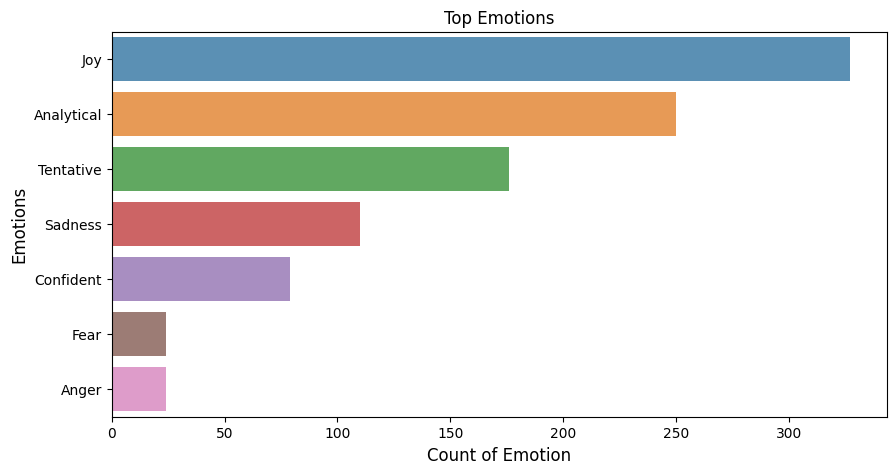

In [ ]:
#This is a simple plot that shows the top 30 words being used

df_emotion = pd.DataFrame(list_Emotion)[0].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(df_emotion.values, df_emotion.index, alpha=0.8)
plt.title('Top Emotions')
plt.ylabel('Emotions', fontsize=12)
plt.xlabel('Count of Emotion', fontsize=12)
plt.show()

In [ ]:
df_cleansed.sum()

15112

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


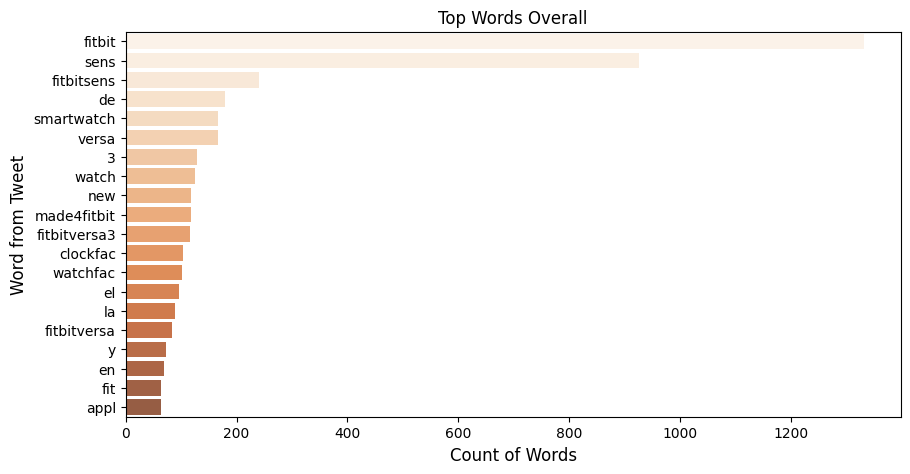

In [ ]:
#This is a simple plot that shows the top 30 words being used
#df.plot(30)

df_plot = df_cleansed[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df_plot.values, df_plot.index, alpha=0.8, palette=("Oranges"))
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()


In [ ]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [ ]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


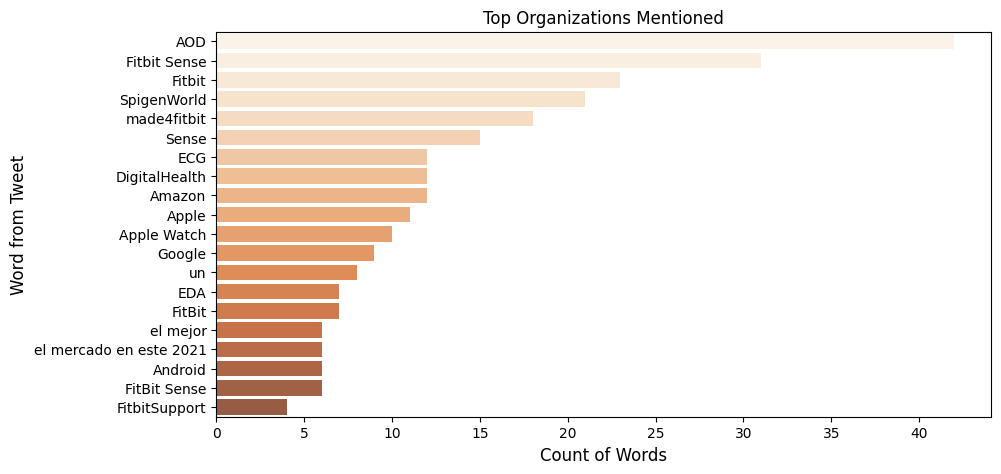

In [ ]:
df_plot = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df_plot.values, df_plot.index, alpha=0.8, palette=("Oranges"))
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [ ]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


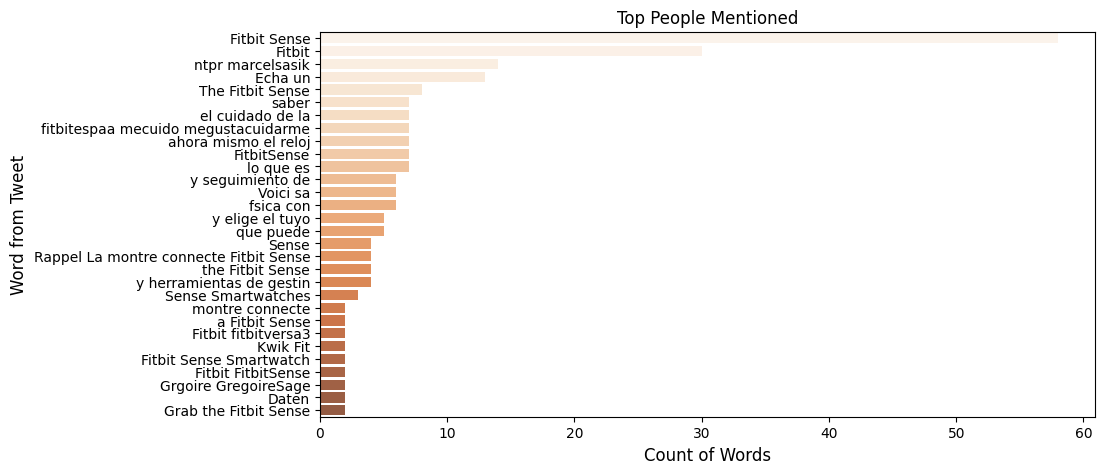

In [ ]:
df = df11[:30,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8,palette=("Oranges"))
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()